# Car Price Prediction  

**This project is a Car Price Prediction project intendted to give you the convenience for car price given the defined conditions**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report

In [5]:
DIR = './app3/dataset/'

Load the dataset

In [6]:
df = pd.read_csv(DIR + 'Cars - Cars.csv')

Let's take a look the data information

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


Let's check its header

In [8]:
df.head()

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm    5.0  
2     12.7@ 2,700(kgm@ rpm)    5.0  
3  22.4 kgm at 1750-2750rpm    5.0  
4     11.5@ 4,500(kgm@ rpm)    5.0

Since the torque column is quite complicated to understand, we will drop it

In [9]:
df = df.drop(columns="torque")
df

name  year  selling_price  km_driven    fuel  \
0           Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1     Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2         Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3        Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4           Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
...                            ...   ...            ...        ...     ...   
8123             Hyundai i20 Magna  2013         320000     110000  Petrol   
8124         Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
8125        Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
8126               Tata Indigo CR4  2013         290000      25000  Diesel   
8127               Tata Indigo CR4  2013         290000      25000  Diesel   

     seller_type transmission                 owner     mileage   engine  \
0     Individual       Manual           First Owner   23.4 kmpl  1248 CC   
1     Individual       Manual          Second Owner  21.14 kmpl  1498 CC   
2     Individual       Manual           Third Owner   17.7 kmpl  1497 CC   
3     Individual       Manual           First Owner   23.0 kmpl  1396 CC   
4     Individual       Manual           First Owner   16.1 kmpl  1298 CC   
...          ...          ...                   ...         ...      ...   
8123  Individual       Manual           First Owner   18.5 kmpl  1197 CC   
8124  Individual       Manual  Fourth & Above Owner   16.8 kmpl  1493 CC   
8125  Individual       Manual           First Owner   19.3 kmpl  1248 CC   
8126  Individual       Manual           First Owner  23.57 kmpl  1396 CC   
8127  Individual       Manual           First Owner  23.57 kmpl  1396 CC   

       max_power  seats  
0         74 bhp    5.0  
1     103.52 bhp    5.0  
2         78 bhp    5.0  
3         90 bhp    5.0  
4       88.2 bhp    5.0  
...          ...    ...  
8123   82.85 bhp    5.0  
8124     110 bhp    5.0  
8125    73.9 bhp    5.0  
8126      70 bhp    5.0  
8127      70 bhp    5.0  

[8128 rows x 12 columns]

As of now, we will remove the strings from the mileage, engine, and max_power so that we can analyze the three columns further by using regular expression

In [10]:
df["mileage"] = df["mileage"].str.extract(r'(\d+(\.\d+)?)')[0]
df["engine"] = df["engine"].str.extract(r'(\d+(\.\d+)?)')[0]
df["max_power"] = df["max_power"].str.extract(r'(\d+(\.\d+)?)')[0]

df["engine"] = df["engine"].astype(float)
df["max_power"] = df["max_power"].astype(float)
df["mileage"] = df["mileage"].astype(float)

Lets's check the data information and its header again

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   float64
 9   engine         7907 non-null   float64
 10  max_power      7912 non-null   float64
 11  seats          7907 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 762.1+ KB


In [12]:
df.head()

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner  mileage  engine  max_power  seats  
0  Individual       Manual   First Owner    23.40  1248.0      74.00    5.0  
1  Individual       Manual  Second Owner    21.14  1498.0     103.52    5.0  
2  Individual       Manual   Third Owner    17.70  1497.0      78.00    5.0  
3  Individual       Manual   First Owner    23.00  1396.0      90.00    5.0  
4  Individual       Manual   First Owner    16.10  1298.0      88.20    5.0

As you can see, the strings attached in the three columns have gone

Next, we will exclude the strings representing the details for each of the car's brand, since it' redundant

In [13]:
df['name'] = df['name'].str.split().str.get(0)

Then, check its head

In [14]:
df.head()

name  year  selling_price  km_driven    fuel seller_type transmission  \
0   Maruti  2014         450000     145500  Diesel  Individual       Manual   
1    Skoda  2014         370000     120000  Diesel  Individual       Manual   
2    Honda  2006         158000     140000  Petrol  Individual       Manual   
3  Hyundai  2010         225000     127000  Diesel  Individual       Manual   
4   Maruti  2007         130000     120000  Petrol  Individual       Manual   

          owner  mileage  engine  max_power  seats  
0   First Owner    23.40  1248.0      74.00    5.0  
1  Second Owner    21.14  1498.0     103.52    5.0  
2   Third Owner    17.70  1497.0      78.00    5.0  
3   First Owner    23.00  1396.0      90.00    5.0  
4   First Owner    16.10  1298.0      88.20    5.0

# ****Exploratory Data Analysis****

Exploratory Data Analysis is an approach to analyzing datasets to summarize their main characteristics, often with visual methods. It is crucial in the data preparation phase before applying more formal modeling or hypothesis testing. It helps researchers and data analysts understand the data at hand, its underlying structure, and the relationships between variables.

**Univariate Analysis**

Univariate analysis is a form of data analysis where we examine a single variable or feature without reference to any other. Its primary goal is to describe patterns and characteristics 

In this analysis, we will begin with the analysis of categorical variables by using countplot 

1. Countplot

First of all, let's explore the categories of each feature

In [12]:
categorical_features = ['name', 'fuel', 'seller_type','transmission','owner']

for feature in categorical_features:
    print(f" The {feature} feature contains {df[feature].unique()} unique features \n\n\n")

 The name feature contains ['Maruti' 'Skoda' 'Honda' 'Hyundai' 'Toyota' 'Ford' 'Renault' 'Mahindra'
 'Tata' 'Chevrolet' 'Fiat' 'Datsun' 'Jeep' 'Mercedes-Benz' 'Mitsubishi'
 'Audi' 'Volkswagen' 'BMW' 'Nissan' 'Lexus' 'Jaguar' 'Land' 'MG' 'Volvo'
 'Daewoo' 'Kia' 'Force' 'Ambassador' 'Ashok' 'Isuzu' 'Opel' 'Peugeot'] unique features 



 The fuel feature contains ['Diesel' 'Petrol' 'LPG' 'CNG'] unique features 



 The seller_type feature contains ['Individual' 'Dealer' 'Trustmark Dealer'] unique features 



 The transmission feature contains ['Manual' 'Automatic'] unique features 



 The owner feature contains ['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car'] unique features 





Next, Plotting the distribution of each one

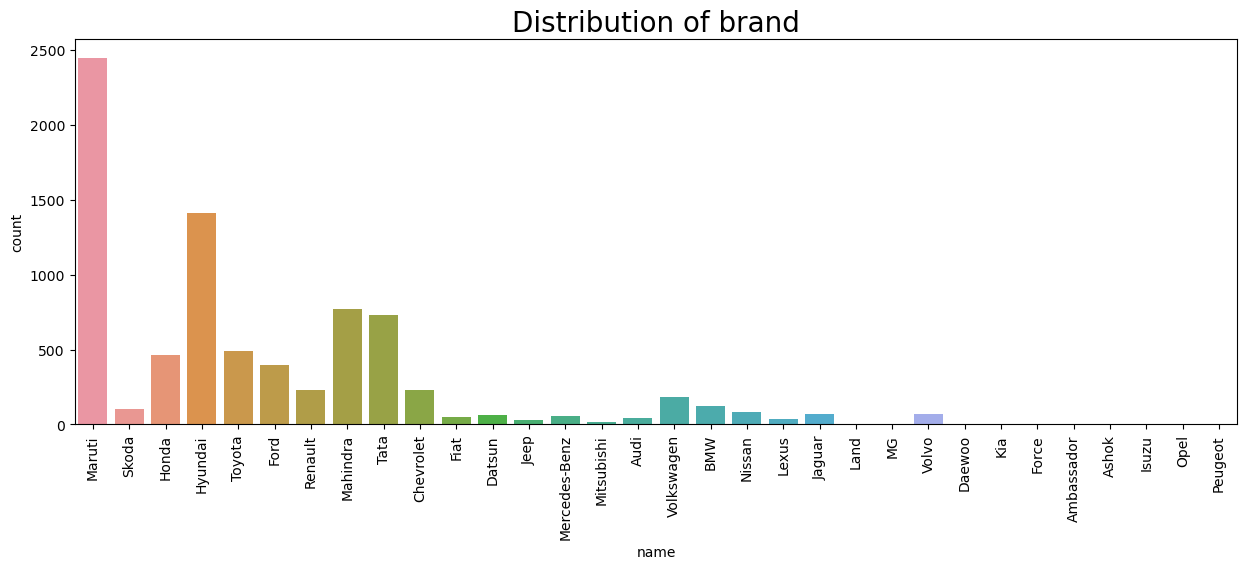

In [13]:
# The distribution of brand

plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='name')
plt.title(f'Distribution of brand', fontsize=20)
plt.xticks(rotation=90) 
plt.show()

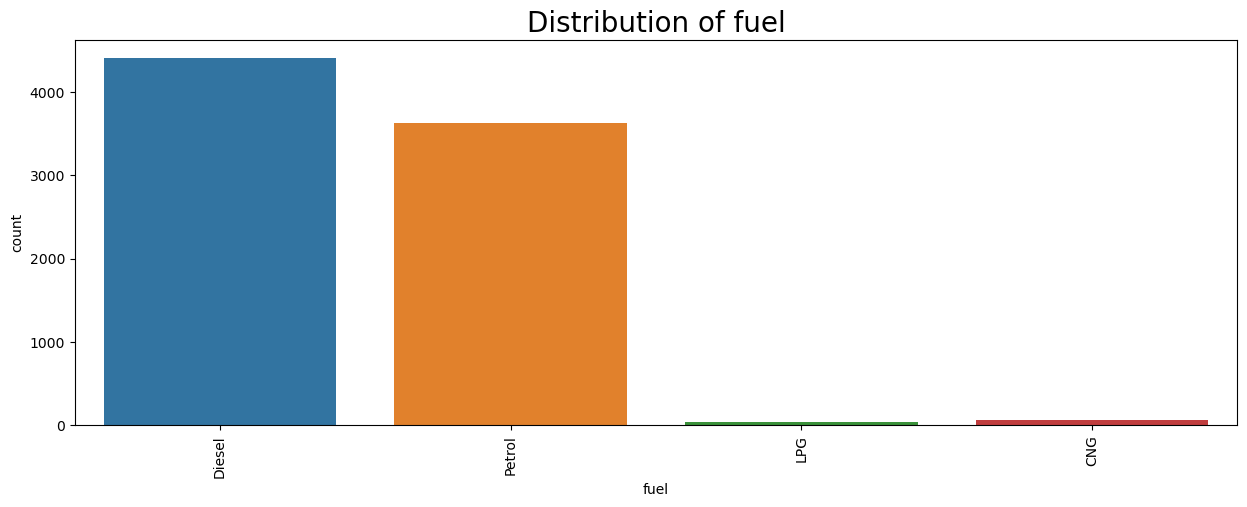

In [14]:
# The distribution of fuel

plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='fuel')
plt.title(f'Distribution of fuel', fontsize=20)
plt.xticks(rotation=90)  
plt.show()

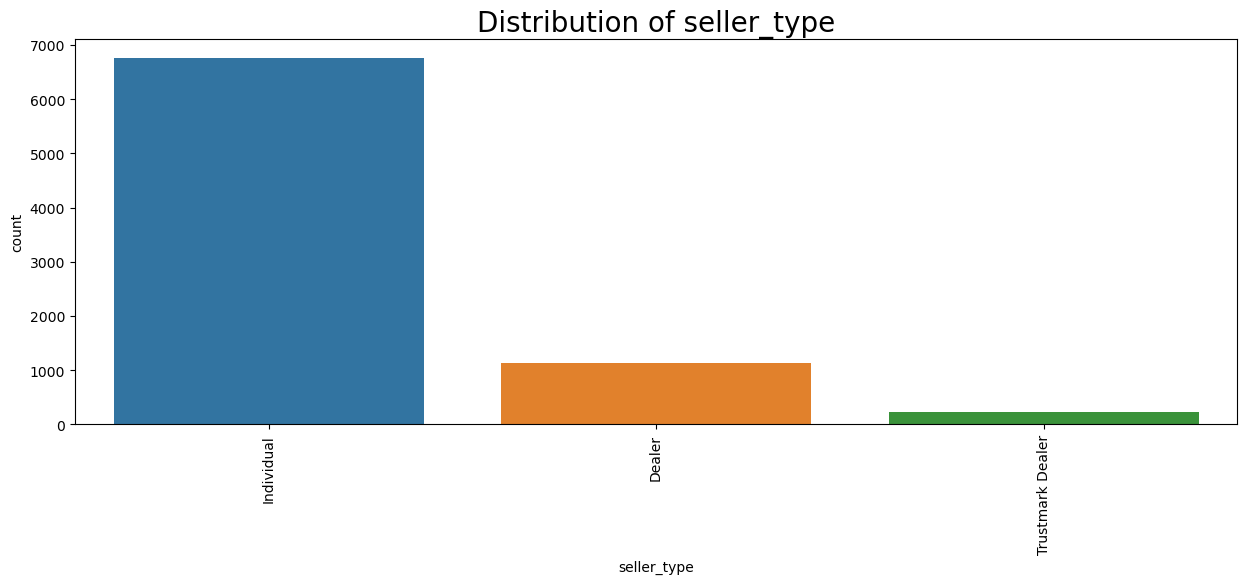

In [15]:
# The distribution of seller_type

plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='seller_type')
plt.title(f'Distribution of seller_type', fontsize=20)
plt.xticks(rotation=90)  
plt.show()

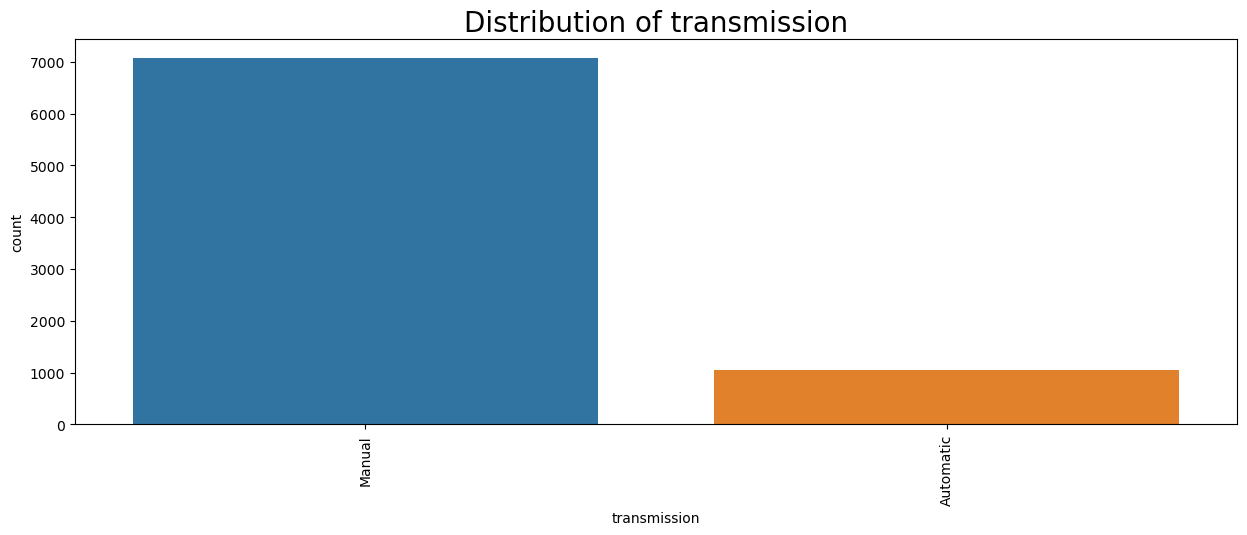

In [16]:
# The distribution of transmission

plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='transmission')
plt.title(f'Distribution of transmission', fontsize=20)
plt.xticks(rotation=90)  
plt.show()

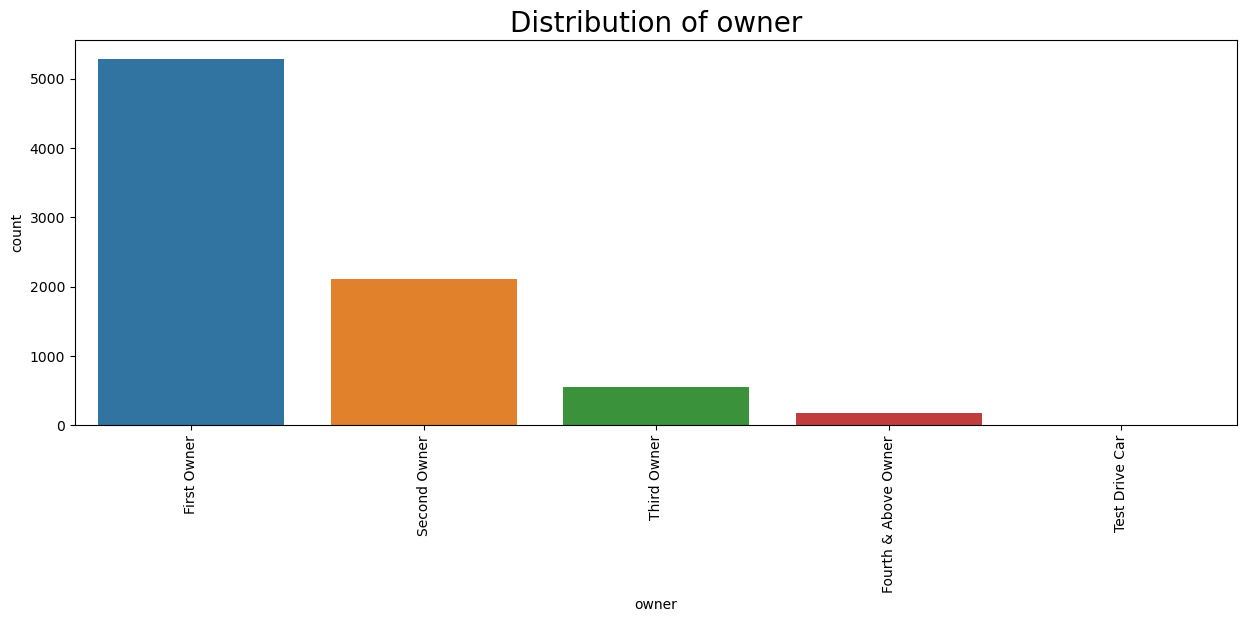

In [17]:
# The distribution of owner

plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='owner')
plt.title(f'Distribution of owner', fontsize=20)
plt.xticks(rotation=90)  
plt.show()

Next, we are going to plot the continuous variables

2. Distributionplot

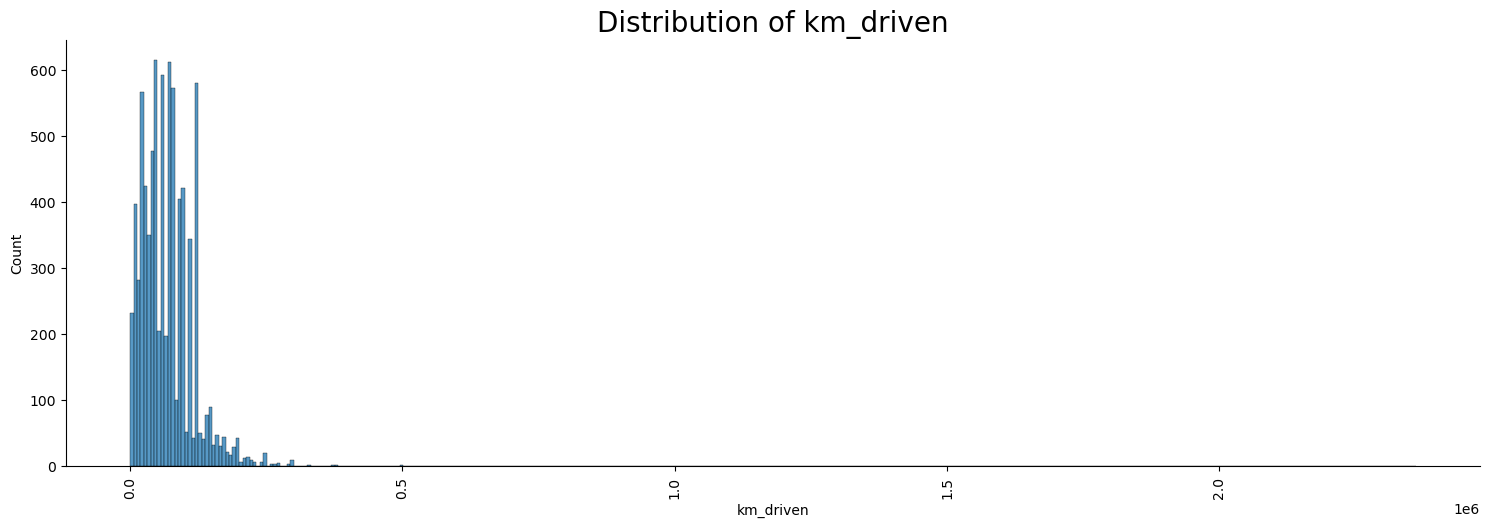

In [18]:
# The distribution of km_driven

sns.displot(data=df, x='km_driven', height=5, aspect=3)  # 15/5 = 3
plt.title(f'Distribution of km_driven', fontsize=20)
plt.xticks(rotation=90)
plt.show()

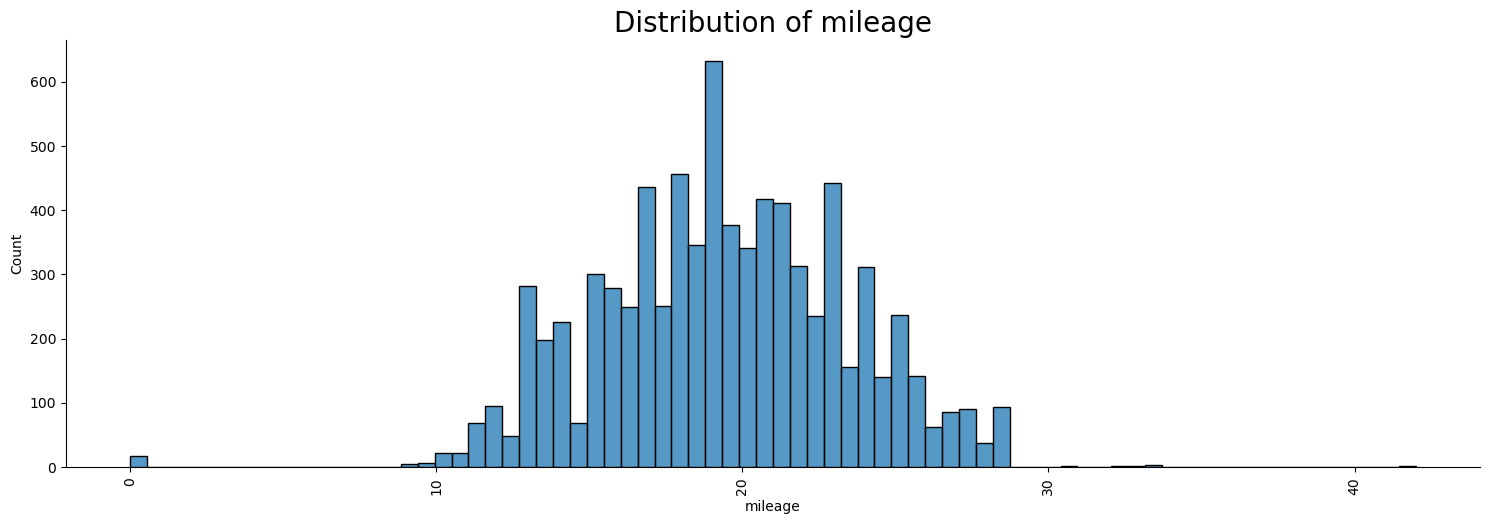

In [19]:
# The distribution of mileage

sns.displot(data=df, x='mileage', height=5, aspect=3)  # 15/5 = 3
plt.title(f'Distribution of mileage', fontsize=20)
plt.xticks(rotation=90)
plt.show()

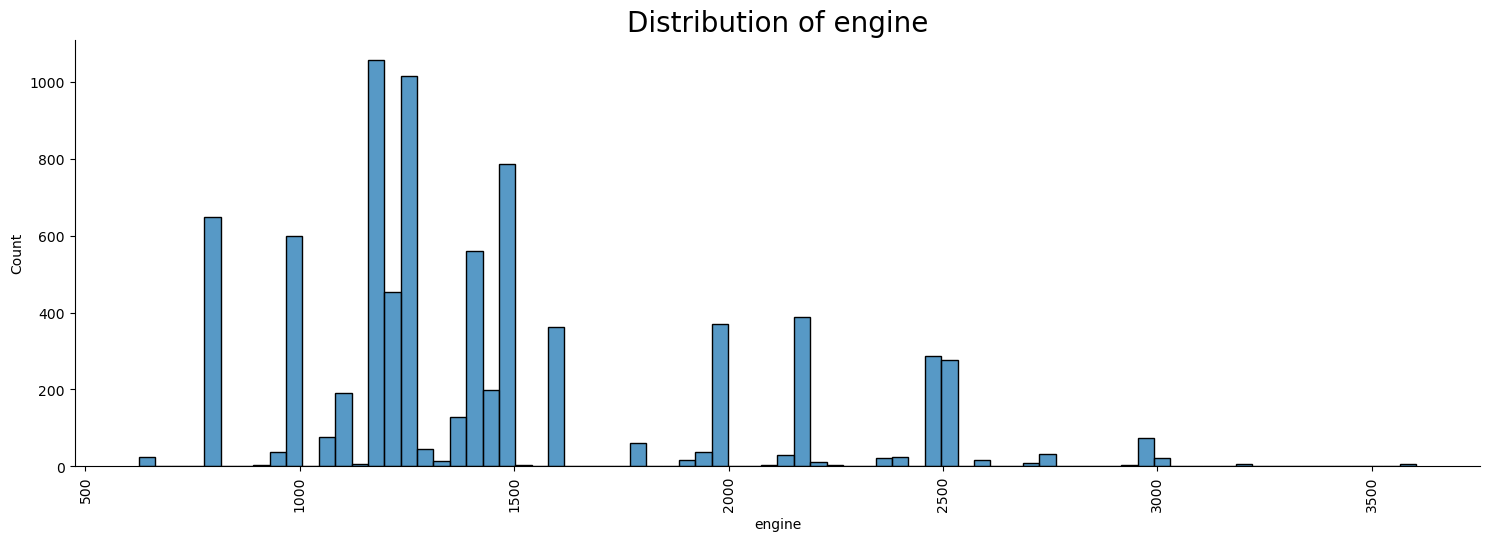

In [20]:
# The distribution of engine

sns.displot(data=df, x='engine', height=5, aspect=3)  # 15/5 = 3
plt.title(f'Distribution of engine', fontsize=20)
plt.xticks(rotation=90)
plt.show()

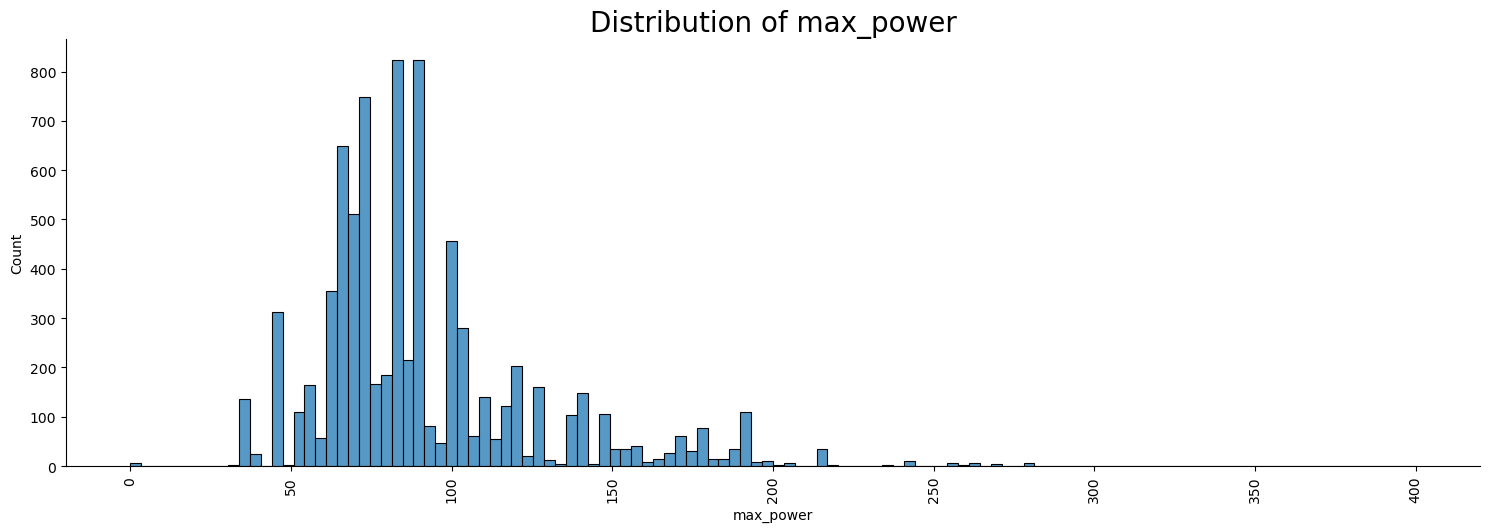

In [21]:
# The distribution of max_power

sns.displot(data=df, x='max_power', height=5, aspect=3)  # 15/5 = 3
plt.title(f'Distribution of max_power', fontsize=20)
plt.xticks(rotation=90)
plt.show()

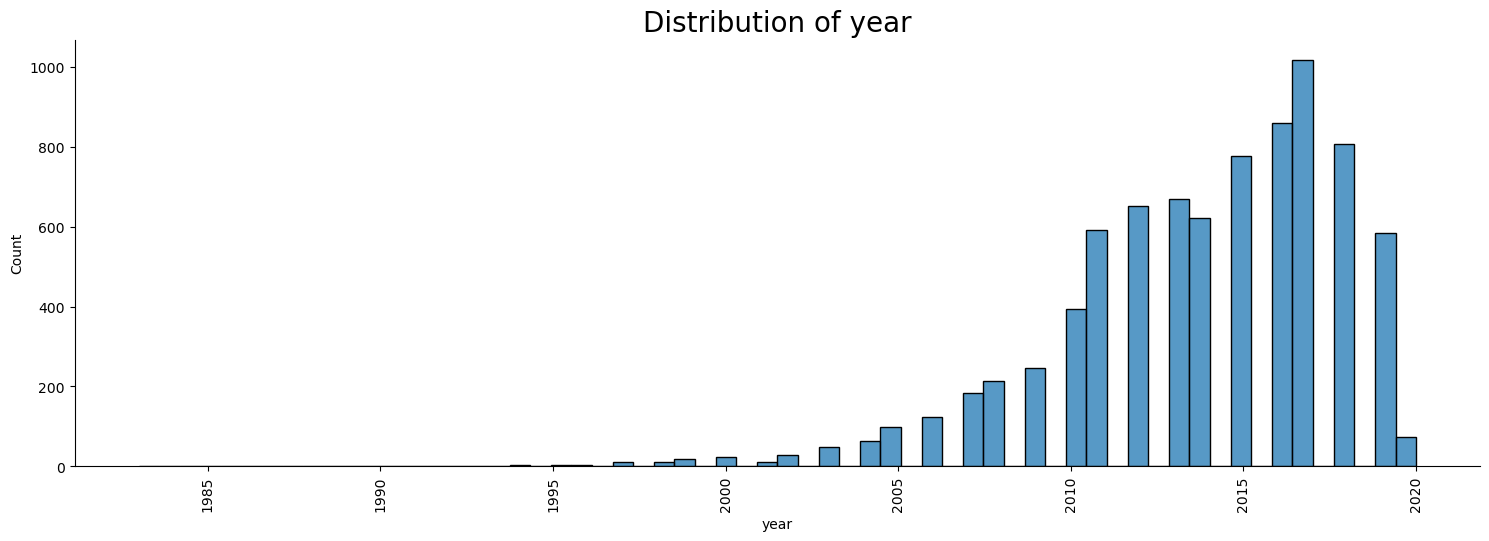

In [22]:
# The distribution of year

sns.displot(data=df, x='year', height=5, aspect=3)  # 15/5 = 3
plt.title(f'Distribution of year', fontsize=20)
plt.xticks(rotation=90)
plt.show()

**Multivariate Analysis**

Multivariate analysis refers to any statistical technique used to analyze data that arises from more than one variable. This can encompass a broad range of techniques, as the analysis is applied to datasets where multiple measurements are made on each observation.

In this analysis,we will explore the relationships between selling_price and the features in order to see if there are correlations or patterns among them 

1. Boxplot

Boxplot is a standardized way of displaying the distribution of data based on a five-number summary: the minimum, first quartile (Q1), median, third quartile (Q3), and the maximum. It's a way to visualize the central tendency, variability, and skewness of a data distribution.

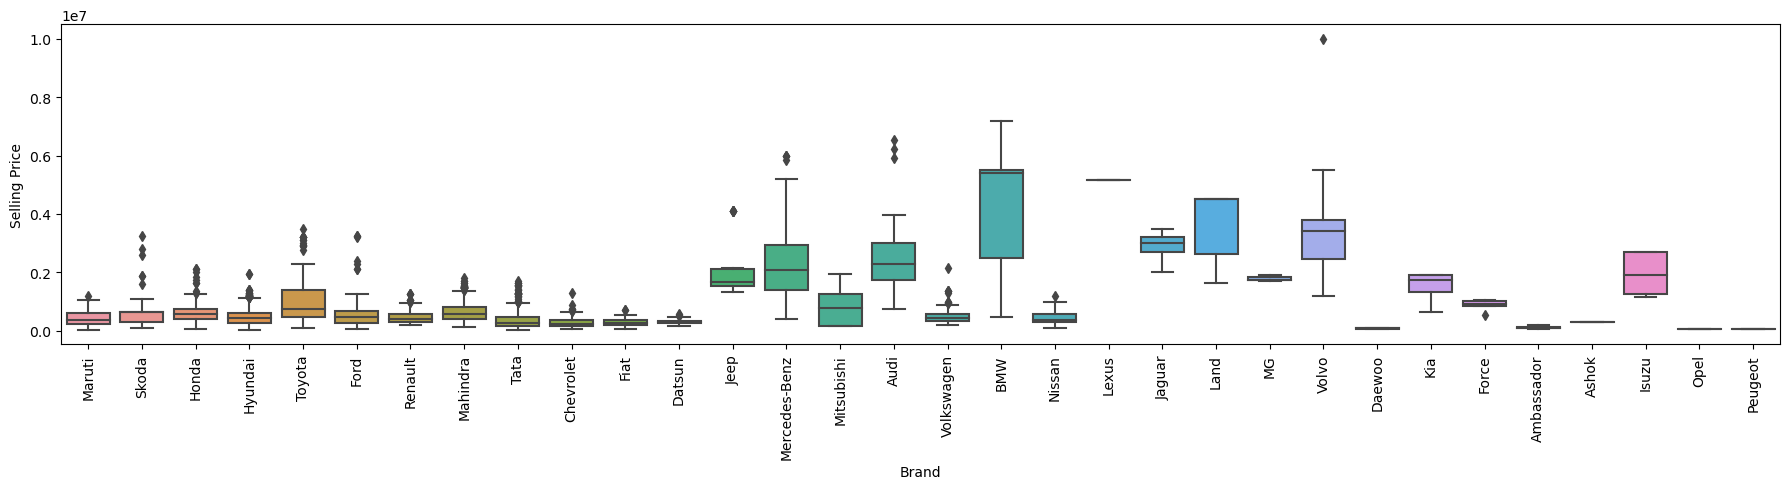

In [23]:
# Let's try bar plot on "brand"

# Set the figure size
plt.figure(figsize=(18, 5))  # Width=12in, Height=8in

sns.boxplot(x=df["name"], y=df["selling_price"])

plt.ylabel("Selling Price")
plt.xlabel("Brand")
plt.xticks(rotation=90)  # Optional: Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout for better visualization
plt.show()

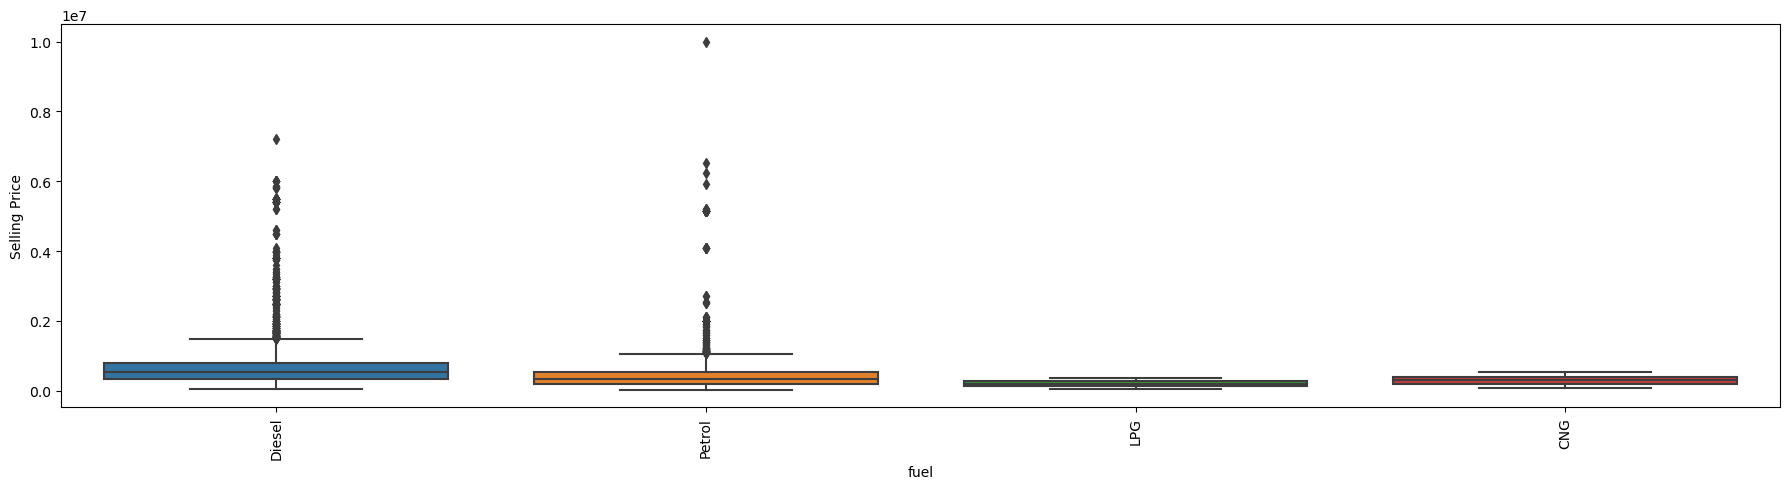

In [24]:
# Let's try bar plot on "fuel"

# Set the figure size
plt.figure(figsize=(18, 5))  # Width=12in, Height=8in

sns.boxplot(x=df["fuel"], y=df["selling_price"])

plt.ylabel("Selling Price")
plt.xlabel("fuel")
plt.xticks(rotation=90)  # Optional: Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout for better visualization
plt.show()

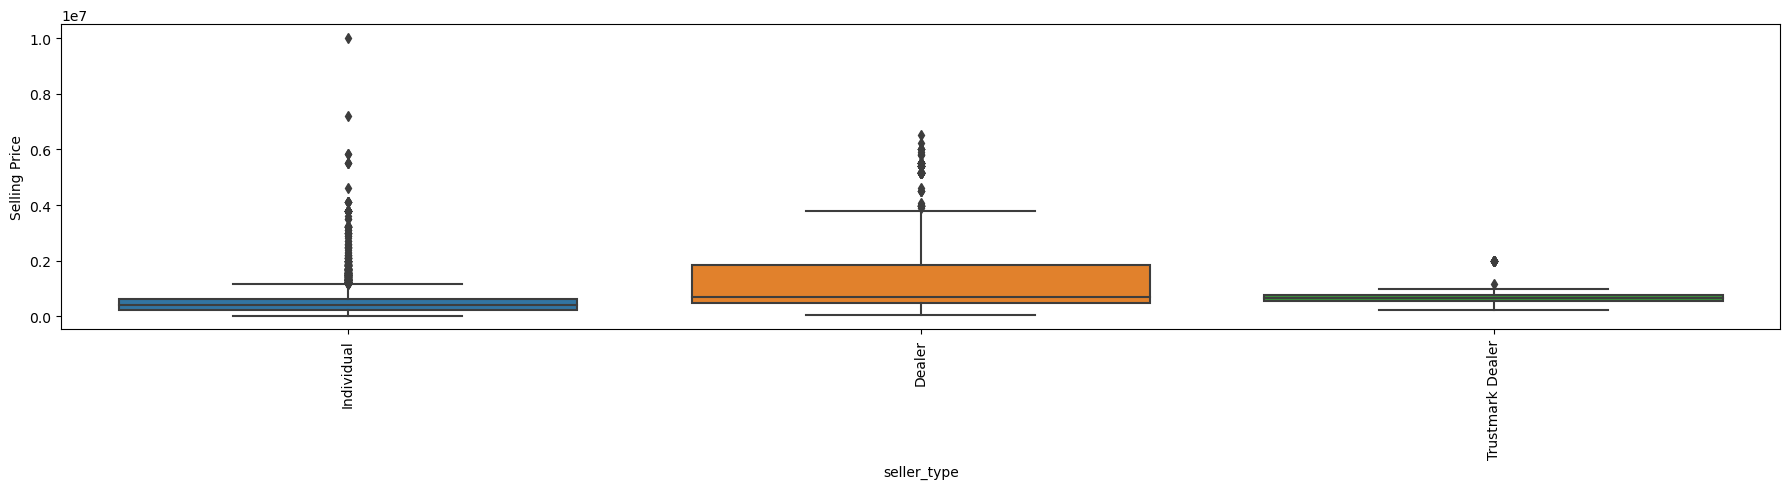

In [25]:
# Let's try bar plot on "seller_type"

# Set the figure size
plt.figure(figsize=(18, 5))  # Width=12in, Height=8in

sns.boxplot(x=df["seller_type"], y=df["selling_price"])

plt.ylabel("Selling Price")
plt.xlabel("seller_type")
plt.xticks(rotation=90)  # Optional: Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout for better visualization
plt.show()

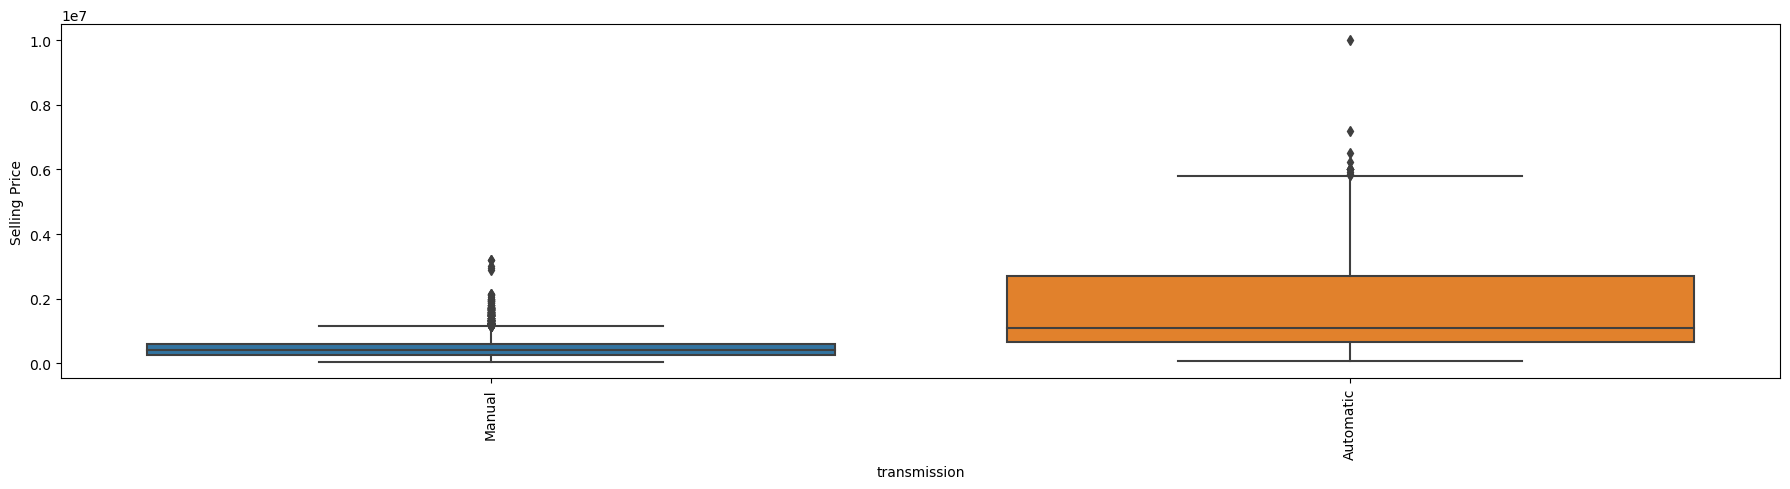

In [26]:
# Let's try bar plot on "transmisson"

# Set the figure size
plt.figure(figsize=(18, 5))  # Width=12in, Height=8in

sns.boxplot(x=df["transmission"], y=df["selling_price"])

plt.ylabel("Selling Price")
plt.xlabel("transmission")
plt.xticks(rotation=90)  # Optional: Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout for better visualization
plt.show()

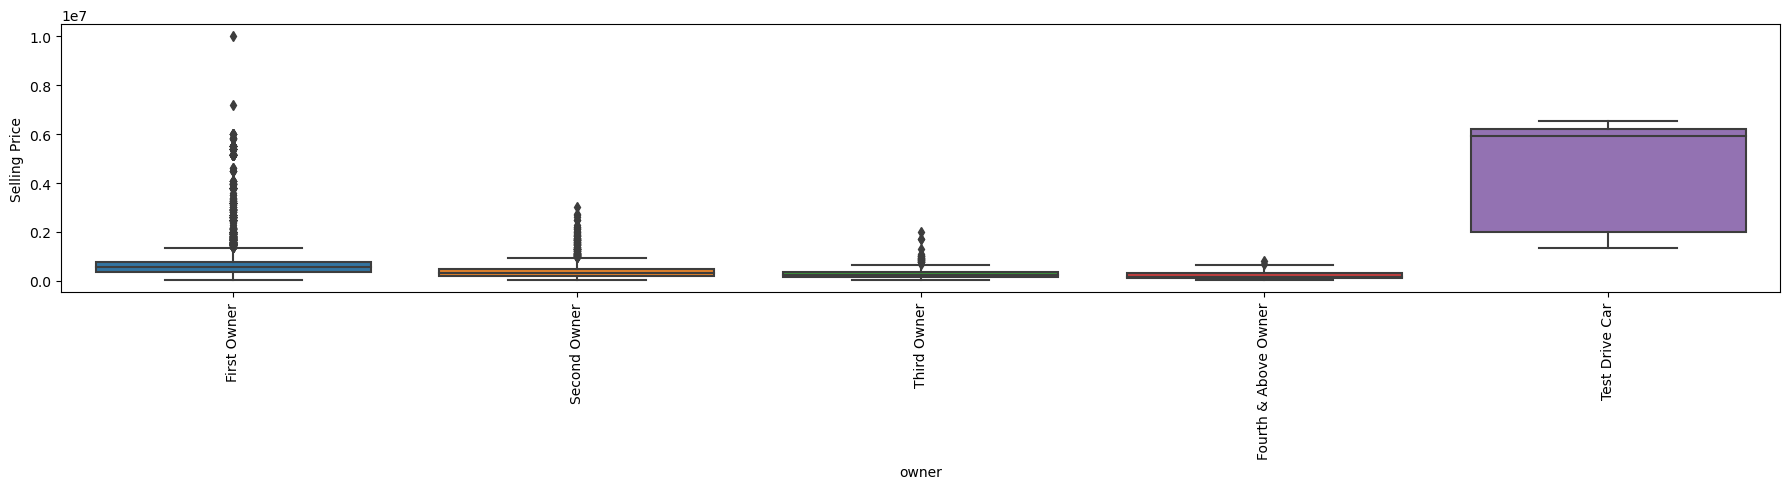

In [27]:
# Let's try bar plot on "owner"

# Set the figure size
plt.figure(figsize=(18, 5))  # Width=12in, Height=8in

sns.boxplot(x=df["owner"], y=df["selling_price"])

plt.ylabel("Selling Price")
plt.xlabel("owner")
plt.xticks(rotation=90)  # Optional: Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout for better visualization
plt.show()

2. Scatter Plot

A scatter plot (or scatterplot) is a graphical representation that uses dots to display values for two variables for a set of data. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe and display relationships between two numeric variables.

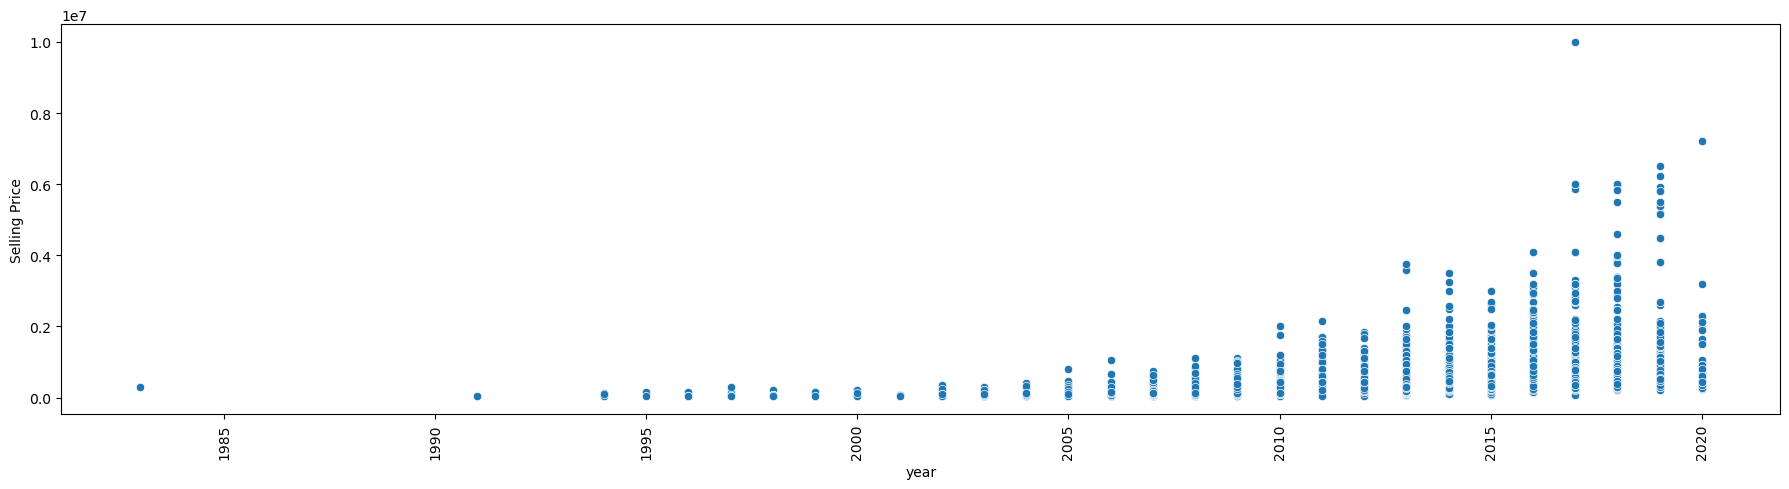

In [28]:
# Let's try bar plot on "year"

# Set the figure size
plt.figure(figsize=(18, 5))  # Width=12in, Height=8in

sns.scatterplot(x=df["year"], y=df["selling_price"])

plt.ylabel("Selling Price")
plt.xlabel("year")
plt.xticks(rotation=90)  # Optional: Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout for better visualization
plt.show()

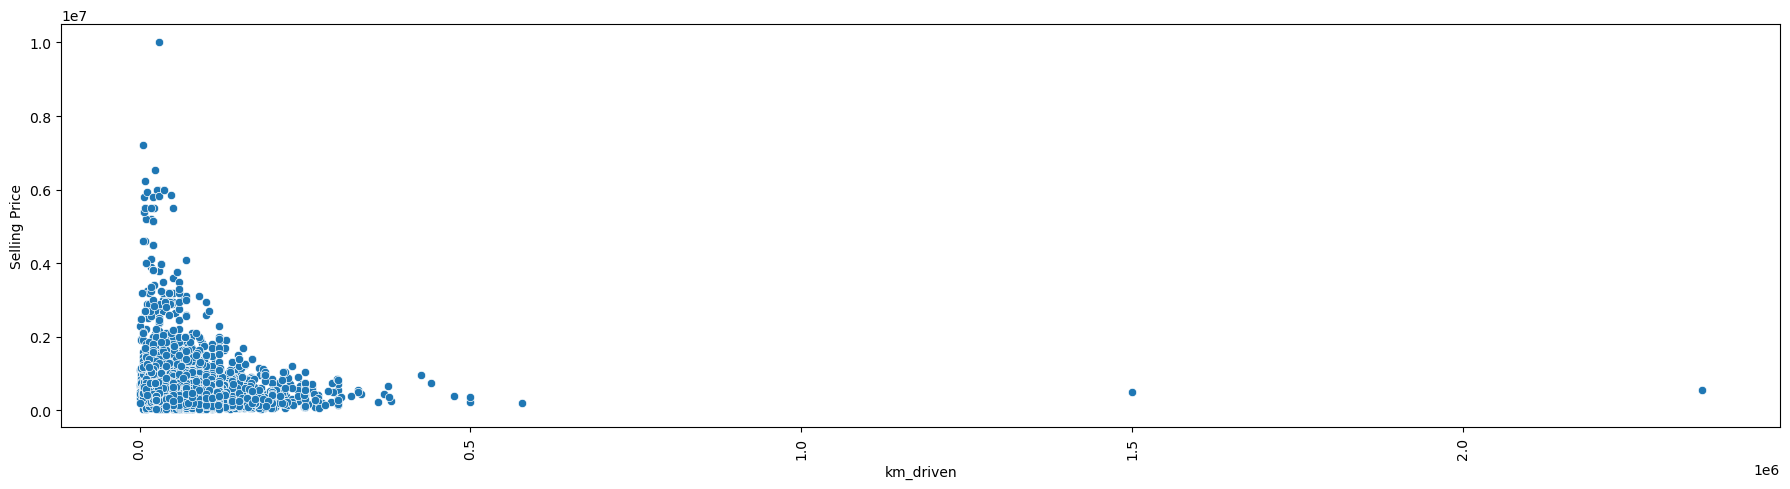

In [29]:
# Let's try bar plot on "km_driven"

# Set the figure size
plt.figure(figsize=(18, 5))  # Width=12in, Height=8in

sns.scatterplot(x=df["km_driven"], y=df["selling_price"])

plt.ylabel("Selling Price")
plt.xlabel("km_driven")
plt.xticks(rotation=90)  # Optional: Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout for better visualization
plt.show()

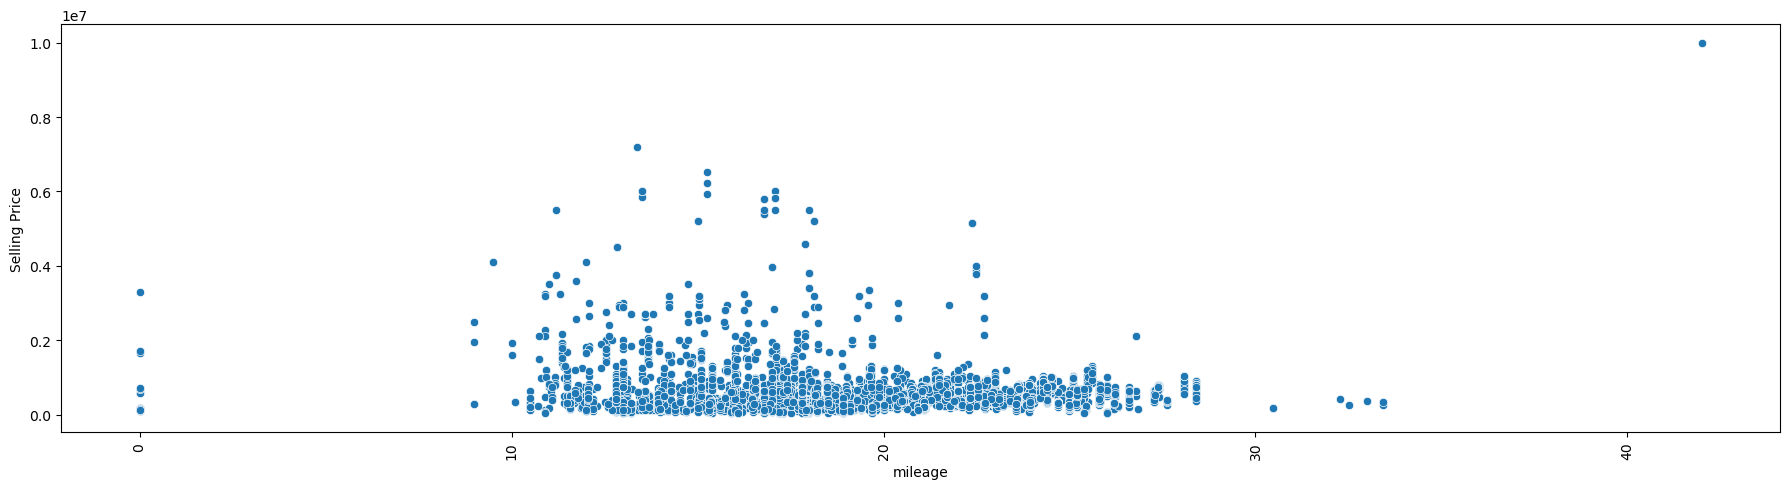

In [30]:
# Let's try bar plot on "mileage"

# Set the figure size
plt.figure(figsize=(18, 5))  # Width=12in, Height=8in

sns.scatterplot(x=df["mileage"], y=df["selling_price"])

plt.ylabel("Selling Price")
plt.xlabel("mileage")
plt.xticks(rotation=90)  # Optional: Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout for better visualization
plt.show()

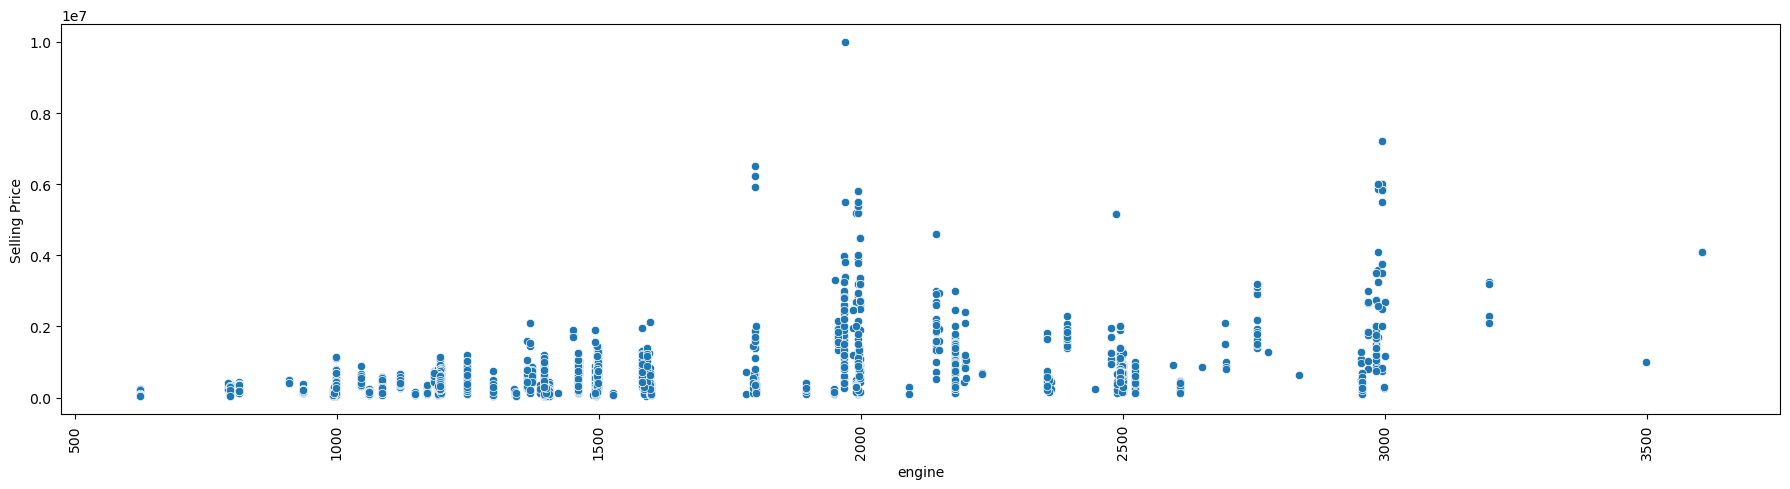

In [31]:
# Let's try bar plot on "mileage"

# Set the figure size
plt.figure(figsize=(18, 5))  # Width=12in, Height=8in

sns.scatterplot(x=df["engine"], y=df["selling_price"])

plt.ylabel("Selling Price")
plt.xlabel("engine")
plt.xticks(rotation=90)  # Optional: Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout for better visualization
plt.show()

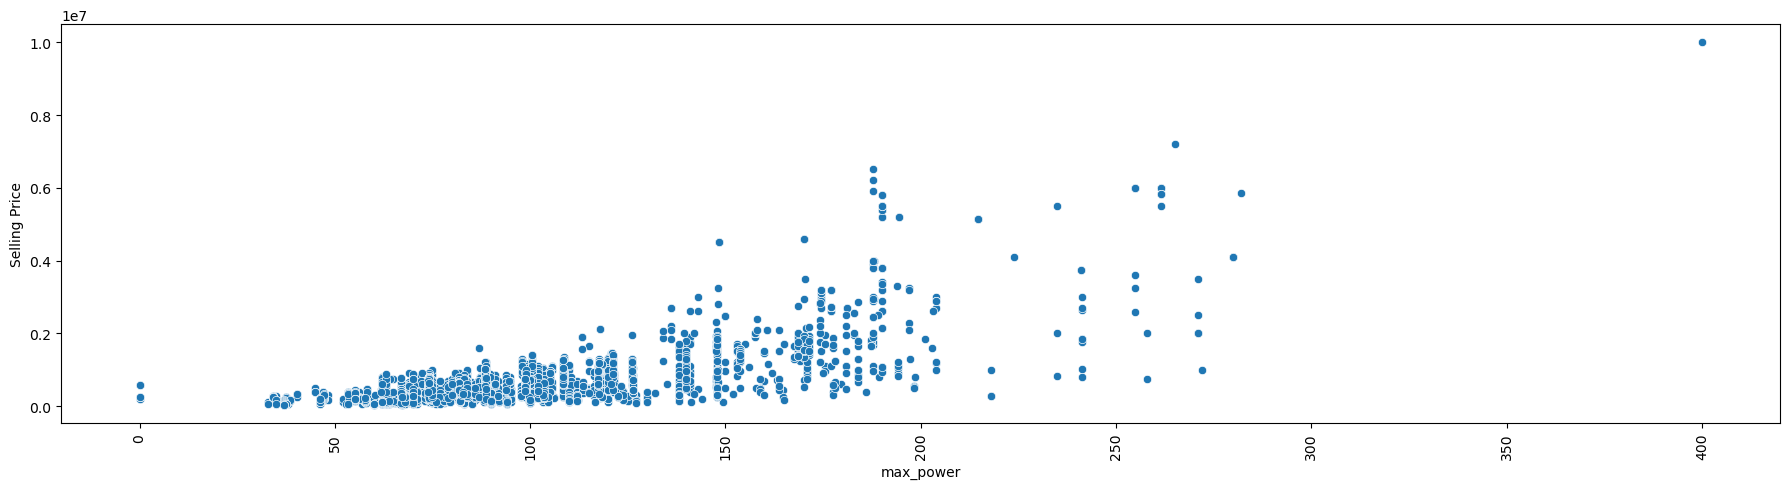

In [32]:
# Let's try bar plot on "max_power"

# Set the figure size
plt.figure(figsize=(18, 5))  # Width=12in, Height=8in

sns.scatterplot(x=df["max_power"], y=df["selling_price"])

plt.ylabel("Selling Price")
plt.xlabel("max_power")
plt.xticks(rotation=90)  # Optional: Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout for better visualization
plt.show()

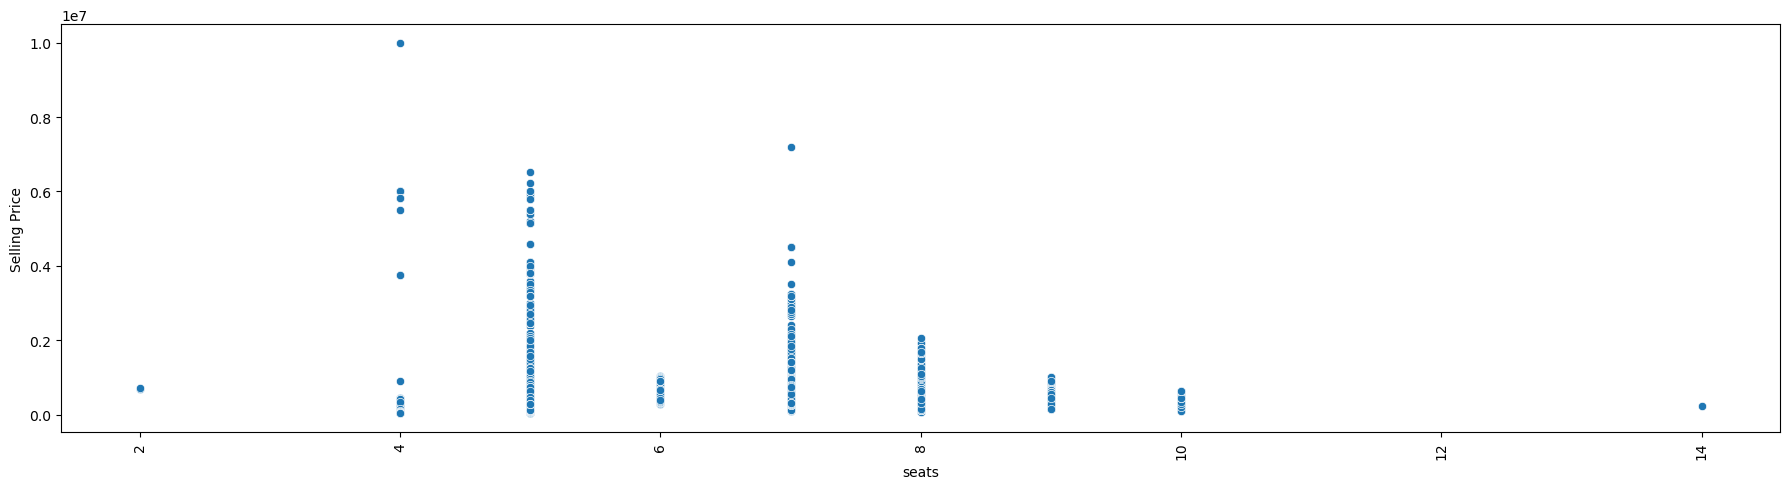

In [33]:
# Let's try bar plot on "max_power"

# Set the figure size
plt.figure(figsize=(18, 5))  # Width=12in, Height=8in

sns.scatterplot(x=df["seats"], y=df["selling_price"])

plt.ylabel("Selling Price")
plt.xlabel("seats")
plt.xticks(rotation=90)  # Optional: Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout for better visualization
plt.show()

**Other interesting analysis**

1. The relationships between fueltype and mileage

In this analysis, we will be plotting to explore the relationships between fuel type and mileage, since it's essential to see how much mileage each fuel type consume

         count       mean       std   min    25%   50%    75%    max
fuel                                                                
CNG       53.0  24.165660  5.422322  10.9  21.94  26.2  26.60  33.44
Diesel  4299.0  19.642624  4.624294   0.0  15.96  20.0  23.20  28.40
LPG       35.0  18.577143  5.153202  10.9  13.45  17.3  23.65  26.20
Petrol  3520.0  19.082301  3.047539   0.0  17.30  18.9  20.92  42.00


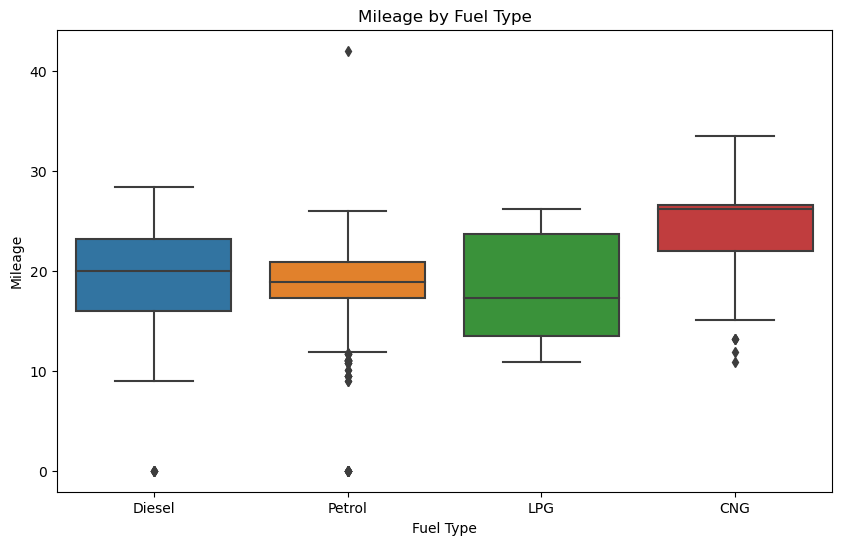

In [34]:
# Plotting to explore the relationship between fuel type and mileage

# Grouping data by fuel type and calculating mean mileage
grouped_data = df.groupby('fuel')['mileage'].describe()
print(grouped_data)

# Boxplot for mileage based on fuel type
plt.figure(figsize=(10, 6))
sns.boxplot(x='fuel', y='mileage', data=df)
plt.title('Mileage by Fuel Type')
plt.ylabel('Mileage')
plt.xlabel('Fuel Type')
plt.show()

According to the data, there are 6 points where we can make an insight analysis

1. Fuel Types and Data Size
   . There are 4 fuel types: CNG, Diesel, LPG, and Petrol.
   . The data size (count) for Diesel and Petrol is considerably larger than for CNG and LPG. Hence, statistics for Diesel      and Petrol might be more reliable due to the larger sample size.
   
2. Central Tendency (Mean and Median)
   . CNG vehicles seem to have the highest average and median fuel efficiency, while LPG vehicles have the lowest.
   
3. Variability (Standard Deviation)
   . Petrol vehicles' fuel efficiency is more consistent compared to other fuel types, whereas CNG and LPG vehicles show        higher variability.
   
4. Spread (IQR)
   . LPG vehicles show the highest spread in fuel efficiency for the middle 50% of data, while Petrol vehicles have the          least.
   
5. Outliers and Range
   . The minimum efficiency for both Diesel and Petrol is 0.0, which could be an error or represent non-running vehicles.
   . The maximum efficiency for Petrol vehicles is notably high at 42.0, much higher than its 75th percentile value,            suggesting potential outliers or high-performance vehicles.
   
6. Insight and Further Investigation
   . CNG vehicles, on average, might be more fuel-efficient, but they also have a wider variability.
   . Diesel and Petrol are the most common fuels, with Diesel vehicles showing slightly better average efficiency than          Petrol.
   . The minimum values, especially for Diesel and Petrol, warrant further investigation.
   . The notably high maximum for Petrol could be investigated to determine if it's an outlier or if there are specific          models with high fuel efficiency.

2. The influences of fuel type on the saleprice

         count           mean            std      min       25%       50%  \
fuel                                                                        
CNG       57.0  301017.491228  111582.298949  80000.0  200000.0  320000.0   
Diesel  4402.0  791452.921627  908894.768774  40000.0  350000.0  550000.0   
LPG       38.0  200421.052632   84921.468199  54000.0  148250.0  195500.0   
Petrol  3631.0  462441.061691  624788.835690  29999.0  200000.0  345000.0   

             75%         max  
fuel                          
CNG     390000.0    545000.0  
Diesel  800000.0   7200000.0  
LPG     275000.0    375000.0  
Petrol  550000.0  10000000.0  


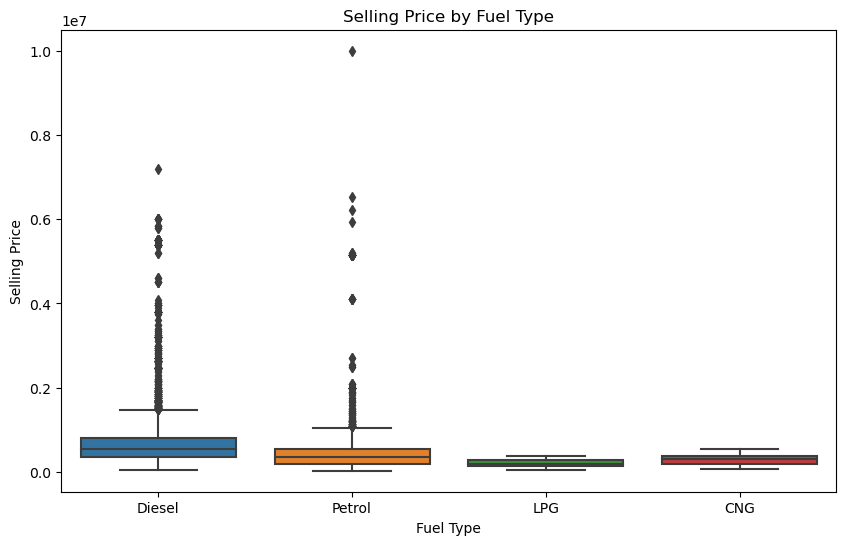

In [35]:
# This is to explore how fuel type influences the resale price

# Grouping data by fuel type and calculating mean selling price
grouped_fuel_data = df.groupby('fuel')['selling_price'].describe()
print(grouped_fuel_data)


# Boxplot for selling price based on fuel type
plt.figure(figsize=(10, 6))
sns.boxplot(x='fuel', y='selling_price', data=df)
plt.title('Selling Price by Fuel Type')
plt.ylabel('Selling Price')
plt.xlabel('Fuel Type')
plt.show()

According to the data, we can summarize as below:

1. Further Analysis:

   . Why are Diesel vehicles, on average and median, more expensive than the others ?
   
   . Are the-end Diesel and Petro vehicles luxury brands or special models, since the selling price are relatively higher        than the other two
   
   . How does the age ot model year of the vehicle influence its price
   
2. Recommendations:

   . If someone is looking for budget-friendly options, LPG vehicles might be a good choice
   
   . For a typical range of prices without extreme highs or lows, CNG could be a viable options

3. The relationships between the brand km_driven

                count           mean           std       min       25%  \
name                                                                     
Ambassador        4.0   82500.000000  17078.251277   60000.0   75000.0   
Ashok             1.0  200000.000000           NaN  200000.0  200000.0   
Audi             40.0   53896.550000  42624.488641    7800.0   29000.0   
BMW             120.0   30269.458333  35151.876004    5000.0    7500.0   
Chevrolet       230.0   79785.373913  40433.918046   13500.0   55250.0   
Daewoo            3.0   81317.000000  48662.269439   46951.0   53475.5   
Datsun           65.0   36342.861538  26311.951296    1300.0   19000.0   
Fiat             47.0   84630.893617  43355.022098   20000.0   55000.0   
Force             6.0   55546.500000  61182.713028   13000.0   14750.0   
Ford            397.0   72902.780856  44707.465871    2600.0   39000.0   
Honda           467.0   60008.402570  39973.032542    1000.0   30000.0   
Hyundai        1415.0   64823.558304  

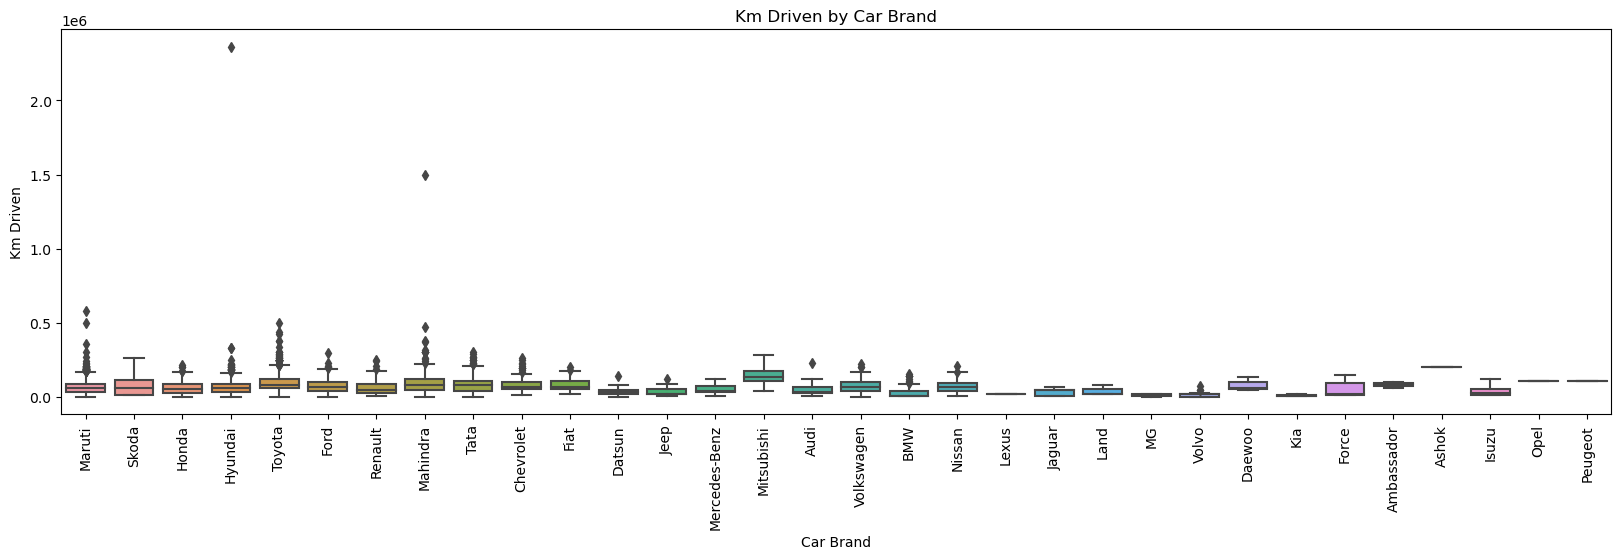

In [36]:
# This is to delve into the relationship between the brand or car type and how much it's typically driven

# Grouping data by car brand and calculating mean km driven
grouped_brand_data = df.groupby('name')['km_driven'].describe()
print(grouped_brand_data)

import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for km driven based on car brand
plt.figure(figsize=(20, 5))
sns.boxplot(x='name', y='km_driven', data=df)
plt.title('Km Driven by Car Brand')
plt.ylabel('Km Driven')
plt.xlabel('Car Brand')
plt.xticks(rotation=90)
plt.show()

4. The distrinbution of car brands based on number of seats

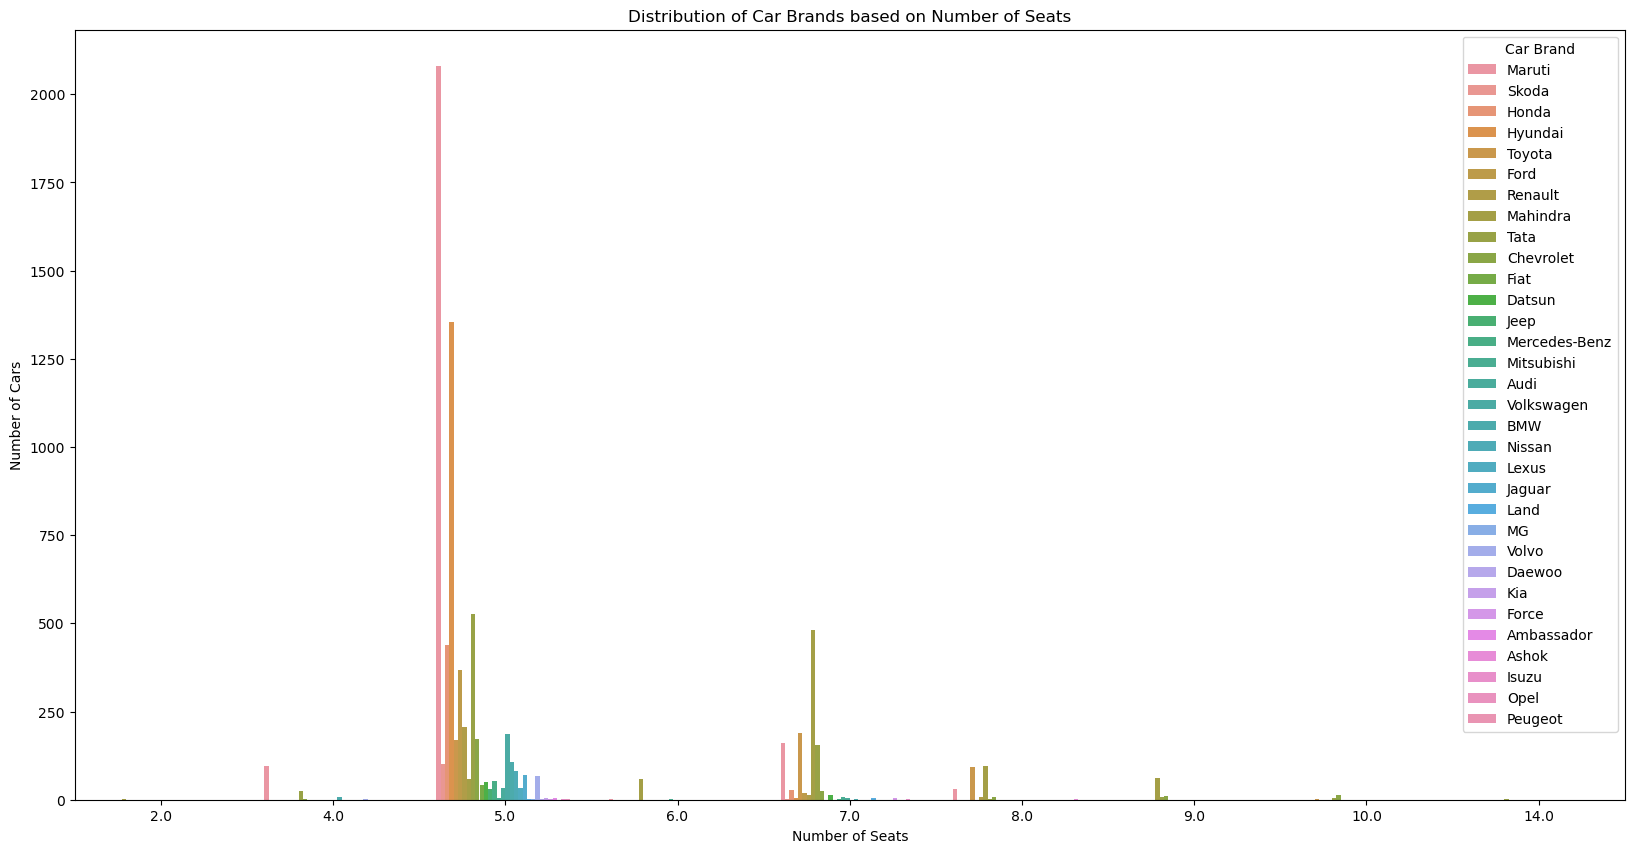

In [37]:
# Bar plot for distribution of car brands based on number of seats
plt.figure(figsize=(20, 10))
sns.countplot(x='seats', hue='name', data=df)
plt.title('Distribution of Car Brands based on Number of Seats')
plt.ylabel('Number of Cars')
plt.xlabel('Number of Seats')
plt.legend(title='Car Brand', loc='upper right')
plt.show()

5. The distributions of each owner type by selling price to see how many cars each price has

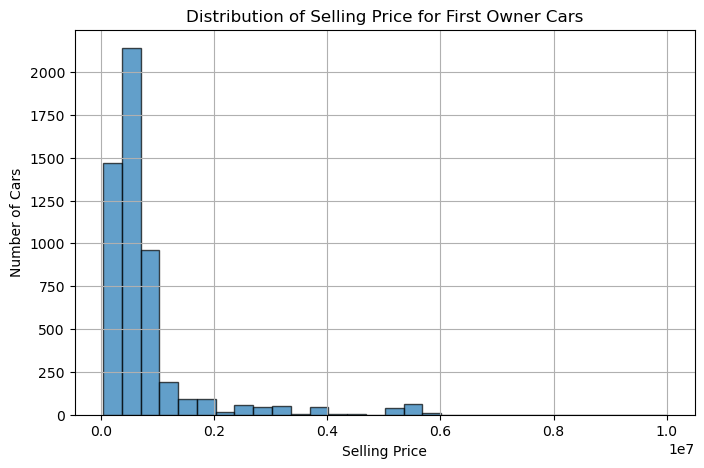

In [38]:
# The distribution of first owner

# Filter data for first owners
df_owner1 = df[df['owner'] == "First Owner"]

# Plot
plt.figure(figsize=(8, 5))
df_owner1['selling_price'].plot(kind='hist', edgecolor='k', alpha=0.7, bins=30) 
plt.title('Distribution of Selling Price for First Owner Cars')
plt.xlabel('Selling Price')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.show()

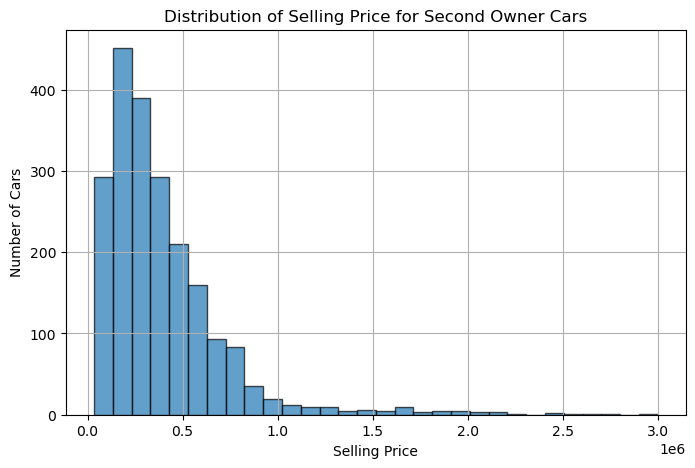

In [39]:
# The distribution of second owner

# Filter data for first owners
df_owner1 = df[df['owner'] == "Second Owner"]

# Plot
plt.figure(figsize=(8, 5))
df_owner1['selling_price'].plot(kind='hist', edgecolor='k', alpha=0.7, bins=30) 
plt.title('Distribution of Selling Price for Second Owner Cars')
plt.xlabel('Selling Price')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.show()

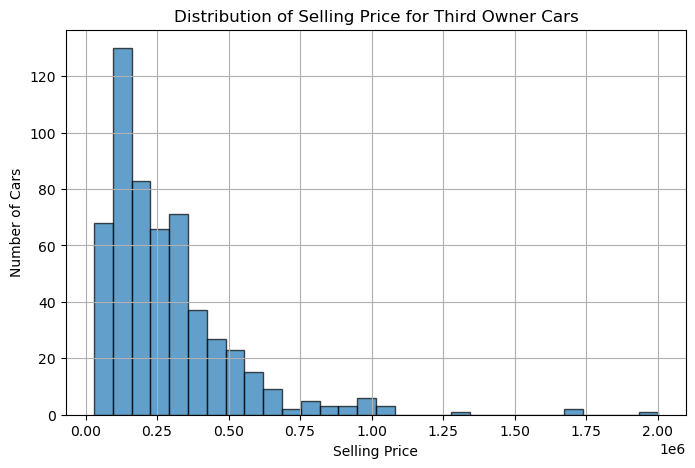

In [40]:
# The distribution of Third Owner

# Filter data for first owners
df_owner1 = df[df['owner'] == "Third Owner"]

# Plot
plt.figure(figsize=(8, 5))
df_owner1['selling_price'].plot(kind='hist', edgecolor='k', alpha=0.7, bins=30)  
plt.title('Distribution of Selling Price for Third Owner Cars')
plt.xlabel('Selling Price')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.show()

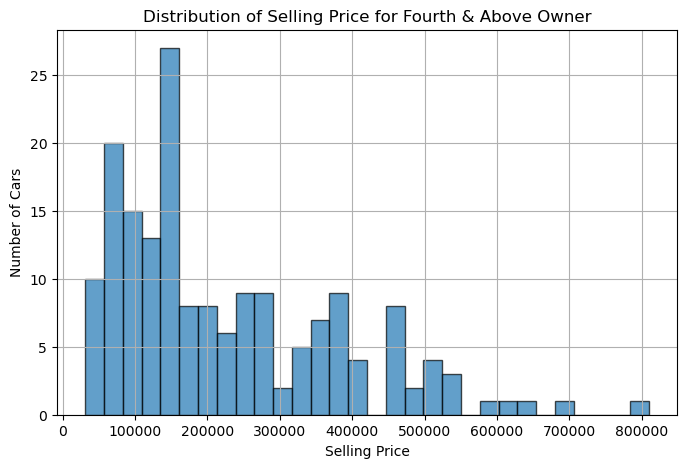

In [41]:
# The distribution of Fourth & Above Owner

# Filter data for first owners
df_owner1 = df[df['owner'] == "Fourth & Above Owner"]

# Plot
plt.figure(figsize=(8, 5))
df_owner1['selling_price'].plot(kind='hist', edgecolor='k', alpha=0.7, bins=30)  
plt.title('Distribution of Selling Price for Fourth & Above Owner')
plt.xlabel('Selling Price')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.show()

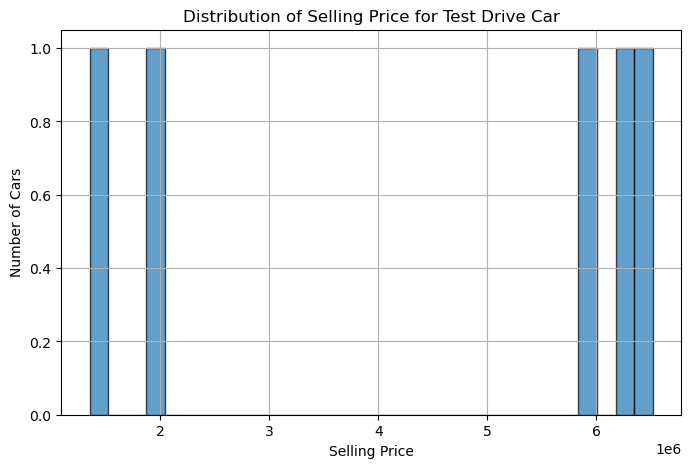

In [42]:
# The distribution of Test Drive Car

# Filter data for first owners
df_owner1 = df[df['owner'] == "Test Drive Car"]

# Plot
plt.figure(figsize=(8, 5))
df_owner1['selling_price'].plot(kind='hist', edgecolor='k', alpha=0.7, bins=30)  
plt.title('Distribution of Selling Price for Test Drive Car')
plt.xlabel('Selling Price')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.show()

6. The distribution of each brand by year

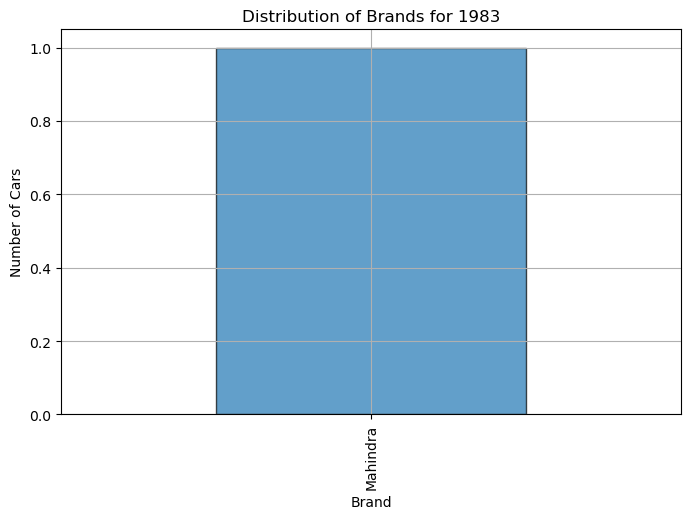

In [43]:

year = 1983
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

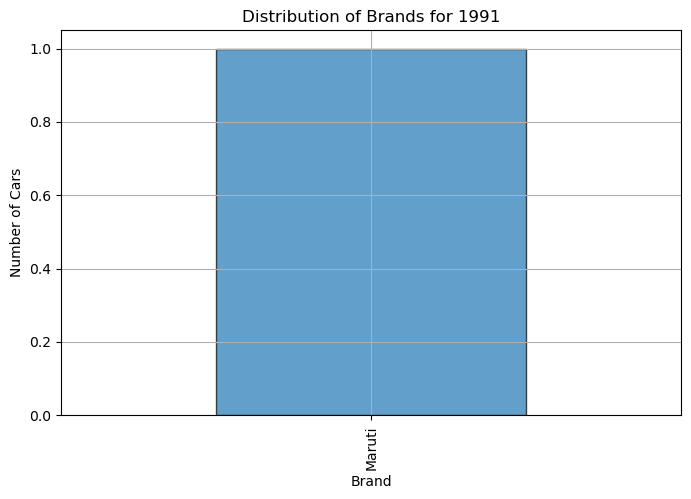

In [44]:

year = 1991
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

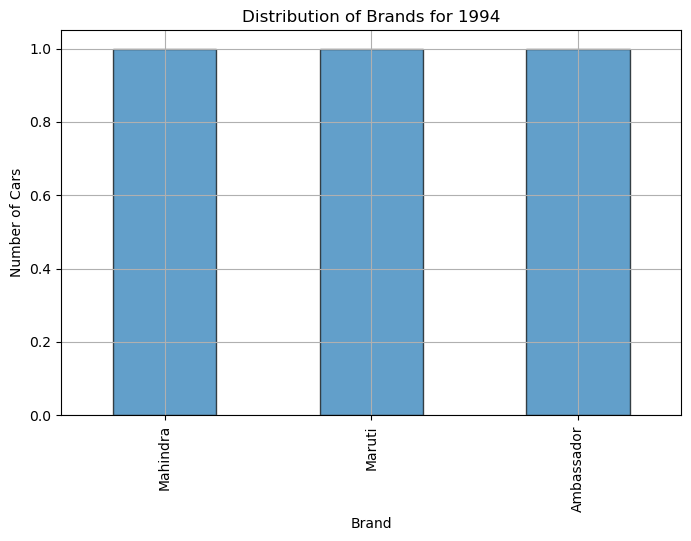

In [45]:

year = 1994
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

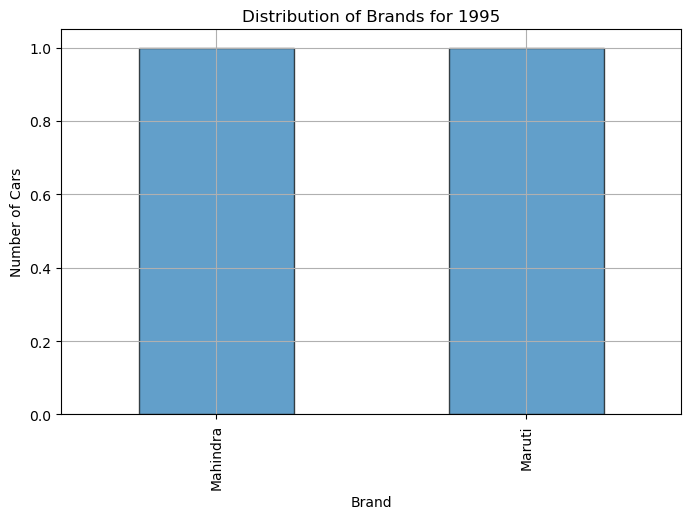

In [46]:

year = 1995
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

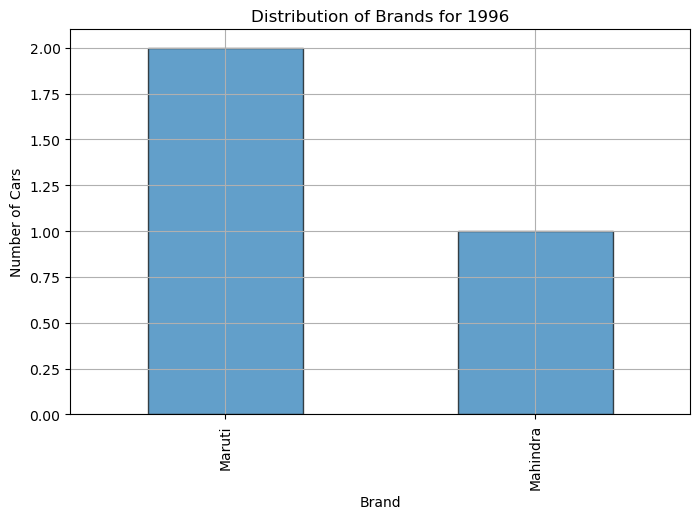

In [47]:

year = 1996
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

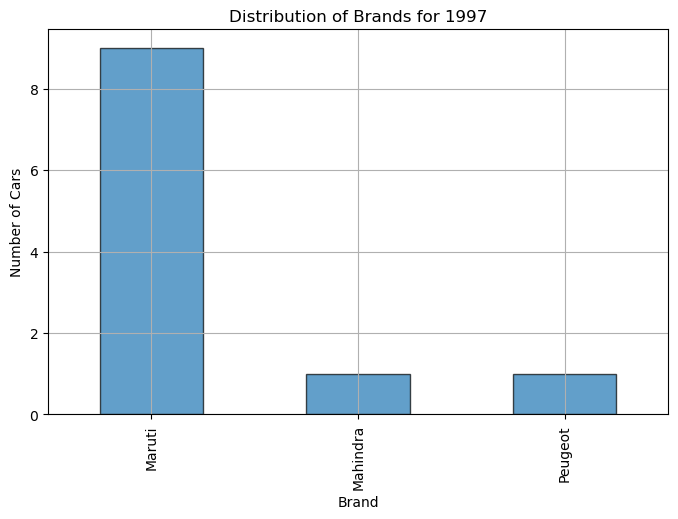

In [48]:

year = 1997
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

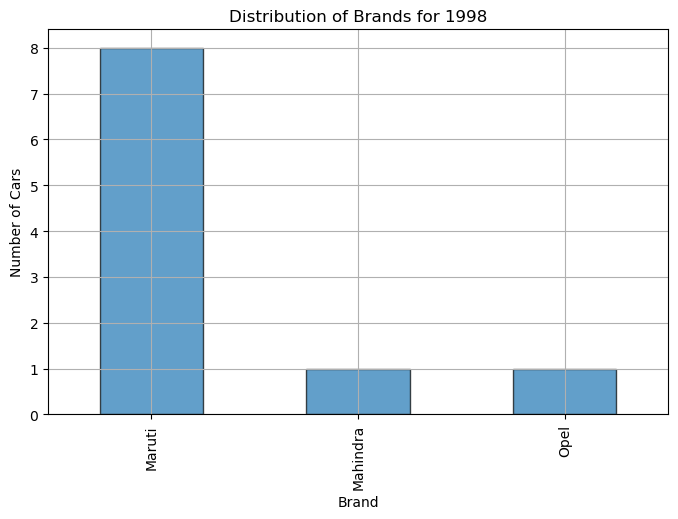

In [49]:

year = 1998
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

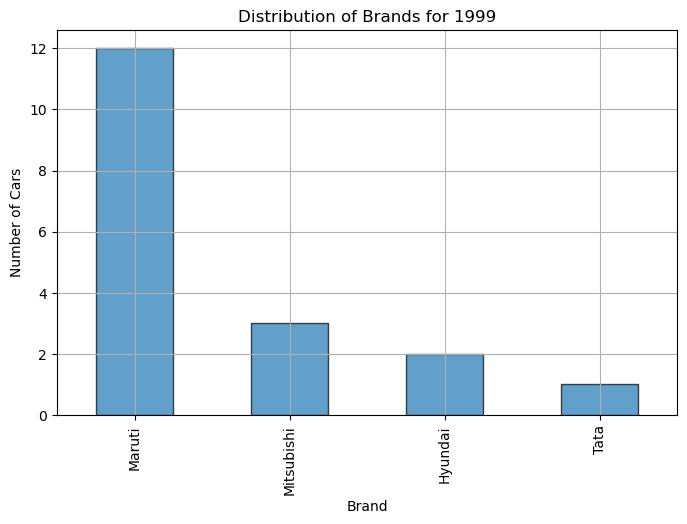

In [50]:

year = 1999
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

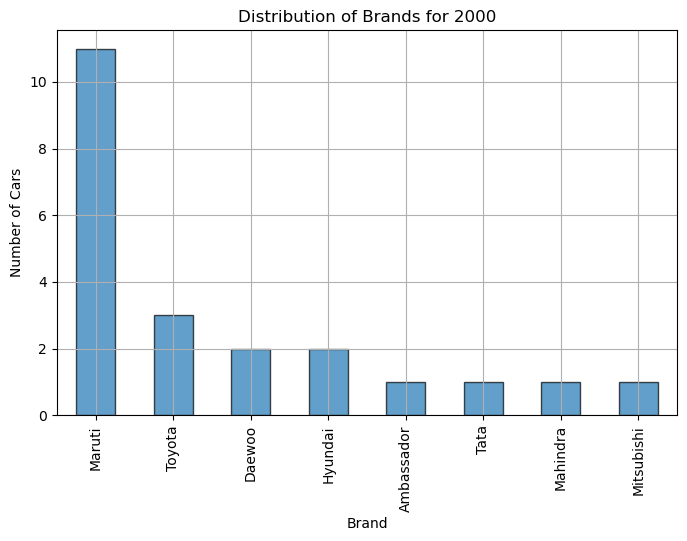

In [51]:

year = 2000
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

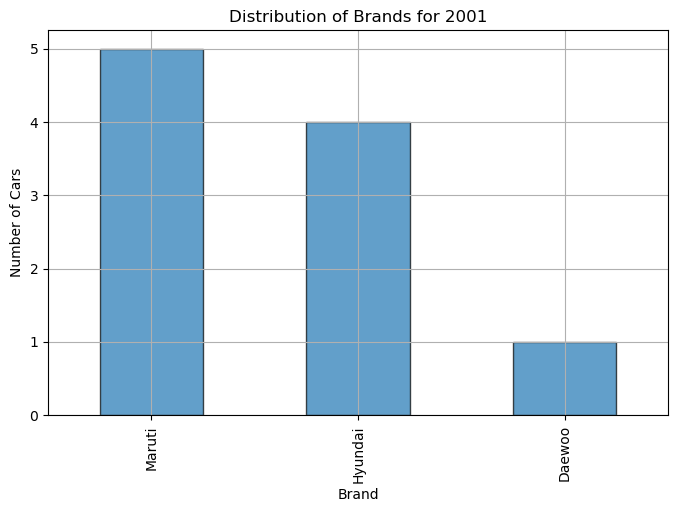

In [52]:

year = 2001
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

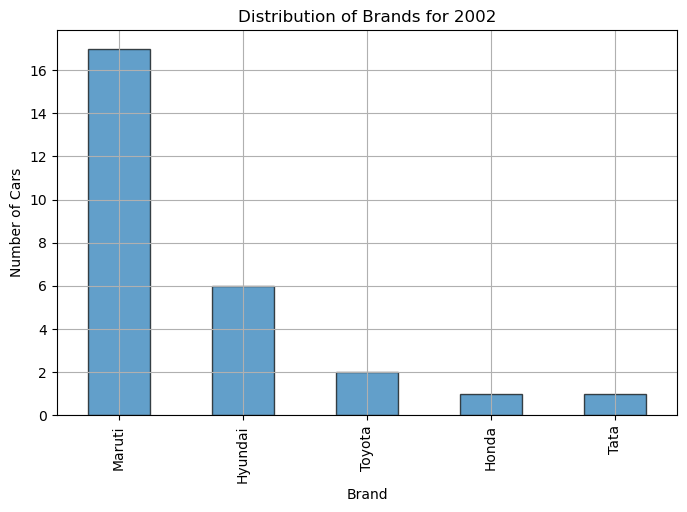

In [53]:

year = 2002
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

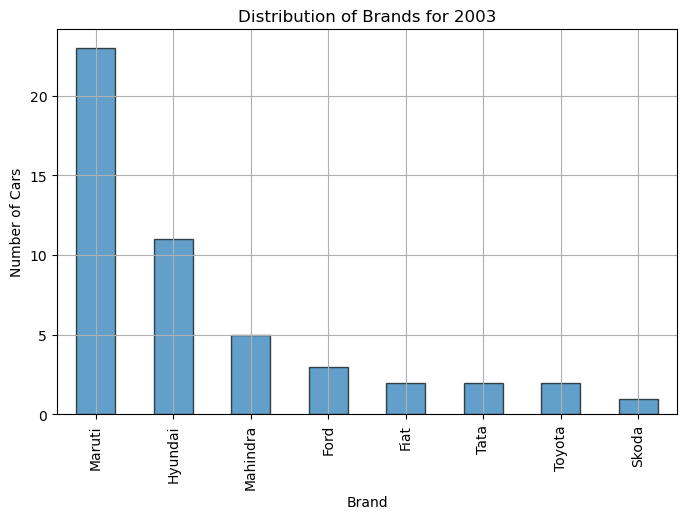

In [54]:

year = 2003
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

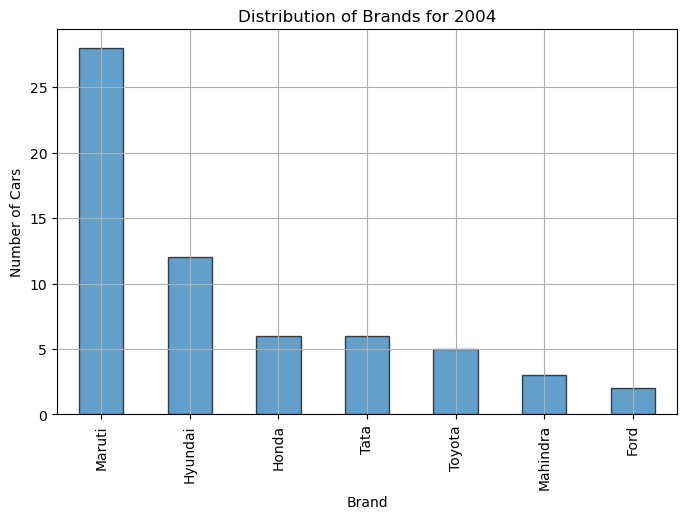

In [55]:

year = 2004
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

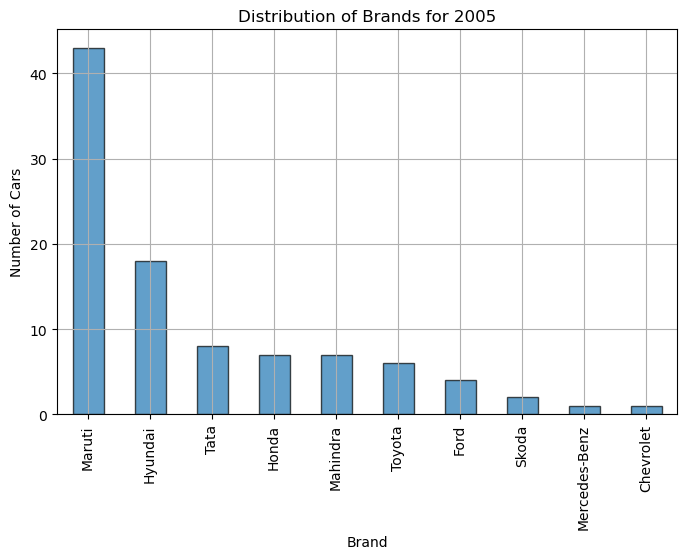

In [56]:

year = 2005
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

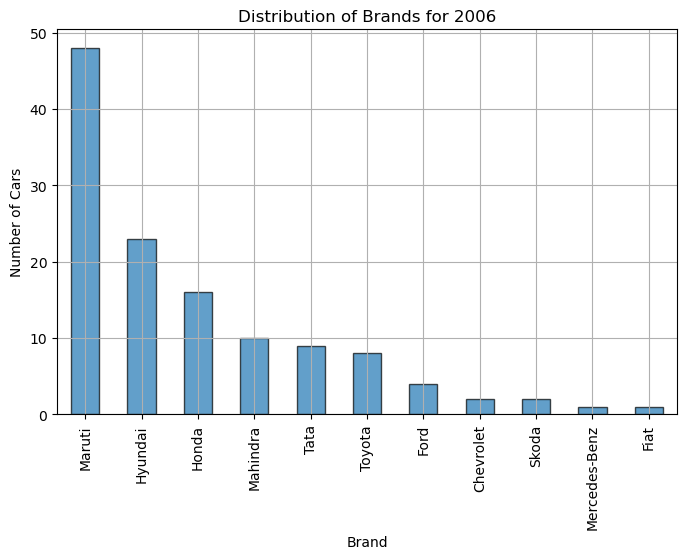

In [57]:

year = 2006
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

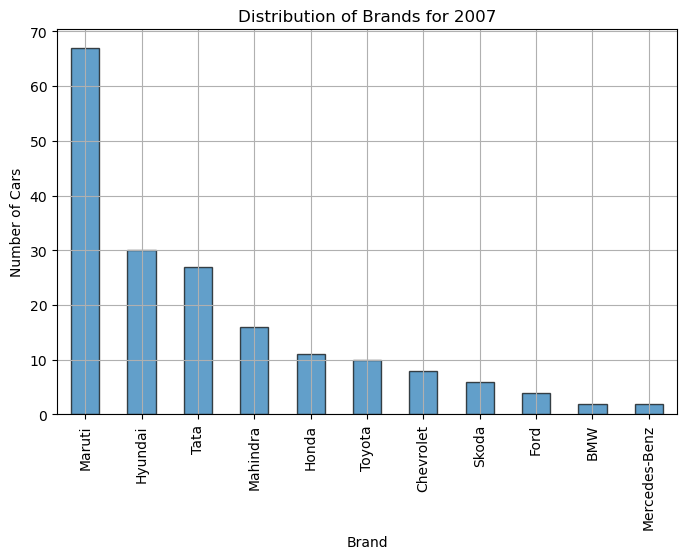

In [58]:

year = 2007
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

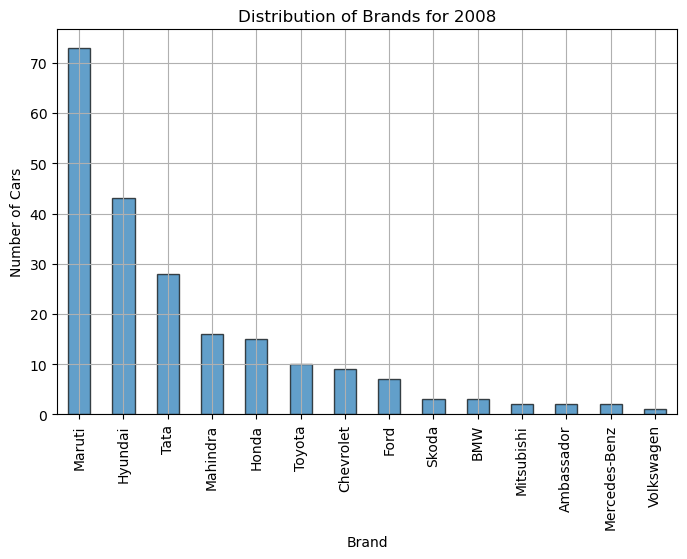

In [59]:

year = 2008
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

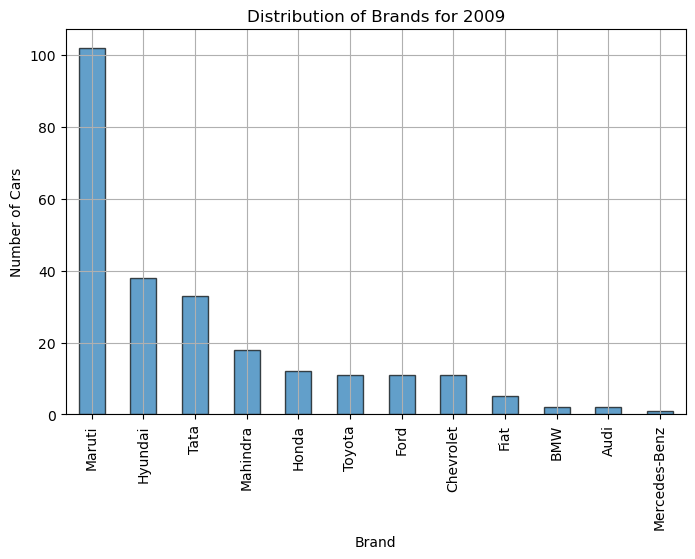

In [60]:

year = 2009
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

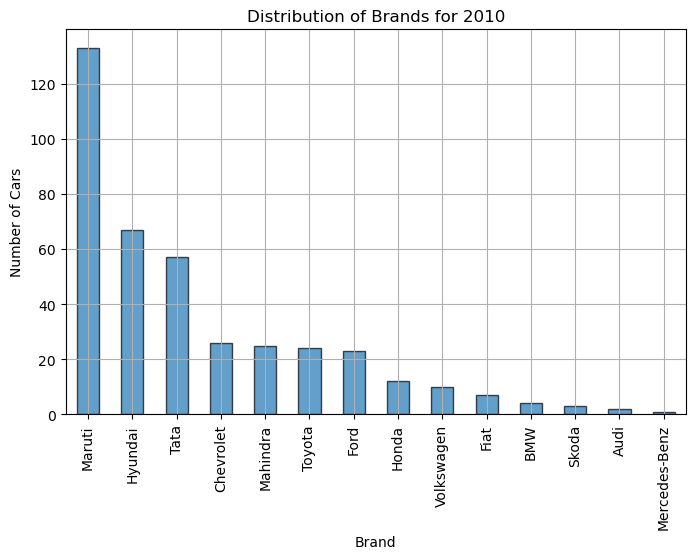

In [61]:

year = 2010
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

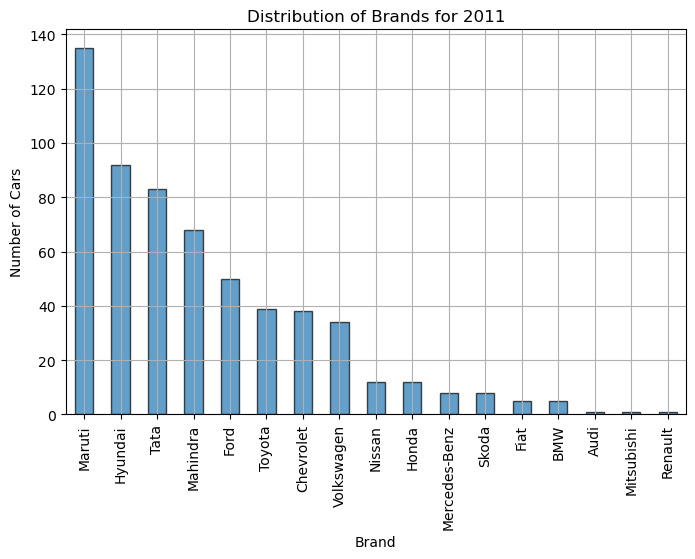

In [62]:

year = 2011
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

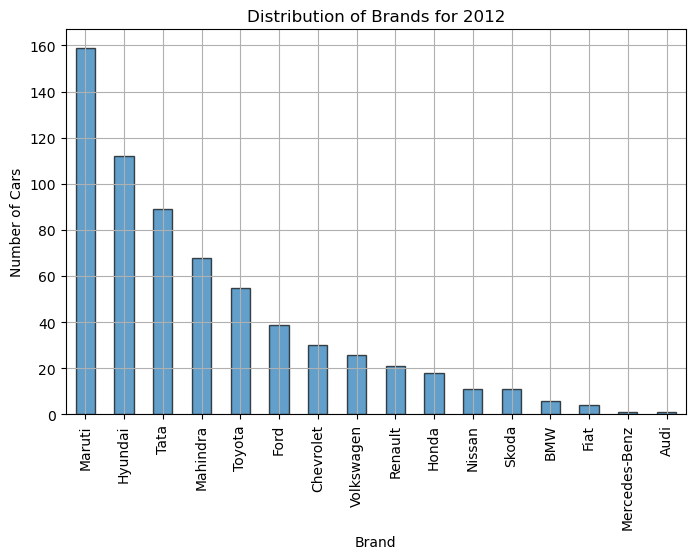

In [63]:

year = 2012
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

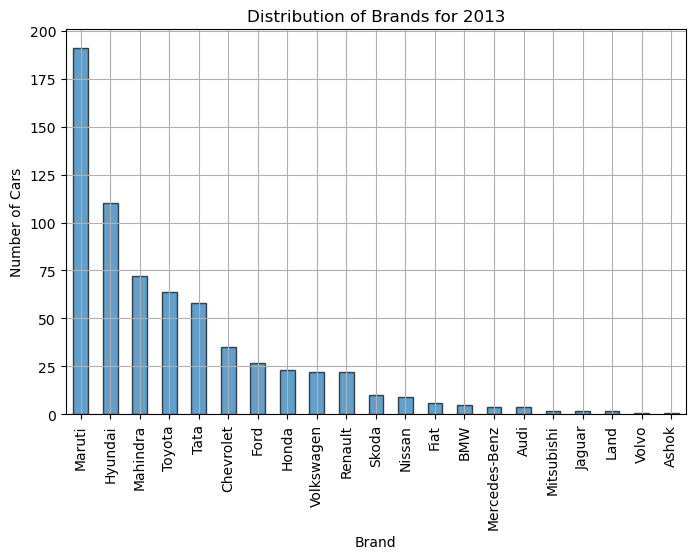

In [64]:

year = 2013
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

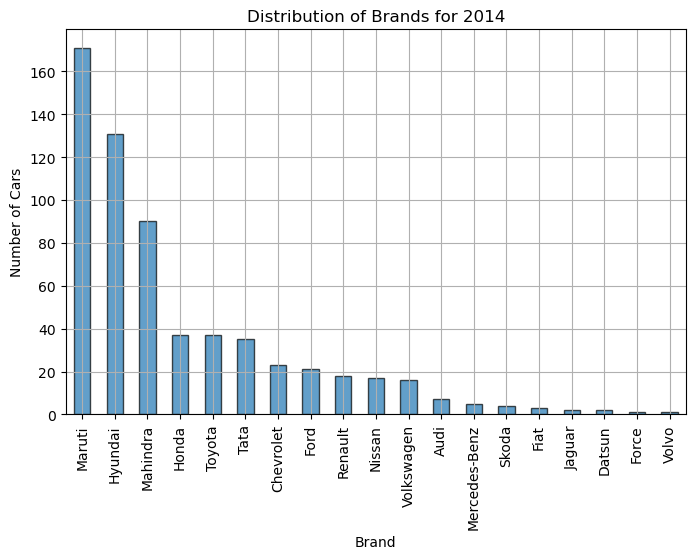

In [65]:

year = 2014
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

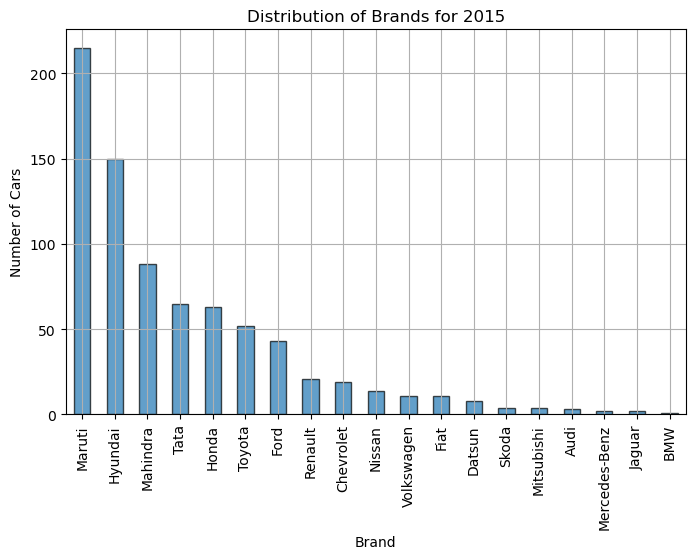

In [66]:

year = 2015
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

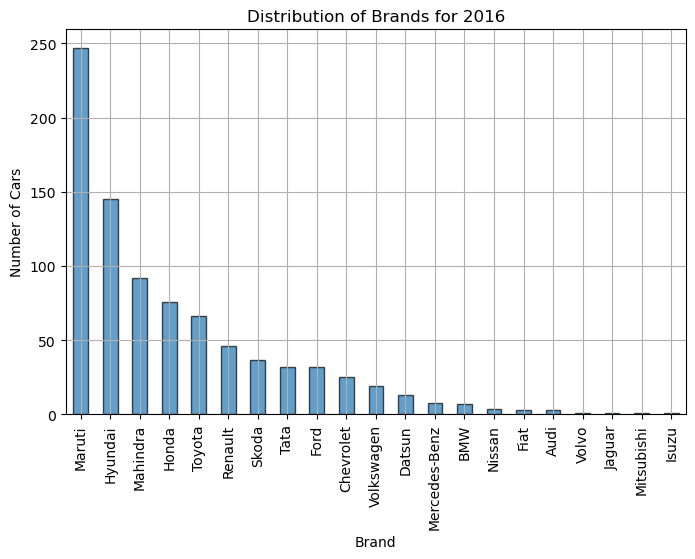

In [67]:

year = 2016
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

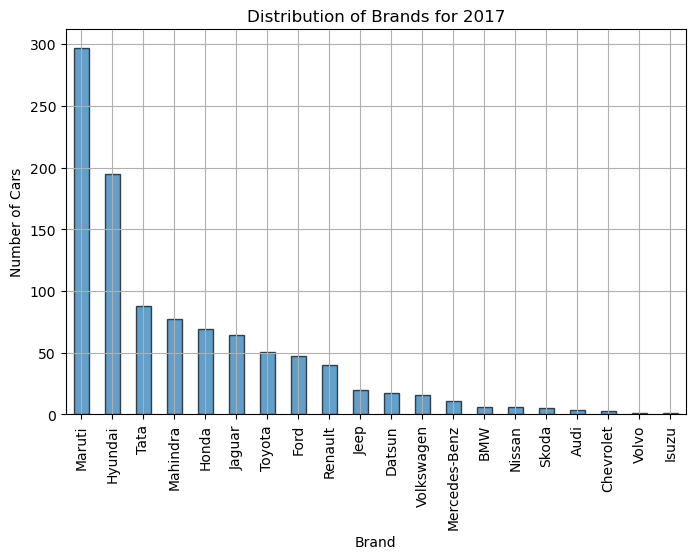

In [68]:

year = 2017
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

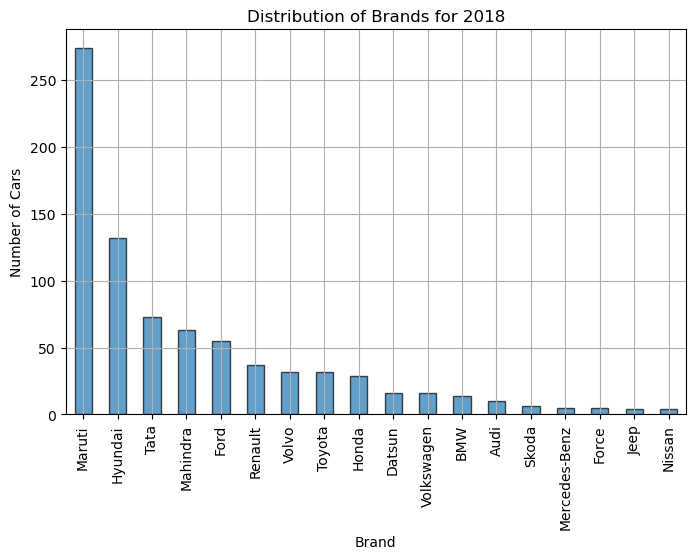

In [69]:

year = 2018
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

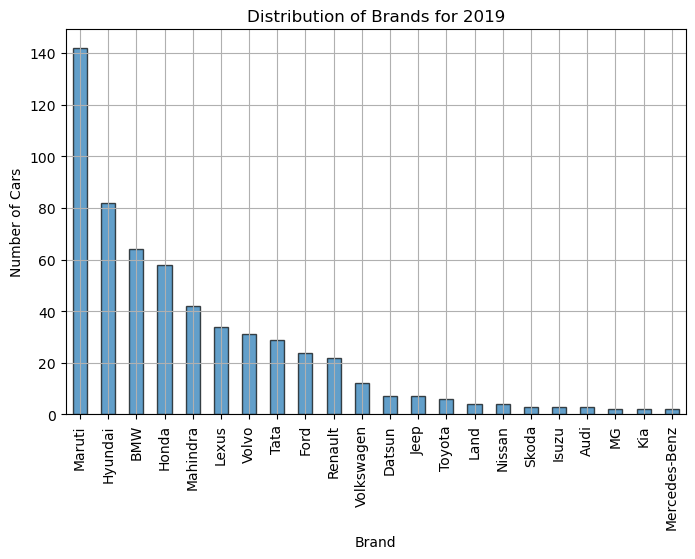

In [70]:

year = 2019
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

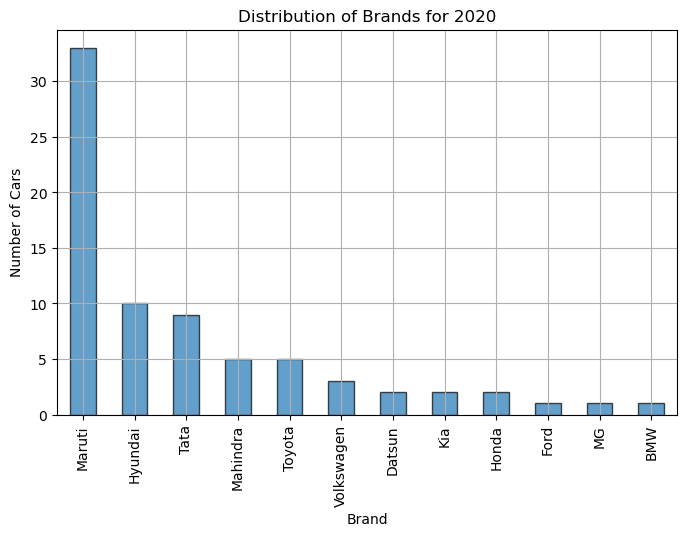

In [71]:

year = 2020
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

7. The distribution of average price by brand

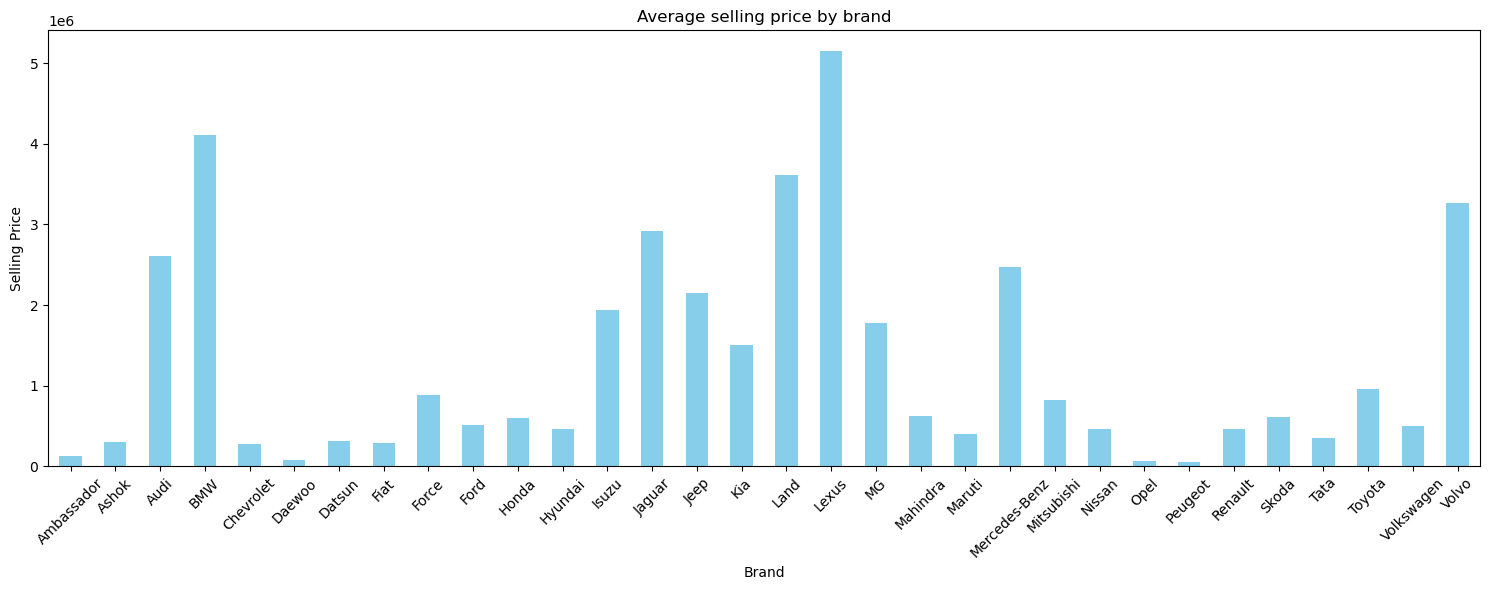

In [72]:
# The average price by brand

# The average price by brand
avg_owner_over_sellingprice = df.groupby('name')['selling_price'].mean()

# Set the figure size
plt.figure(figsize=(15,6))  # Here, 10 is the width and 6 is the height

# Plotting
avg_owner_over_sellingprice.plot(kind='bar', color='skyblue')
plt.title('Average selling price by brand')  # Adjusted the title to reflect the correct variable
plt.ylabel('Selling Price')
plt.xlabel('Brand')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
#By adjusting the figsize values, you can achieve the desired plot size. Increase or decrease the values as needed.

**Correlation Matrix**

A correlation matrix is a table that displays the correlation coefficients between multiple variables. Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1. If two variables have perfect positive correlation, the value would be 1, if they have perfect negative correlation, the value would be -1, and if they have no correlation, the value would be 0.

C:\Users\user\AppData\Local\Temp\ipykernel_14772\1284947356.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="coolwarm")  #don't forget these are not all variables! categorical is not here...


<Axes: >

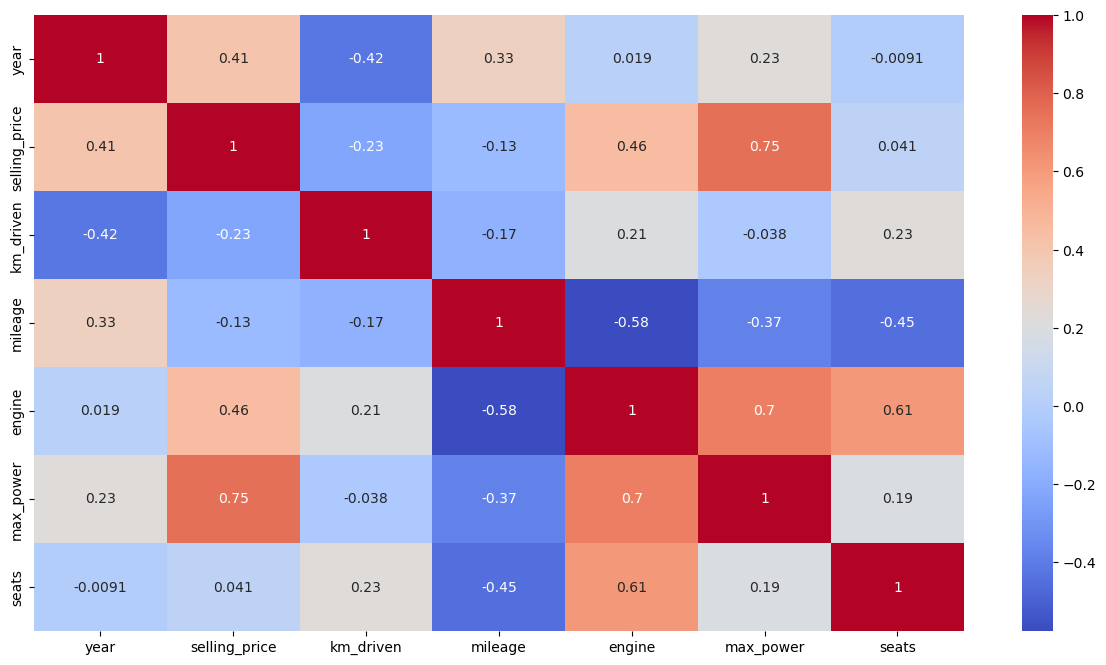

In [73]:
# Let's check out heatmap
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")  #don't forget these are not all variables! categorical is not here...

Let's tramsform our categorical features into numerics by using   **LabelEncoder**

In [74]:
from sklearn.preprocessing import LabelEncoder

In [75]:
le = LabelEncoder()

df["seller_type"] = le.fit_transform(df["seller_type"])
df["fuel"] = le.fit_transform(df["fuel"])
df["transmission"] = le.fit_transform(df["transmission"])
df["name"] = le.fit_transform(df["name"])

In [76]:
print("The label of sellertype are of :",df["seller_type"].unique(),"\n")
print("The label of fuel are of :",df["fuel"].unique(),"\n")
print("The label of transmission are of :",df["transmission"].unique(),"\n")
print("The label of name are of :",df["name"].unique(),"\n")

The label of sellertype are of : [1 0 2] 

The label of fuel are of : [1 3 2 0] 

The label of transmission are of : [1 0] 

The label of name are of : [20 27 10 11 29  9 26 19 28  4  7  6 14 21 22  2 30  3 23 17 13 16 18 31
  5 15  8  0  1 12 24 25] 



In [77]:
print("The label of sellertype are of :",df["seller_type"].dtype,"\n")
print("The label of fuel are of :",df["fuel"].dtype,"\n")
print("The label of transmission are of :",df["transmission"].dtype,"\n")
print("The label of name are of :",df["name"].dtype,"\n")

The label of sellertype are of : int32 

The label of fuel are of : int32 

The label of transmission are of : int32 

The label of name are of : int32 



In [78]:
# Only for owner, we will transform the data into 1-5 categories

order = {'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner':4, 'Test Drive Car':5}
df['owner'] = df['owner'].map(order)

In [79]:
# Let's check its unique values
df['owner'].unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [80]:
# Now let's check its header again
df.head()

name  year  selling_price  km_driven  fuel  seller_type  transmission  \
0    20  2014         450000     145500     1            1             1   
1    27  2014         370000     120000     1            1             1   
2    10  2006         158000     140000     3            1             1   
3    11  2010         225000     127000     1            1             1   
4    20  2007         130000     120000     3            1             1   

   owner  mileage  engine  max_power  seats  
0      1    23.40  1248.0      74.00    5.0  
1      2    21.14  1498.0     103.52    5.0  
2      3    17.70  1497.0      78.00    5.0  
3      1    23.00  1396.0      90.00    5.0  
4      1    16.10  1298.0      88.20    5.0

Let's plot correlation matrix again

<Axes: >

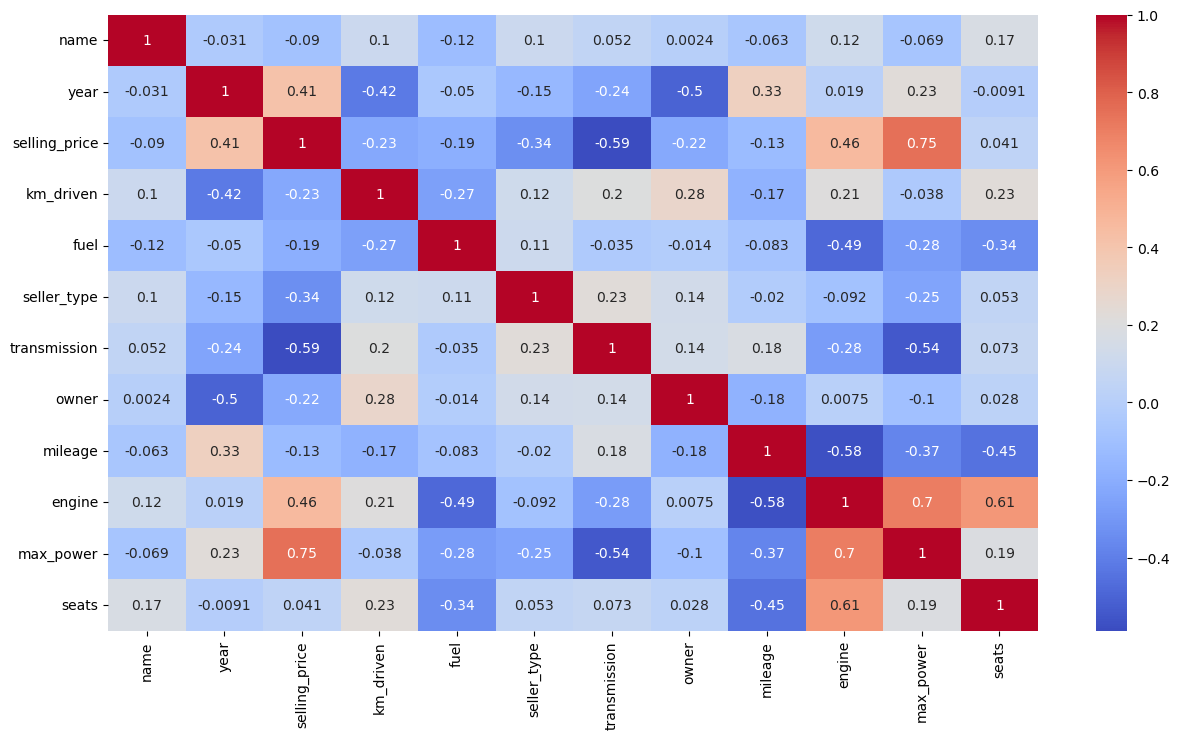

In [81]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

According to the matrix, the potential features are year, transmission, engine, and max_power.
However, it can be seen that there is a relatively high positive correlation between the max_power and the engine, so we will select max_power as one of the candidate features since it shows a significant correlation with the selling_price in a positive way.

In the next section, we're gonna use three more algorithms to determine which features are important.

**Predictive Power Score**

Predictive Power Score (PPS) is an alternative to the correlation coefficient for examining the relationship between two variables. While correlation measures linear relationships between two continuous variables, PPS can detect and quantify more types of relationships (linear, non-linear, and categorical) and can be used for different types of variables (categorical, continuous, etc.).

<Axes: xlabel='x', ylabel='y'>

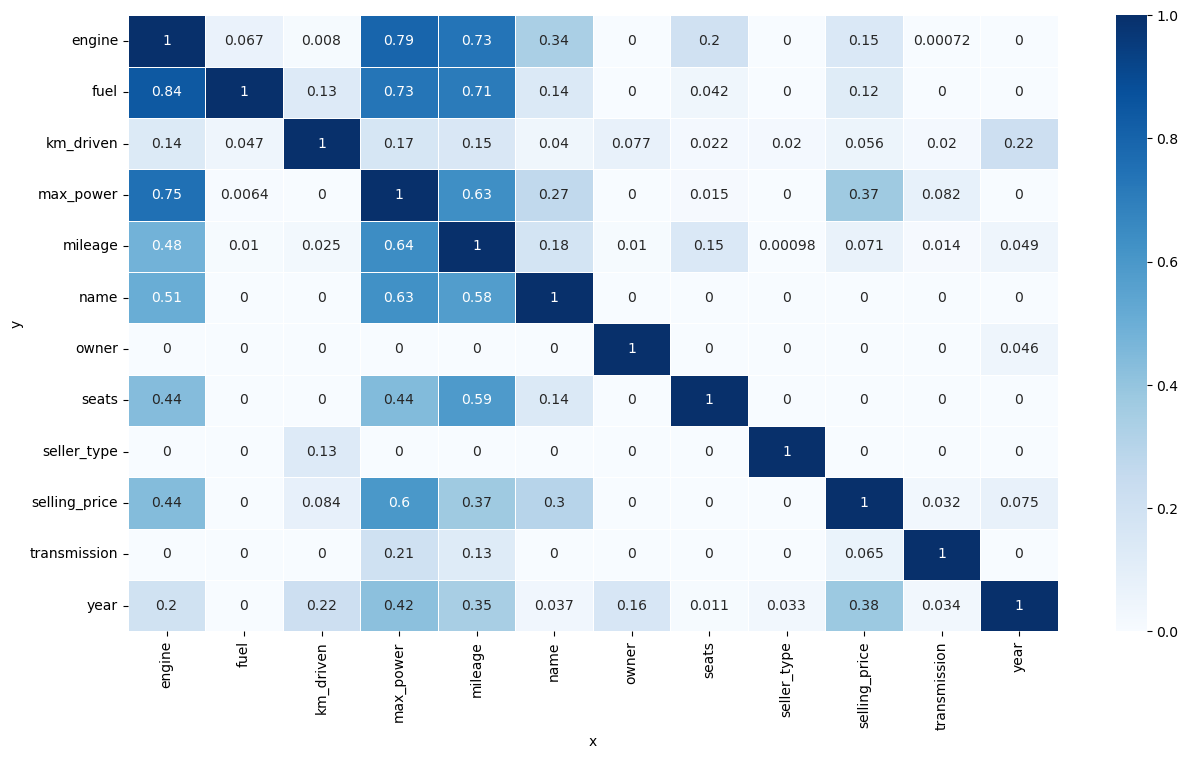

In [82]:
import ppscore as pps

# before using pps, let's drop country and year
dfcopy = df.copy()
#dfcopy.drop(['country', 'year'], axis='columns', inplace=True)

#this needs some minor preprocessing because seaborn.heatmap unfortunately does not accept tidy data
matrix_df = pps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

#plot
plt.figure(figsize = (15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

As from the data given, we can conclude that the potential important features are max_power, mileage.

**ANOVA Test**

ANOVA (Analysis of Variance) can be used for feature selection, especially when dealing with numerical output (dependent) variables and categorical input (independent) variables. The basic idea behind using ANOVA for feature selection is to determine which features have the most significant impact on the variance of the output variable.

In [83]:
# Filling NA values, since null values are included in the dataset

df["mileage"].fillna(df["mileage"].mean(), inplace=True)
df["engine"].fillna(df["engine"].median(), inplace=True)
df["max_power"].fillna(df["max_power"].median(), inplace=True)
df["seats"].fillna(df["seats"].median(), inplace=True)

In [84]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Data prep (assuming df is already defined)
X = df.drop(columns="selling_price")
y = df["selling_price"]

selector = SelectKBest(score_func=f_classif, k=3)  # selecting top 2 features
X_new = selector.fit_transform(X, y)

# Get the features that were selected:
selected_features = X.columns[selector.get_support()]
print(f"Selected Features: {selected_features.tolist()}")
#The crucial change is using X.columns which gives you the column names of the DataFrame X that you passed to fit_transform().

Selected Features: ['year', 'transmission', 'max_power']


**Using Mutual Information**

Mutual Information (MI) is a measure from information theory that quantifies the amount of information obtained about one random variable through observing another random variable. In the context of feature selection, it helps determine how much information a particular feature provides about the target variable. Features that provide more information about the target are deemed more relevant.

In [85]:
from sklearn.feature_selection import mutual_info_regression, SelectKBest

# Select top 5 features based on mutual information
selector = SelectKBest(mutual_info_regression, k=4)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected features using Mutual Information:", selected_features)

Selected features using Mutual Information: Index(['year', 'mileage', 'engine', 'max_power'], dtype='object')


**Conclusions**

Based on the result, we can conclude that the important features are year, max_power, and mileage

# **Feature Selection**

In [15]:
# Let's load the dataset again
df = pd.read_csv(DIR + 'Cars - Cars.csv')

In [16]:
# Droping the torquefeature, since it's too much complicated to interpret
df = df.drop(columns="torque")

In [17]:
df.head()

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

   seats  
0    5.0  
1    5.0  
2    5.0  
3    5.0  
4    5.0

In [18]:
# transforming the owner feature into 1-5 category

order = {'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner':4, 'Test Drive Car':5}
df['owner'] = df['owner'].map(order)
df['owner'][0:4]

0    1
1    2
2    3
3    1
Name: owner, dtype: int64

In [19]:
# Extracting only the first word for the name feature

df['name'] = df['name'].str.split().str.get(0)

df['name']

0        Maruti
1         Skoda
2         Honda
3       Hyundai
4        Maruti
         ...   
8123    Hyundai
8124    Hyundai
8125     Maruti
8126       Tata
8127       Tata
Name: name, Length: 8128, dtype: object

In [20]:
# Filtering out features that contain mixed text and number values.
df["mileage"] = df["mileage"].str.extract(r'(\d+(\.\d+)?)')[0]
df["engine"] = df["engine"].str.extract(r'(\d+(\.\d+)?)')[0]
df["max_power"] = df["max_power"].str.extract(r'(\d+(\.\d+)?)')[0]

df["engine"] = df["engine"].astype(float)
df["max_power"] = df["max_power"].astype(float)
df["mileage"] = df["mileage"].astype(float)

In [21]:
df.head()

name  year  selling_price  km_driven    fuel seller_type transmission  \
0   Maruti  2014         450000     145500  Diesel  Individual       Manual   
1    Skoda  2014         370000     120000  Diesel  Individual       Manual   
2    Honda  2006         158000     140000  Petrol  Individual       Manual   
3  Hyundai  2010         225000     127000  Diesel  Individual       Manual   
4   Maruti  2007         130000     120000  Petrol  Individual       Manual   

   owner  mileage  engine  max_power  seats  
0      1    23.40  1248.0      74.00    5.0  
1      2    21.14  1498.0     103.52    5.0  
2      3    17.70  1497.0      78.00    5.0  
3      1    23.00  1396.0      90.00    5.0  
4      1    16.10  1298.0      88.20    5.0

According to the Power Predictive Score, max_power, mileage,and year are selected as our strong features

In [22]:
#x is our strong features
X = df[        ['year','max_power','mileage']        ]

#y is simply the life expectancy col
y = df["selling_price"]

In [23]:
X.head()

year  max_power  mileage
0  2014      74.00    23.40
1  2014     103.52    21.14
2  2006      78.00    17.70
3  2010      90.00    23.00
4  2007      88.20    16.10

Train and Test Split

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [25]:
X_test.head()

year  max_power  mileage
1971  2004     100.00     12.8
4664  2014     138.10     14.0
5448  2016      73.94     23.2
3333  2006     100.00     16.9
2316  2013      74.00     22.9

In [26]:
X_train.head()

year  max_power  mileage
6783  2006      46.30    19.70
1073  2018     174.50    12.90
7756  2017     187.74    19.59
144   2013     138.03    14.28
6424  2013      74.00    23.40

# Preprocessing

Let's explore the null values and remove them

In [27]:
#check for null values
X_train[   ['year', 'max_power','mileage'] ].isna().sum()

year           0
max_power    149
mileage      151
dtype: int64

In [28]:
X_test[  ['year', 'max_power','mileage']  ].isna().sum()

year          0
max_power    67
mileage      70
dtype: int64

In [29]:
# Checking null data for traning label set
y_train.isna().sum()

0

In [30]:
# Checking null data for testing label set
y_test.isna().sum()

0

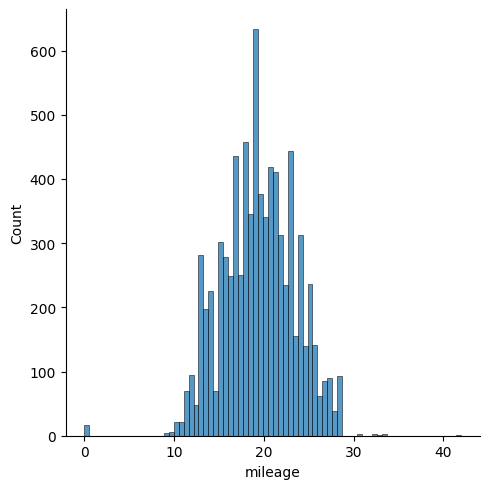

In [31]:
# Checking the distribution of mileage
sns.displot(data=df, x='mileage')

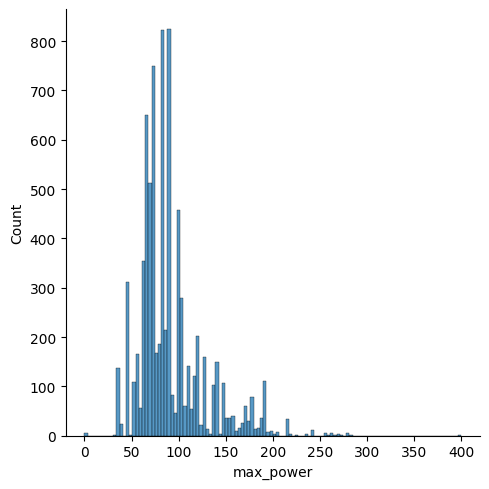

In [32]:
# Checking the distribution of max_power
sns.displot(data=df, x='max_power')

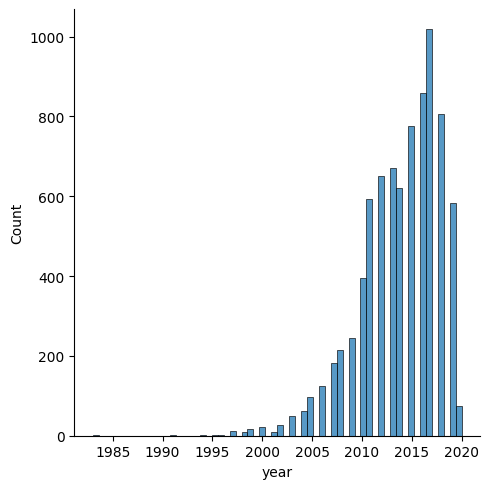

In [33]:
# Checking the distribution of max_power
sns.displot(data=df, x='year')

In [34]:
#let's fill the training set first!

X_train['mileage'].fillna(X_train['mileage'].median(), inplace=True)
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_train['year'].fillna(X_train['year'].median(), inplace=True)

In [35]:
#let's fill the testing set with the training distribution first!

X_test['mileage'].fillna(X_train['mileage'].median(), inplace=True)
X_test['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_test['year'].fillna(X_train['year'].median(), inplace=True)

In [36]:
#check again
X_train[['year','max_power','mileage']].isna().sum()

year         0
max_power    0
mileage      0
dtype: int64

In [37]:
X_train['mileage'].mean()

19.414276674283705

In [38]:
X_train['mileage'].std()

3.9656791764603043

In [39]:
X_train['max_power'].max()

282.0

In [40]:
X_train['max_power'].min()

0.0

In [41]:
X_train['year'].min()

1983

In [42]:
X_train['year'].max()

2020

**Checking Outlier**

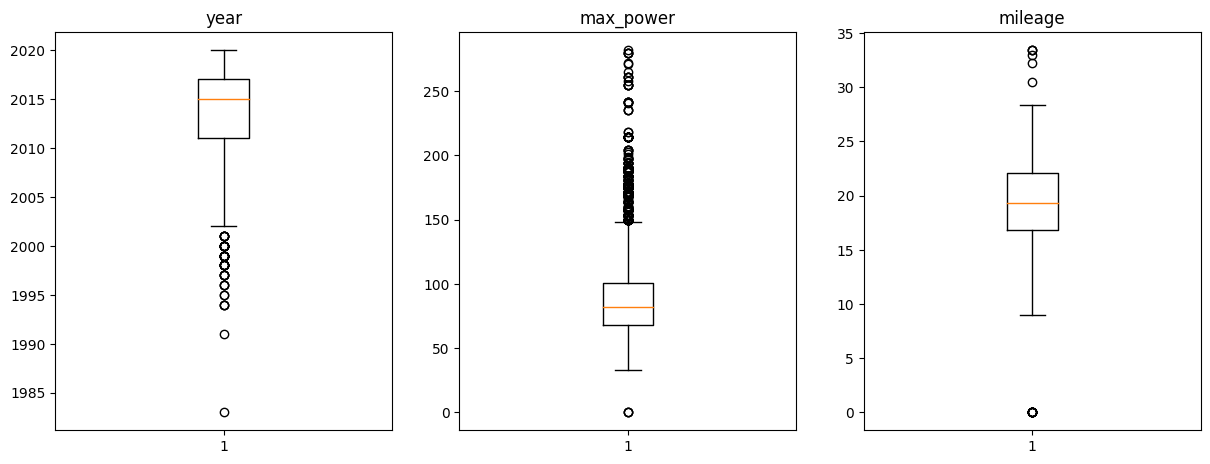

In [43]:
import matplotlib.pyplot as plt

# Create a dictionary of columns.
col_dict = {'year':1,'max_power':2,'mileage':3}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [44]:
def outlier_count(col, data=X_train):
    try:
        q75, q25 = np.percentile(data[col], [75, 25])
        iqr = q75 - q25
        min_val = q25 - (iqr*1.5)
        max_val = q75 + (iqr*1.5)
        outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
        outlier_percent = round(outlier_count/len(data[col])*100, 2)

        if(outlier_count > 0):
            print("\n"+15*'-' + col + 15*'-'+"\n")
            print('Number of outliers: {}'.format(outlier_count))
            print('Percent of data that is outlier: {}%'.format(outlier_percent))
    except Exception as e:
        print(f"Error processing column {col}: {str(e)}")

In [45]:
numeric_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
for col in numeric_cols:
    outlier_count(col)


---------------year---------------

Number of outliers: 55
Percent of data that is outlier: 0.97%

---------------max_power---------------

Number of outliers: 421
Percent of data that is outlier: 7.4%

---------------mileage---------------

Number of outliers: 19
Percent of data that is outlier: 0.33%


**Scaling**

In [46]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [47]:
# Initialize the scalers
minmax_scaler = MinMaxScaler()

In [48]:
X_train[['max_power', 'year']] = minmax_scaler.fit_transform(X_train[['max_power', 'year']])

In [49]:
# Initialize the scalers
zscore_scaler = StandardScaler()

X_train['mileage']  = zscore_scaler.fit_transform(np.array(X_train['mileage']).reshape(-1,1))

In [50]:
# Transform test data using the scalers fitted on training data (DO NOT fit the scaler on the test data)

X_test[['max_power','year']] = minmax_scaler.transform(X_test[['max_power','year']])
X_test['mileage'] = zscore_scaler.transform(np.array(X_test['mileage']).reshape(-1, 1))


**Transforming truth values into categories**

In this section, we're gonna be transforming and categorizing the y_train and y_test by using np.log function and a defined fucntion. Since this is a classification prject, we'll categorize the truth values into four categories including 0, 1, 2, 3 in which its order is meaningful. 

In [51]:
def categorize_data_onehot(input_data, num_categories, category_labels):
    # Check if the number of labels matches the number of categories
    if len(category_labels) != num_categories:
        raise ValueError("Number of labels must match the number of categories")

    # Calculate boundaries based on quantiles
    boundaries = [np.percentile(input_data, (i / num_categories) * 100) for i in range(1, num_categories)]
    
    # Categorize the input data based on boundaries
    categorized_data = []
    for value in input_data:
        for i, boundary in enumerate(boundaries):
            if value <= boundary:
                category = category_labels[i]
                break
        else:
            category = category_labels[-1]
        categorized_data.append(category)

    # Create a one-hot encoded matrix
    one_hot_encoded = pd.get_dummies(pd.Series(categorized_data))
    
    # Print out the boundaries
    print(f"Boundaries: {boundaries}")
    
    return one_hot_encoded

In [52]:
def categorize_data_label(input_data, num_categories, category_labels):
    categorized_data = []

    # Check if the number of labels matches the number of categories
    if len(category_labels) != num_categories:
        raise ValueError("Number of labels must match the number of categories")

    # Calculate boundaries based on quantiles
    boundaries = [np.percentile(input_data, (i / num_categories) * 100) for i in range(1, num_categories)]
    print(f"Boundaries: {boundaries}")

    for value in input_data:
        # Find the category by comparing the value to boundaries
        for i, boundary in enumerate(boundaries):
            if value <= boundary:
                category = category_labels[i]
                break
        else:
            # If the value is greater than all boundaries, use the last label
            category = category_labels[-1]

        categorized_data.append(category)

    return pd.Series(categorized_data)

In [53]:
# Checking NAN for the labels
print(f"NAN Values:{y_train.isna().sum()}")
print(f"NAN Values:{y_test.isna().sum()}")

NAN Values:0
NAN Values:0


In [54]:
# Define the number of categories and its labels
num_cat = 4
labels = [0,1,2,3]

In [55]:
# Categorizing the truth values into categories as defined above

y_train_encoded = categorize_data_onehot(y_train, num_cat, labels)
y_test_label = categorize_data_label(y_test, num_cat,  labels)

Boundaries: [252000.0, 450000.0, 675000.0]
Boundaries: [254999.0, 450000.0, 675000.0]


**Check if the one-hot endcoding and labeling give the same class for the same input**

In this check, we're gonna make sure that our two converting methods generate the corresponding transformed data 

In [56]:
# Transforming y_train using encoding method
y_train_encoded[:5]

0  1  2  3
0  1  0  0  0
1  0  0  0  1
2  0  0  0  1
3  0  0  1  0
4  0  1  0  0

In [57]:
# Transforming y_train using label method

y_train_label = categorize_data_label(y_train, num_cat,  labels)
y_train_label[:5]

Boundaries: [252000.0, 450000.0, 675000.0]


0    0
1    3
2    3
3    2
4    1
dtype: int64

As can be seen from the result, the class provided by the two methods are the same, then we can be sure that there'll not be missclass error in the model.

**Checking class imbalance**

In this check, we're gonna be counting the number of sample belonging to each class for both of the y_train and y_test so that we can see if there is imbalance class. 

In [58]:
# Checking the number of sample for each class in y_train

y_train_label.value_counts()

1    1500
0    1424
3    1412
2    1353
dtype: int64

Text(0, 0.5, 'Count')

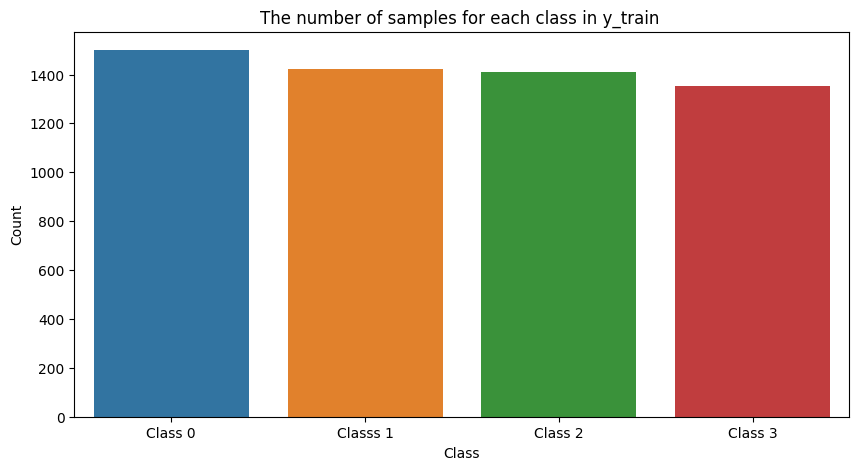

In [59]:
# Plotting bar chart for best visualization
categories = ['Class 0', 'Classs 1', 'Class 2', 'Class 3']

plt.figure(figsize=(10,5))
sns.barplot(x=categories, y = y_train_label.value_counts())
plt.title("The number of samples for each class in y_train ")
plt.xlabel("Class")
plt.ylabel("Count")

In [60]:
# Checking class imbalance for y_test

y_test_label.value_counts()

1    651
0    611
3    609
2    568
dtype: int64

Text(0, 0.5, 'Count')

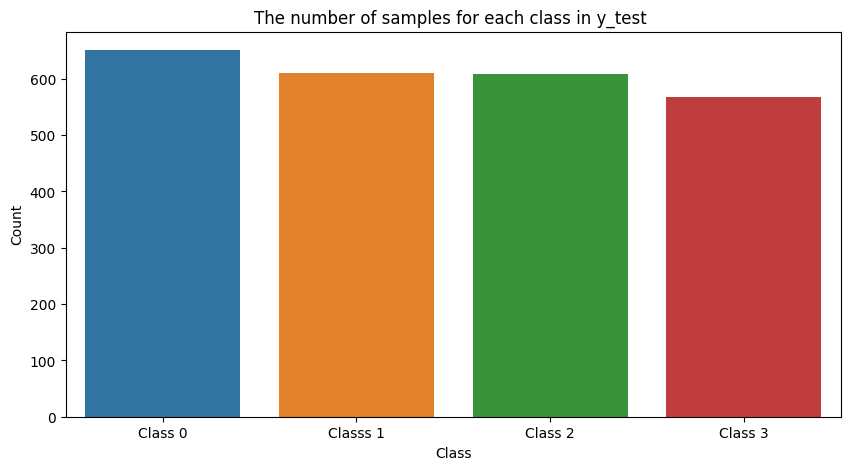

In [61]:
# Plotting bar chart for best visualization
categories = ['Class 0', 'Classs 1', 'Class 2', 'Class 3']

plt.figure(figsize=(10,5))
sns.barplot(x=categories, y = y_test_label.value_counts())
plt.title("The number of samples for each class in y_test ")
plt.xlabel("Class")
plt.ylabel("Count")

As from the result, we can see that all classes are quite balanced, then there is no need to downsampling or upsampling the data.

**Scatterplot Matrix**

In this plot, we're gonna be using pairplot to see how the distributions of each paired features look like so that we can see if our data match the algorithm or not.

<Figure size 1000x500 with 0 Axes>

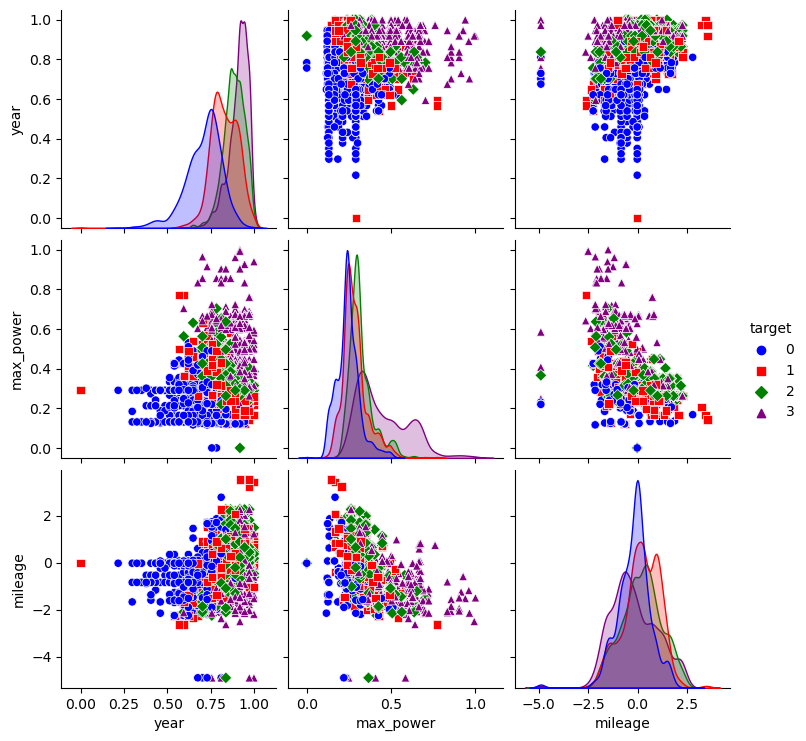

In [51]:
# Creating a new data from the existing data
features = X_train.copy()
labels = y_train_label.copy()

# Reseting its index, so that there will not be null when merging together
features = features.reset_index(drop=True)
labels = labels.reset_index(drop=True)

# Convert arrays to DataFrame
data = pd.DataFrame(features)
data['target'] = labels

# Define colors and markers for the four categories
palette_colors = ['blue', 'red', 'green', 'purple']
markers_styles = ["o", "s", "D", "^"]

# Plotting pairplot
plt.figure(figsize=(10,5))
sns.pairplot(data, hue="target", palette=palette_colors, markers=markers_styles)
plt.show()

Analyzing the plotted result

From the pair plot, here are some observations:

1. Distributions:

   The diagonal shows kernel density estimates for the distributions of each variable for different classes.
   Some classes have overlapping distributions for all variables, while others appear more distinct. For instance, class 3        seems to have a distinct distribution for the "year" and "mileage" variables compared to the other classes.

2. Pairwise Relationships:

   For the scatter plots, each point's color and marker style correspond to its class.
   There are regions in the scatter plots where points from different classes overlap, making them less distinguishable. This      is especially evident in the scatter plots of "year" vs. "max_power" and "year" vs. "mileage."
   For the scatter plot of "max_power" vs. "mileage," there seems to be some structure in the data where classes could be          somewhat distinguishable.


Given these observations:

- Multinomial Logistic Regression: This is an extension of logistic regression to multiclass problems. It assumes a linear relationship between the input features and the log odds of the output. Looking at the scatter plots, it seems there are regions of overlap among classes, and some classes might not be linearly separable based on the provided features. Hence, while multinomial logistic regression might work to some extent, its performance might not be optimal for this dataset. It would likely have challenges distinguishing between classes that overlap significantly.

- Alternative Approaches: Given the overlap and potential nonlinear relationships among classes, non-linear classifiers like decision trees, random forests, or gradient-boosted trees, as well as neural networks, might be better suited for this dataset. Another option could be support vector machines with a nonlinear kernel (e.g., radial basis function or polynomial).

In [62]:
# Let's check shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train_encoded.shape)
print("Shape of y_test: ", y_test_label.shape)

Shape of X_train:  (5689, 3)
Shape of X_test:  (2439, 3)
Shape of y_train:  (5689, 4)
Shape of y_test:  (2439,)


In [63]:
type(y_train_encoded)

pandas.core.frame.DataFrame

In [64]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train_encoded = y_train_encoded.to_numpy()
y_test_label = y_test_label.to_numpy()

In [65]:
# Let's check shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", type(X_train))
print("Shape of X_test: ", type(X_test))
print("Shape of y_train: ", type(y_train_encoded))
print("Shape of y_test: ", type(y_test_label))

Shape of X_train:  <class 'numpy.ndarray'>
Shape of X_test:  <class 'numpy.ndarray'>
Shape of y_train:  <class 'numpy.ndarray'>
Shape of y_test:  <class 'numpy.ndarray'>


# Modeling

**Multinomial Regression**

In [74]:
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.metrics import confusion_matrix

class LogisticRegression:
    
    def __init__(self, k, n, method, alpha, max_iter, regularization=None, l=0, momentum=None, init_method='zeros'):
        self.k = k
        self.n = n
        self.alpha = alpha
        self.max_iter = max_iter
        self.method = method
        self.regularization = regularization
        self.l = l
        self.momentum = momentum
        self.init_method = init_method
        self.losses = []
        self.velocity = 0  # Initialize velocity for momentum
        
    def fit(self, X, Y):
        self.losses = []
        self.velocity = 0  # Reset velocity for each fit
        
        if self.init_method == 'zeros':
            self.W = np.zeros((self.n, self.k))
        elif self.init_method == 'xavier':
            limit = np.sqrt(6 / (self.n + self.k))
            self.W = np.random.uniform(-limit, limit, size=(self.n, self.k))
        else:
            raise ValueError("Invalid initialization method.")
        
        if self.method == "batch":
            start_time = time.time()
            for i in range(self.max_iter):
                loss, grad = self.gradient(X, Y)
                self.losses.append(loss)
                if self.momentum:
                    self.velocity = self.momentum * self.velocity + (1 - self.momentum) * grad
                    grad = self.velocity
                if self.regularization:
                    self.W -= self.alpha * (grad + self.regularization(self.W))
                else:
                    self.W -= self.alpha * grad
                if i % 10000 == 0:
                    print(f"Loss at iteration {i}: {loss}")
            print(f"Time taken: {time.time() - start_time}")
            
        elif self.method == "mini":
            start_time = time.time()
            batch_size = int(0.1 * X.shape[0])
            for i in range(self.max_iter):
                ix = np.random.randint(0, X.shape[0])
                batch_X = X[ix:ix+batch_size]
                batch_Y = Y[ix:ix+batch_size]
                loss, grad = self.gradient(batch_X, batch_Y)
                self.losses.append(loss)
                if self.momentum:
                    self.velocity = self.momentum * self.velocity + (1 - self.momentum) * grad
                    grad = self.velocity
                if self.regularization:
                    self.W -= self.alpha * (grad + self.regularization(self.W))
                else:
                    self.W -= self.alpha * grad
                if i % 5000 == 0:
                    print(f"Loss at iteration {i}: {loss}")
            print(f"Time taken: {time.time() - start_time}")
            
        elif self.method == "sto":
            start_time = time.time()
            list_of_used_ix = []
            for i in range(self.max_iter):
                idx = np.random.randint(X.shape[0])
                while idx in list_of_used_ix:
                    idx = np.random.randint(X.shape[0])
                X_train = X[idx, :].reshape(1, -1)
                Y_train = Y[idx]
                loss, grad = self.gradient(X_train, Y_train)
                self.losses.append(loss)
                if self.momentum:
                    self.velocity = self.momentum * self.velocity + (1 - self.momentum) * grad
                    grad = self.velocity
                if self.regularization:
                    self.W -= self.alpha * (grad + self.regularization(self.W))
                else:
                    self.W -= self.alpha * grad
                list_of_used_ix.append(idx)
                if len(list_of_used_ix) == X.shape[0]:
                    list_of_used_ix = []
                if i % 5000 == 0:
                    print(f"Loss at iteration {i}: {loss}")
            print(f"Time taken: {time.time() - start_time}")
            
        else:
            raise ValueError('Method must be one of the following: "batch", "mini", or "sto".')
        
        
    def gradient(self, X, Y):
        m = X.shape[0]
        h = self.h_theta(X, self.W)
        epsilon = 1e-10 
        # Check if any value in h is too close to zero
        if np.any(h < epsilon):
            print("Values too close to zero encountered in softmax output.")
        loss = - np.sum(Y * np.log(h + epsilon)) / m
        error = h - Y
        grad = self.softmax_grad(X, error)
        # Implement gradient clipping
        grad = np.clip(grad, -1e5, 1e5)
        return loss, grad

    def softmax(self, theta_t_x):
        # A numerically stable version of softmax
        max_theta = np.max(theta_t_x, axis=1, keepdims=True)
        exps = np.exp(theta_t_x - max_theta)
        return exps / np.sum(exps, axis=1, keepdims=True)

    def softmax_grad(self, X, error):
        return X.T @ error

    def h_theta(self, X, W):
        return self.softmax(X @ W)
    
    def predict(self, X_test):
        return np.argmax(self.h_theta(X_test, self.W), axis=1)
    
    def plot(self):
        plt.plot(np.arange(len(self.losses)), self.losses, label="Train Losses")
        plt.title("Losses")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.legend()
        plt.show()

    def confusion_plot(self, y_true, y_pred):
        cm = confusion_matrix(y_true, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
        plt.xlabel('Predicted labels')
        plt.ylabel('True labels')
        plt.title('Confusion Matrix')
        plt.show()
        
  

    def precision(self,y_true, y_pred, average, weights=None):
        
        if average == 'binary':
            true_positive = np.sum((y_true == 1) & (y_pred == 1))
            false_positive = np.sum((y_true == 0) & (y_pred == 1))
            return true_positive / (true_positive + false_positive + 1e-9)
        
        elif average == 'macro':
            # Calculate precision for each class and take the average
            precisions = []
            for i in range(np.max(y_true) + 1):
                true_positive = np.sum((y_true == i) & (y_pred == i))
                false_positive = np.sum((y_true != i) & (y_pred == i))
                precision_i = true_positive / (true_positive + false_positive + 1e-9)
                precisions.append(precision_i)
            return np.mean(precisions)
        
        elif average == 'weighted':
            if weights is None:
                raise ValueError("Weights must be provided for 'weighted' average.")
            else:
                precision = self.recall(y_true, y_pred, average='none')
                precision = precision * weights
            return np.sum(precision)
        
        elif average == 'none':
            # Calculate precision for each class individually
            precisions = []
            for i in range(np.max(y_true) + 1):
                true_positive = np.sum((y_true == i) & (y_pred == i))
                false_positive = np.sum((y_true != i) & (y_pred == i))
                precision_i = true_positive / (true_positive + false_positive + 1e-9)
                precisions.append(precision_i)
            precisions = np.array(precisions)
            precisions[precisions == 0.0] = 1.0
            return precisions
        else:
            raise ValueError("Invalid 'average' parameter. Use 'binary', 'macro', 'weighted', or 'none'.")


    
    def recall(self,y_true, y_pred, average, weights=None):
        
        if average == 'binary':
            true_positive = np.sum((y_true == 1) & (y_pred == 1))
            false_negative = np.sum((y_true == 1) & (y_pred == 0))
            return true_positive / (true_positive + false_negative + 1e-9)
        
        elif average == 'macro':
            # Calculate recall for each class and return a list
            recalls = []
            for i in range(np.max(y_true) + 1):
                true_positive = np.sum((y_true == i) & (y_pred == i))
                false_negative = np.sum((y_true == i) & (y_pred != i))
                recall_i = true_positive / (true_positive + false_negative + 1e-9)
                recalls.append(recall_i)
            return recalls
        
        elif average == 'weighted': 
            if weights is None:
                raise ValueError("Weights must be provided for 'weighted' average.")
            else:
                recalls = self.recall(y_true, y_pred, average='none')
                recalls = recalls * weights
            return np.sum(recalls)
        
        elif average == 'none':
            # Calculate recall for each class individually and return a list
            recalls = []
            for i in range(np.max(y_true) + 1):
                true_positive = np.sum((y_true == i) & (y_pred == i))
                false_negative = np.sum((y_true == i) & (y_pred != i))
                recall_i = true_positive / (true_positive + false_negative + 1e-9)
                recalls.append(recall_i)
            recalls = np.array(recalls)
            recalls[recalls == 0.0] = 1.0
            return recalls
        else:
            raise ValueError("Invalid 'average' parameter. Use 'binary', 'macro', 'weighted', or 'none'.")

            
            
    def f1_score(self, y_true, y_pred, average='macro', weights=None):
        precision_value = self.precision(y_true, y_pred, average)
        recall_value = self.recall(y_true, y_pred, average)

        if average == 'none':
            # Calculate F1-score for each class individually and return a list
            f1_scores = []
            for i in range(np.max(y_true) + 1):
                precision_i = precision_value[i]
                recall_i = recall_value[i]
                f1_i = 2 * (precision_i * recall_i) / (precision_i + recall_i + 1e-9)
                f1_scores.append(f1_i)
            f1_scores = np.array(f1_scores)
            f1_scores[f1_scores == 0.0] = 1.0
            return f1_scores
        
        elif average == 'macro':
            # Calculate macro F1-score
            macro_precision = np.mean(precision_value)
            macro_recall = np.mean(recall_value)
            macro_f1 = 2 * (macro_precision * macro_recall) / (macro_precision + macro_recall + 1e-9)
            return macro_f1
        
        elif average == 'micro':
            # Calculate micro F1-score
            micro_precision = np.sum(precision_value * y_true) / np.sum(precision_value)
            micro_recall = np.sum(recall_value * y_true) / np.sum(recall_value)
            micro_f1 = 2 * (micro_precision * micro_recall) / (micro_precision + micro_recall + 1e-9)
            return micro_f1
        
        elif average == 'weighted':
            if weights is None:
                raise ValueError("Weights must be provided for 'weighted' average.")
            else:
                f1_scores = self.recall(y_true, y_pred, average='none')
                f1_scores = f1_scores * weights
            return np.sum(f1_scores)
        
        else:
            raise ValueError("Invalid 'average' parameter. Use 'none', 'macro', 'micro', or 'weighted'.")
            
    def accuracy(self,y_true, y_pred):
        correct_predictions = np.sum(y_true == y_pred)
        total_predictions = len(y_true)
        return correct_predictions / total_predictions


    def macro_precision(self, y_true, y_pred):
        return self.precision(y_true, y_pred, average='macro')

    def macro_recall(self, y_true, y_pred):
        return self.recall(y_true, y_pred, average='macro')

    def macro_f1_score(self, y_true, y_pred):
        return self.f1_score(y_true, y_pred, average='macro')

    def weighted_precision(self, y_true, y_pred, weights):
        return self.precision(y_true, y_pred, average='weighted', weights=weights)

    def weighted_recall(self, y_true, y_pred, weights):
        return self.recall(y_true, y_pred, average='weighted', weights=weights)

    def weighted_f1_score(self, y_true, y_pred, weights):
        return self.f1_score(y_true, y_pred, average='weighted', weights=weights)
    
    # Calculate % of each category
    def percentage_of_each_Category(self, y_train_label):
        
        series = pd.Series(y_train_label).value_counts().sort_index()
        
        return np.array(series / series.sum()).reshape(1,-1)
    
    def classificationReport(self, y_true, y_pred):
        """
        Computes the classification report, including precision, recall, f1-score, and support for each class.
        
        Parameters:
            - y_true : Array of actual class labels
            - y_pred : Array of predicted class labels
            
        Returns:
            - DataFrame : Classification report as a DataFrame
        """
        
        classes = np.unique(y_true)
        report_data = []

        for cls in classes:
            precision = self.precision(y_true, y_pred, average='binary' if len(classes) == 2 else 'none')[cls]
            recall = self.recall(y_true, y_pred, average='binary' if len(classes) == 2 else 'none')[cls]
            f1 = (2 * precision * recall) / (precision + recall + 1e-9)
            support = sum(y_true == cls)
            
            report_data.append({
                'class': cls,
                'precision': precision,
                'recall': recall,
                'f1-score': f1,
                'support': support
            })
        
        df = pd.DataFrame(report_data)
        df = df.set_index('class')
        
        # Adding macro and weighted averages
        avg_data = {
            'precision': np.average(df['precision'], weights=df['support']),
            'recall': np.average(df['recall'], weights=df['support']),
            'f1-score': np.average(df['f1-score'], weights=df['support']),
            'support': df['support'].sum()
        }
        
        macro_avg_data = {
            'precision': np.mean(df['precision']),
            'recall': np.mean(df['recall']),
            'f1-score': np.mean(df['f1-score']),
            'support': 'NA'
        }

        df = pd.concat([df, pd.DataFrame([avg_data], index=['weighted avg'])])
        df = pd.concat([df, pd.DataFrame([macro_avg_data], index=['macro avg'])])
        
        return df
    

In [75]:
class RidgePenalty:
    
    def __init__(self, l):
        self.l = l
        
    def __call__(self, theta):
        return self.l * np.sum(np.square(theta))
        
    def derivation(self, theta):
        return self.l * 2 * theta


class Ridge(LogisticRegression):
    
    def __init__(self, k, n, method, alpha, max_iter, regularization, l, momentum, init_method):
        self.regularization = RidgePenalty(l)
        super().__init__(k, n, method, alpha, max_iter, self.regularization, l, momentum, init_method)   

In [57]:
#helper function for looping classnames
import sys

def str_to_class(classname):
    return getattr(sys.modules[__name__], classname)

# Experiment

**Initialization of MLFlow**

In [69]:
#experiment tracking
import mlflow
import os

# This the dockerized method.
# We build two docker containers, one for python/jupyter and another for mlflow.
# The url `mlflow` is resolved into another container within the same composer.

mlflow.set_tracking_uri("http://localhost:5000")

# In the dockerized way, the user who runs this code will be `root`.
# The MLflow will also log the run user_id as `root`.
# To change that, we need to set this environ["LOGNAME"] to your name.

#os.environ["LOGNAME"] = "Pirunrat"
mlflow.set_experiment(experiment_name="st124003_a3")

<Experiment: artifact_location='mlflow-artifacts:/728995231257619945', creation_time=1700920993902, experiment_id='728995231257619945', last_update_time=1700920993902, lifecycle_stage='active', name='st124003_a3', tags={}>

**Multinomial Logistic Regression**

In this experiment, we're gonna be training a model using Multinnomial Logistic Regression. The parameters used are as below:

1. Learning Rate : 0.003, 0.0003

2. Gradient Method : stochastic, min-batch, and batch

3. Momentum : 0 and 0.9

4. Initialization Method : zeros and xavier

In [5]:
import mlflow

Training with lr=0.005, gm=sto, mom=0, init=zeros
Loss at iteration 0 1.3862943607198905
Loss at iteration 5000 1.2792747642318258
Loss at iteration 10000 1.3587867667475517
Loss at iteration 15000 0.9377242845350643
Loss at iteration 20000 1.266285653126537
Loss at iteration 25000 1.582512389754793
Loss at iteration 30000 1.2137057663299948
Loss at iteration 35000 0.7167603676857182
Loss at iteration 40000 1.5512767293965282
Loss at iteration 45000 1.7682006612184278
time taken: 2.3117802143096924


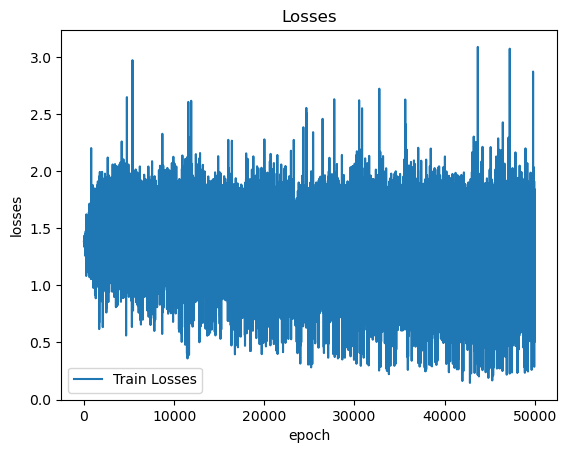



              precision    recall  f1-score   support

           0       0.37      0.24      0.29       611
           1       0.32      0.57      0.41       651
           2       0.30      0.02      0.04       568
           3       0.41      0.57      0.47       609

    accuracy                           0.36      2439
   macro avg       0.35      0.35      0.30      2439
weighted avg       0.35      0.36      0.31      2439





C:\Users\user\anaconda3\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Training with lr=0.005, gm=sto, mom=0, init=xavier
Loss at iteration 0 1.2597340861548876
Loss at iteration 5000 1.4655046037323998
Loss at iteration 10000 1.1265282364550535
Loss at iteration 15000 1.291400072309975
Loss at iteration 20000 1.3622980874048731
Loss at iteration 25000 1.4892919462617917
Loss at iteration 30000 1.354364276630035
Loss at iteration 35000 1.2299894889185048
Loss at iteration 40000 1.4947464672310584
Loss at iteration 45000 1.36820834705298
time taken: 2.3372058868408203


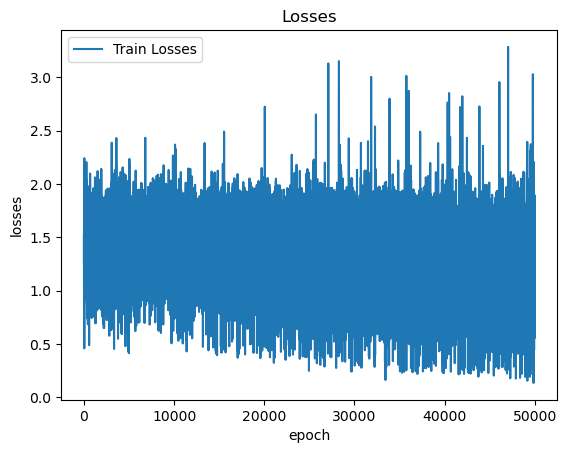



              precision    recall  f1-score   support

           0       0.36      0.20      0.26       611
           1       0.32      0.67      0.44       651
           2       1.00      0.00      0.00       568
           3       0.44      0.55      0.49       609

    accuracy                           0.36      2439
   macro avg       0.53      0.35      0.29      2439
weighted avg       0.52      0.36      0.30      2439



Training with lr=0.005, gm=mini, mom=0, init=zeros
Loss at iteration 0 1.3862943607198903
Loss at iteration 5000 1.2408536132939352
Loss at iteration 10000 1.2508738897859264
Loss at iteration 15000 1.2739218722932715
Loss at iteration 20000 1.2598805492425567
Loss at iteration 25000 1.2667928173139105
Loss at iteration 30000 1.2555151952281358
Loss at iteration 35000 1.2534412055711506
Loss at iteration 40000 1.281929608531383
Loss at iteration 45000 1.2466801497327946
time taken: 3.44868803024292


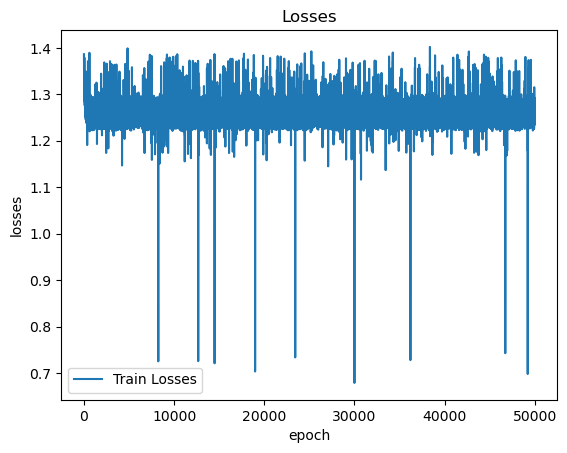



              precision    recall  f1-score   support

           0       0.41      0.34      0.37       611
           1       0.34      0.63      0.45       651
           2       1.00      0.00      0.00       568
           3       0.46      0.56      0.50       609

    accuracy                           0.39      2439
   macro avg       0.55      0.38      0.33      2439
weighted avg       0.54      0.39      0.34      2439



Training with lr=0.005, gm=mini, mom=0, init=xavier
Loss at iteration 0 1.6204437472419313
Loss at iteration 5000 1.2477047679149358
Loss at iteration 10000 1.2396134252591833
Loss at iteration 15000 1.2652495937254857
Loss at iteration 20000 1.2559868355280313
Loss at iteration 25000 1.2576405426453212
Loss at iteration 30000 1.258610232275988
Loss at iteration 35000 1.2307985216459536
Loss at iteration 40000 1.2543652129906724
Loss at iteration 45000 1.2398656805616166
time taken: 3.4947187900543213


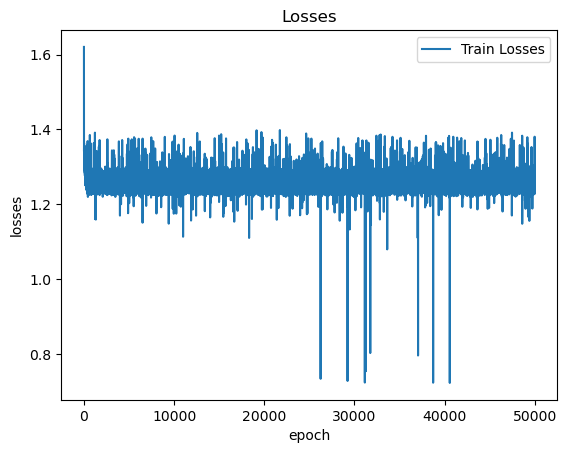



              precision    recall  f1-score   support

           0       0.38      0.41      0.39       611
           1       0.42      0.38      0.40       651
           2       0.29      0.21      0.25       568
           3       0.45      0.56      0.50       609

    accuracy                           0.39      2439
   macro avg       0.38      0.39      0.38      2439
weighted avg       0.39      0.39      0.39      2439



Training with lr=0.005, gm=batch, mom=0, init=zeros
Loss at iteration 0 1.3862943607198903
Loss at iteration 10000 4.244396516550371
Loss at iteration 20000 4.086617376498902
Loss at iteration 30000 3.2272904285638995
Loss at iteration 40000 4.949376761412736
time taken: 24.20592999458313


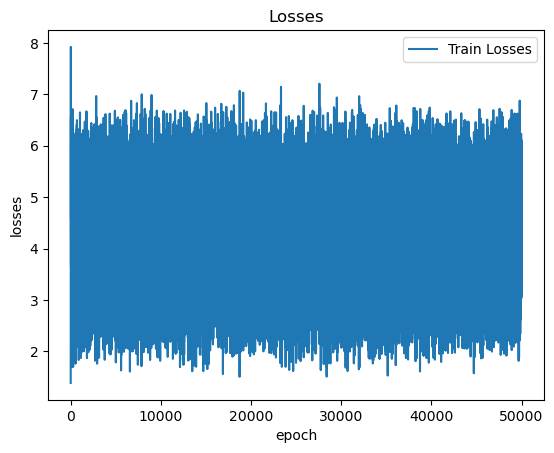



              precision    recall  f1-score   support

           0       0.45      0.09      0.15       611
           1       0.50      0.00      0.00       651
           2       0.26      0.82      0.40       568
           3       0.52      0.48      0.50       609

    accuracy                           0.33      2439
   macro avg       0.44      0.35      0.26      2439
weighted avg       0.44      0.33      0.26      2439



Training with lr=0.005, gm=batch, mom=0, init=xavier
Loss at iteration 0 1.4392099640523857
Loss at iteration 10000 4.55070631241314
Loss at iteration 20000 5.7020693230316555
Loss at iteration 30000 4.445902982998389
Loss at iteration 40000 6.05770852168054
time taken: 24.105740785598755


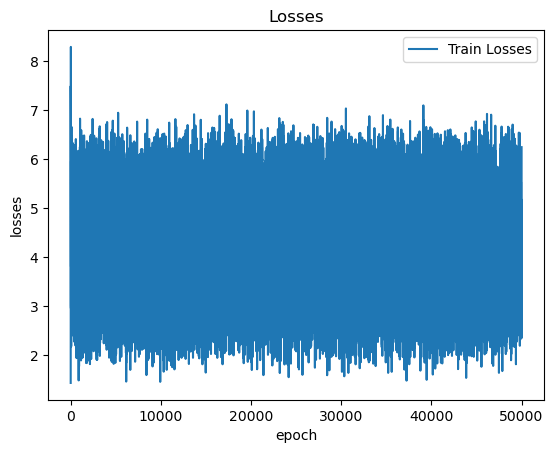



              precision    recall  f1-score   support

           0       0.28      0.37      0.32       611
           1       0.30      0.73      0.43       651
           2       1.00      0.00      0.00       568
           3       0.68      0.05      0.09       609

    accuracy                           0.30      2439
   macro avg       0.57      0.29      0.21      2439
weighted avg       0.55      0.30      0.22      2439



Training with lr=0.0005, gm=sto, mom=0, init=zeros
Loss at iteration 0 1.3862943607198905
Loss at iteration 5000 1.501165685784827
Loss at iteration 10000 1.0608484819938202
Loss at iteration 15000 1.243872370903285
Loss at iteration 20000 1.4329753654257567
Loss at iteration 25000 1.7737493269674343
Loss at iteration 30000 1.5611705155354847
Loss at iteration 35000 1.5947450636438008
Loss at iteration 40000 1.310998604764654
Loss at iteration 45000 1.3789019846155521
time taken: 2.314004898071289


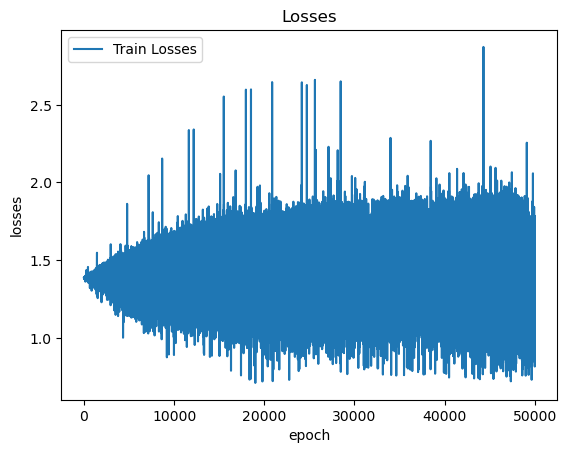



              precision    recall  f1-score   support

           0       0.67      0.00      0.01       611
           1       0.33      0.54      0.41       651
           2       0.00      0.00      1.00       568
           3       0.31      0.70      0.43       609

    accuracy                           0.32      2439
   macro avg       0.33      0.31      0.46      2439
weighted avg       0.33      0.32      0.45      2439



Training with lr=0.0005, gm=sto, mom=0, init=xavier
Loss at iteration 0 1.2598668010009824
Loss at iteration 5000 1.4661505530253587
Loss at iteration 10000 1.2869796150638728
Loss at iteration 15000 1.6026270427702647
Loss at iteration 20000 1.7941312574954928
Loss at iteration 25000 1.2586674147979102
Loss at iteration 30000 1.749865651542726
Loss at iteration 35000 1.5128033681456625
Loss at iteration 40000 1.056158933651839
Loss at iteration 45000 1.1860336906737097
time taken: 2.2571215629577637


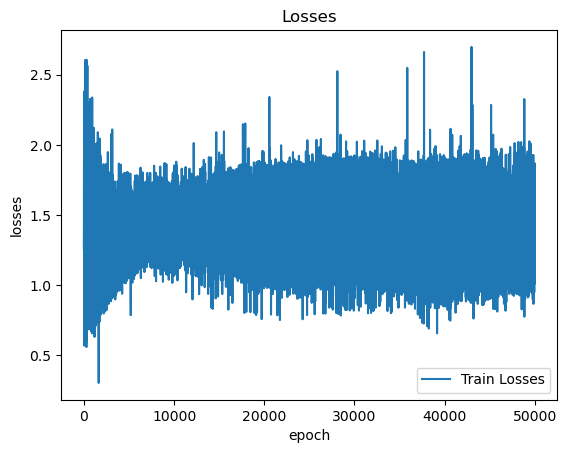



              precision    recall  f1-score   support

           0       0.67      0.00      0.01       611
           1       0.22      0.16      0.19       651
           2       0.21      0.14      0.17       568
           3       0.27      0.69      0.38       609

    accuracy                           0.25      2439
   macro avg       0.34      0.25      0.19      2439
weighted avg       0.34      0.25      0.19      2439



Training with lr=0.0005, gm=mini, mom=0, init=zeros
Loss at iteration 0 1.3862943607198903
Loss at iteration 5000 1.278722239637721
Loss at iteration 10000 1.2652410988765883
Loss at iteration 15000 1.2439096028570569
Loss at iteration 20000 1.2760000649462657
Loss at iteration 25000 1.2431981789305846
Loss at iteration 30000 1.2442902237446052
Loss at iteration 35000 1.2978294147503706
Loss at iteration 40000 1.23050966795767
Loss at iteration 45000 1.2504807795315416
time taken: 3.4520180225372314


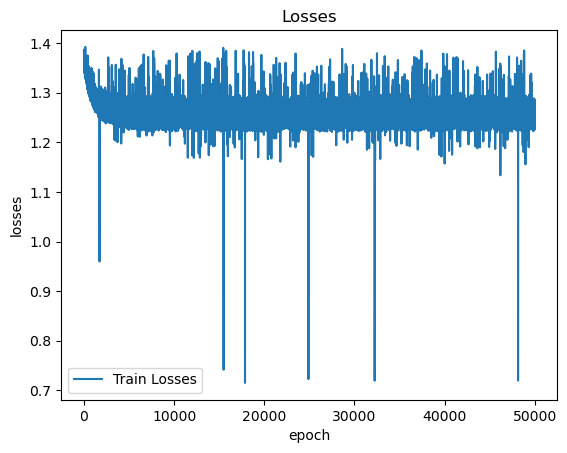



              precision    recall  f1-score   support

           0       0.39      0.37      0.38       611
           1       0.39      0.51      0.45       651
           2       0.27      0.12      0.16       568
           3       0.45      0.56      0.50       609

    accuracy                           0.40      2439
   macro avg       0.37      0.39      0.37      2439
weighted avg       0.38      0.40      0.38      2439



Training with lr=0.0005, gm=mini, mom=0, init=xavier
Loss at iteration 0 1.4685529870866956
Loss at iteration 5000 1.250349221020795
Loss at iteration 10000 1.2789538469883515
Loss at iteration 15000 1.277816970894879
Loss at iteration 20000 1.2804400881074716
Loss at iteration 25000 1.2699594212761662
Loss at iteration 30000 1.2577233071255518
Loss at iteration 35000 1.2538240126994717
Loss at iteration 40000 1.2826721147294027
Loss at iteration 45000 1.2477424402152333
time taken: 3.4496209621429443


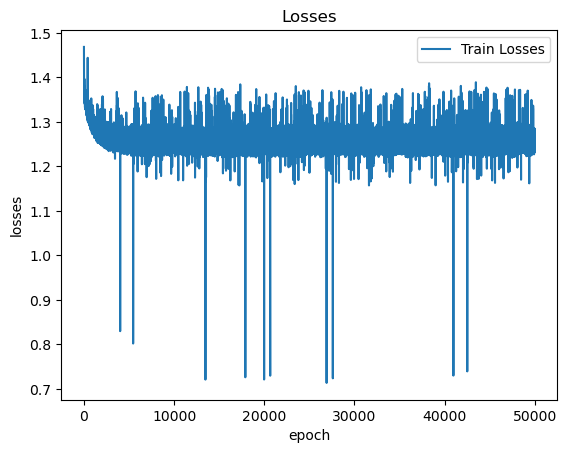



              precision    recall  f1-score   support

           0       0.42      0.31      0.36       611
           1       0.36      0.59      0.45       651
           2       0.24      0.07      0.11       568
           3       0.44      0.56      0.49       609

    accuracy                           0.39      2439
   macro avg       0.37      0.38      0.35      2439
weighted avg       0.37      0.39      0.36      2439



Training with lr=0.0005, gm=batch, mom=0, init=zeros
Loss at iteration 0 1.3862943607198903
Loss at iteration 10000 1.2573732589159983
Loss at iteration 20000 1.2573732589159985
Loss at iteration 30000 1.2573732589159985
Loss at iteration 40000 1.2573732589159985
time taken: 23.477967023849487


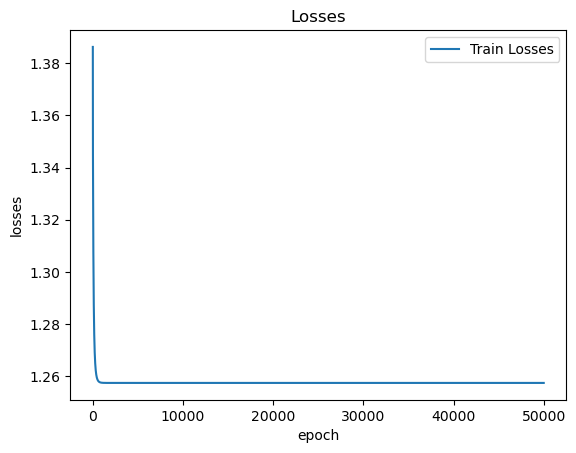



              precision    recall  f1-score   support

           0       0.41      0.33      0.36       611
           1       0.38      0.55      0.45       651
           2       0.27      0.11      0.15       568
           3       0.44      0.56      0.50       609

    accuracy                           0.39      2439
   macro avg       0.37      0.39      0.36      2439
weighted avg       0.38      0.39      0.37      2439



Training with lr=0.0005, gm=batch, mom=0, init=xavier
Loss at iteration 0 1.4792002745274733
Loss at iteration 10000 1.2573732589159983
Loss at iteration 20000 1.2573732589159985
Loss at iteration 30000 1.2573732589159985
Loss at iteration 40000 1.2573732589159985
time taken: 24.27752709388733


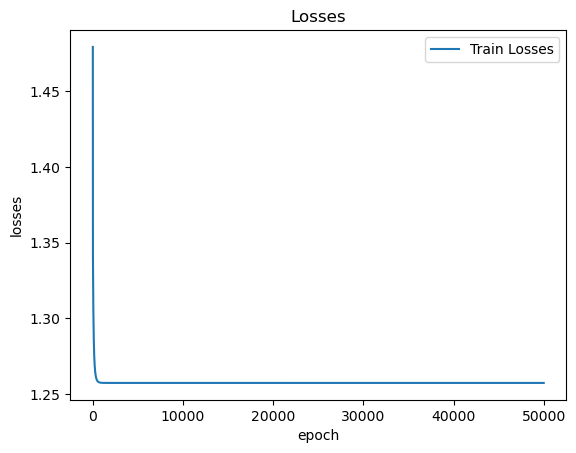



              precision    recall  f1-score   support

           0       0.41      0.33      0.36       611
           1       0.38      0.55      0.45       651
           2       0.27      0.11      0.15       568
           3       0.44      0.56      0.50       609

    accuracy                           0.39      2439
   macro avg       0.37      0.39      0.36      2439
weighted avg       0.38      0.39      0.37      2439





In [61]:
# Define your parameter sets
#learning_rates = [0.003, 0.0003]
learning_rates = [0.005, 0.0005]
gradient_methods = ['sto', 'mini', 'batch']
#gradient_methods = ['sto']
#momentums = [0, 0.9]
momentums = [0]
initializations = ['zeros', 'xavier']
#initializations = ['zeros']

# Iterate over all parameter combinations
for lr in learning_rates:
    for gm in gradient_methods:
        for mom in momentums:
            for init in initializations:

                # Start MLflow run
                with mlflow.start_run(run_name=f"MultinomialRegression_lr={lr}_gm={gm}_mom={mom}_init={init}"):
                    
                    # Log parameters
                    mlflow.log_param("learning_rate", lr)
                    mlflow.log_param("gradient_method", gm)
                    mlflow.log_param("momentum", mom)
                    mlflow.log_param("initialization", init)
                    
                    print(f"Training with lr={lr}, gm={gm}, mom={mom}, init={init}")
                    
                    # I'm assuming the constructor arguments based on your snippet. Adjust as needed.
                    model = LogisticRegression(4, X_train.shape[1], gm,lr,50000, False, 0, mom, init)
                    model.fit(X_train, y_train_encoded)
                    yhat = model.predict(X_test)
                    model.plot()

                    # Log classification report
                    report_dict = classification_report(y_test_label, yhat,output_dict=True, zero_division=1)
                    report = classification_report(y_test_label, yhat,zero_division=1)
                    print(f"\n\n{report}\n\n")
                    print("============================================================================================")

                    for label, metrics in report_dict.items():
                        if isinstance(metrics, dict):  # Ensure 'metrics' is a dictionary
                            for metric_name, metric_value in metrics.items():
                                # Construct a metric name based on the label and the metric
                                mlflow.log_metric(f"{label}_{metric_name}", metric_value)

                    # Log the model to MLflow
                    mlflow.sklearn.log_model(model, artifact_path=f"model_lr={lr}_gm={gm}_mom={mom}_init={init}")

In [62]:
# classification Report

model.classificationReport(y_test_label,yhat)

precision    recall  f1-score support
0              0.407708  0.328969  0.364130     611
1              0.376720  0.546851  0.446115     651
2              0.269912  0.107394  0.153652     568
3              0.442581  0.563218  0.495665     609
weighted avg   0.376054  0.394014  0.369840    2439
macro avg      0.374230  0.386608  0.364891      NA

**Confusion Matrix**

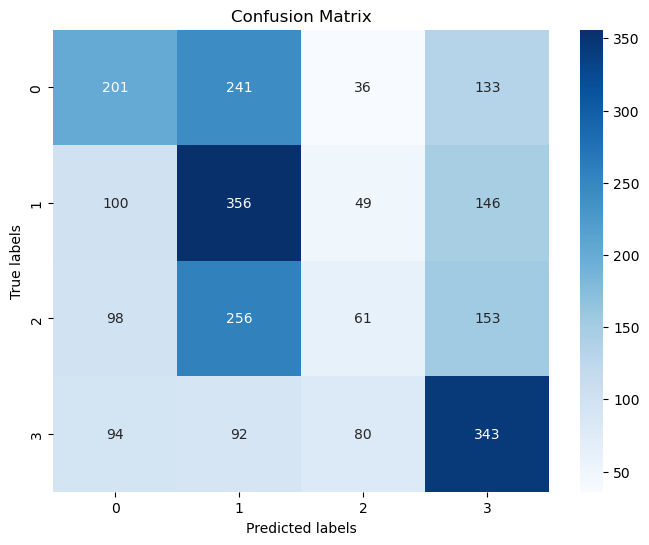

In [63]:
model.confusion_plot(y_test_label,yhat)

The confusion matrix you provided gives a visual representation of the performance of a classification model. Here are a few conclusions we can derive from the matrix:

1. Diagonal Values: The diagonal values represent correctly classified instances. The highest value on the diagonal is 356, which indicates that label 1 has the most number of instances that were correctly predicted.

2. Misclassifications: There are off-diagonal values that represent misclassifications. For instance, for true label 0, 241 instances were misclassified as label 1. Similarly, for true label 1, 146 instances were misclassified as label 3.

3. Class 3 Strength: Label 3 seems to be the most correctly predicted among all classes with 343 instances correctly classified.

4. Class 2 Weakness: Label 2 has a widespread of misclassifications with 98 instances misclassified as label 0, 256 as label 1, and 153 as label 3. This might indicate that the classifier struggles a bit with this class.

Overall: There are several misclassifications for each class, suggesting that there might be room for improvement in the classification model. Fine-tuning, feature engineering, or even trying a different algorithm might help improve the model's performance.

**Scatter plot for classifying result**

In this scatter plot, we will create a scatter plot of each paired feature and label each data point as either correctly classified or misclassified denoted as red-x symbol and green circle symbol. As a result, we can explicitly see how good our alogrithm classifies.

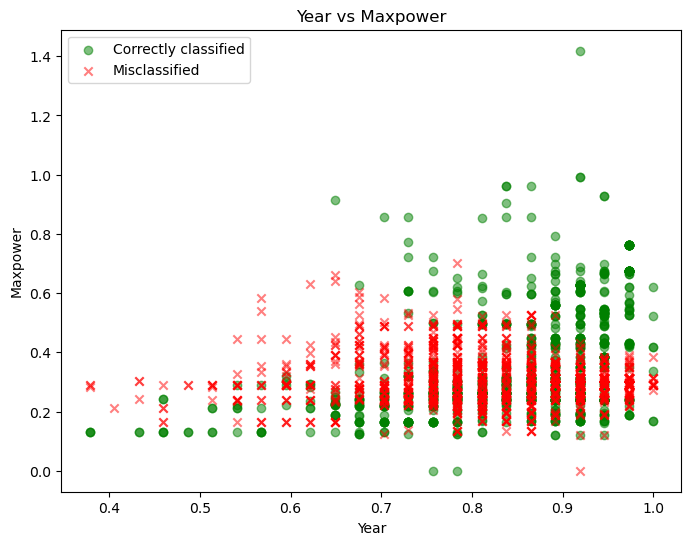

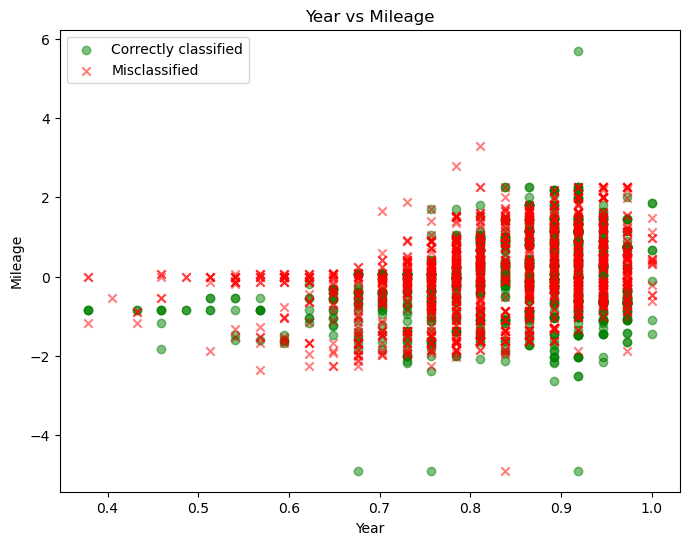

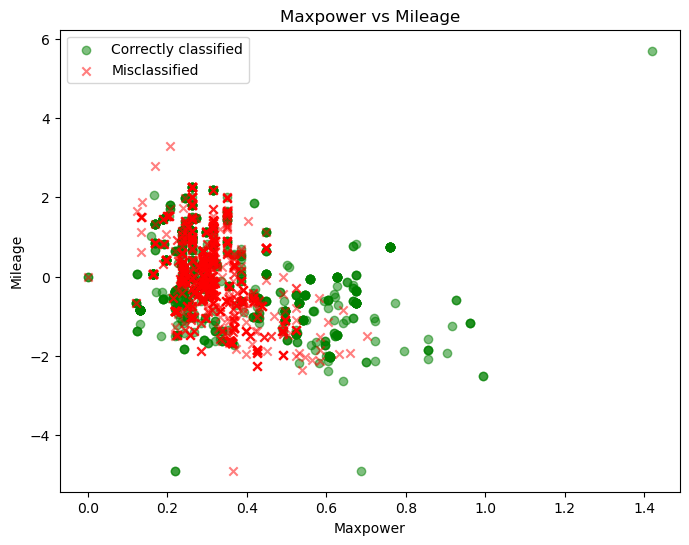

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Transrming X_test into a DataFrame and assign it to data variable
data = pd.DataFrame(X_test.copy())

# Add true labels and predicted labels to the data
data['y_true'] = y_test_label
data['y_pred'] = yhat

# Create a new column to indicate whether the prediction was correct or not
data['correct'] = data['y_true'] == data['y_pred']

# Number of features
n_features = X_test.shape[1]
features = pd.DataFrame(X_test).columns

# Dictionary for custom feature names
dict_feature = {0:"Year", 1:"Maxpower", 2:"Mileage"}

# Plot
for i in range(n_features):
    for j in range(i+1, n_features):
        plt.figure(figsize=(8, 6))
        
        # Plot correctly classified points in green
        correct_subset = data[data['correct']]
        plt.scatter(correct_subset[i], correct_subset[j], 
                    c='green',
                    marker='o', 
                    label='Correctly classified',
                    alpha=0.5)
            
        # Plot misclassified points in red
        wrong_subset = data[~data['correct']]
        plt.scatter(wrong_subset[i], wrong_subset[j], 
                    c='red',
                    marker='x', 
                    label='Misclassified',
                    alpha=0.5)

        plt.title(f'{dict_feature[i]} vs {dict_feature[j]}')
        plt.xlabel(dict_feature[i])
        plt.ylabel(dict_feature[j])
        plt.legend()
        plt.show()

**Overall Conclusion:**

The classifier seems to perform better when classifying based on their Maxpower and Mileage, since correctly classified data points seems to be dominant. However, the classifier still unbeats the complexity of the data.
To improve the model's accuracy, one might consider feature engineering, using a more complex model, or gathering additional features that could help in distinguishing the classes.

**Scatter plot for comparing truth labels and predicted label** 

In this scatter plot, we will create a scatter plot of each paired feature and label each data point according to its corresponding one of the four labels denoted by 4 different colours. Each plot is compared by the same plot of that is labelled by its corresponding predicted label.  As a result, we can explicitly see how good our alogrithm classifies with respect to the true label.

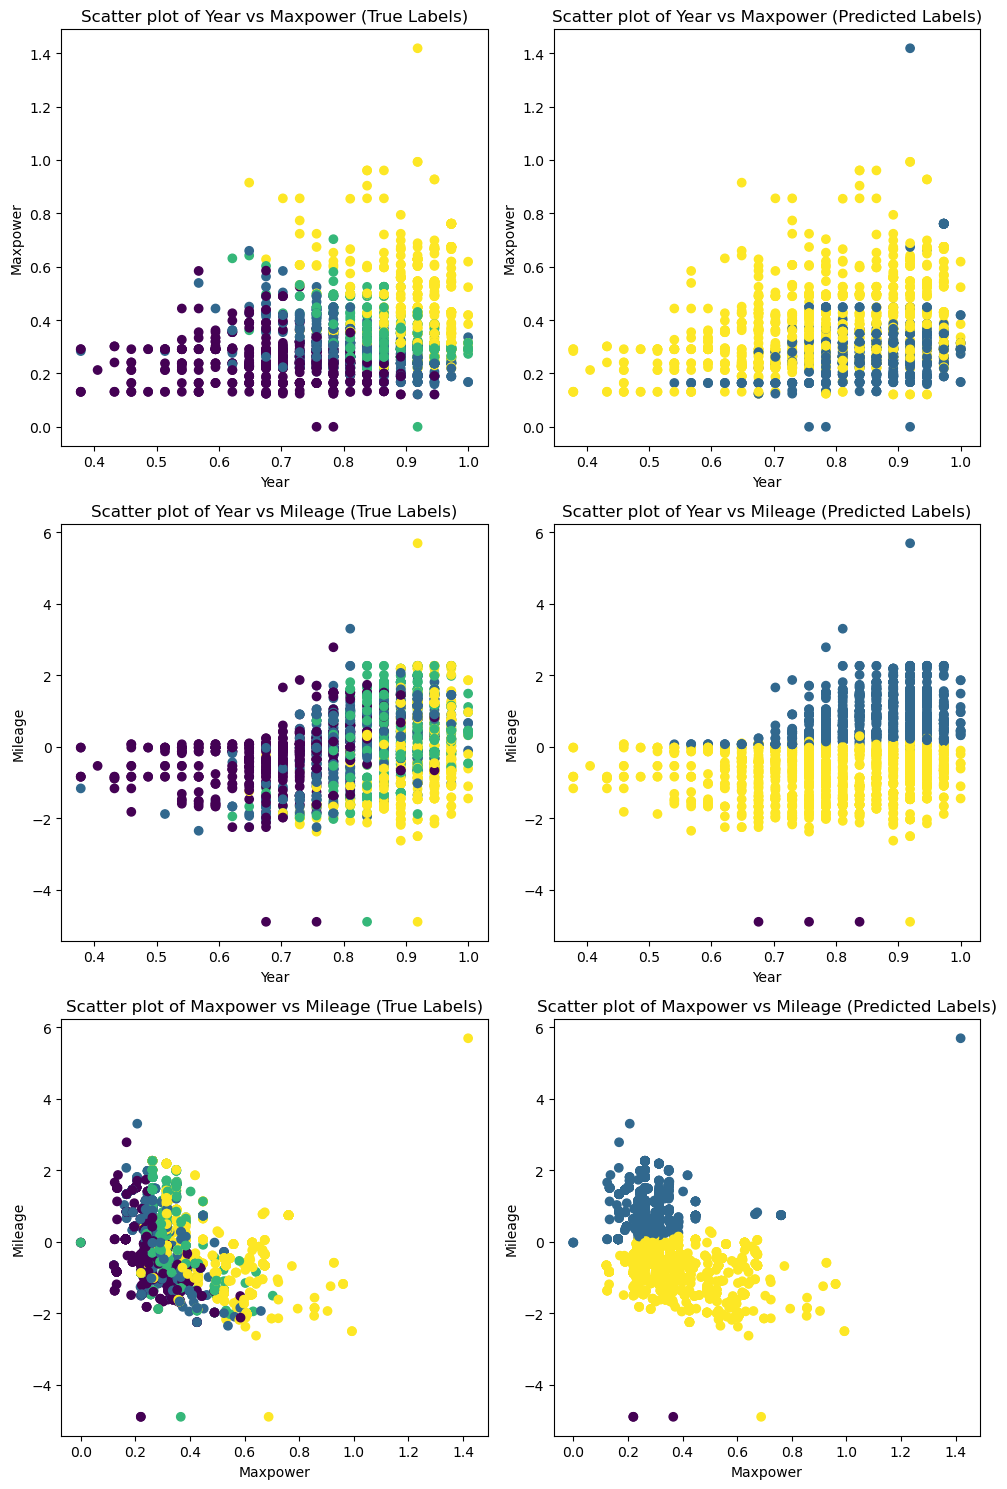

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_test is already a DataFrame
data = pd.DataFrame(X_test.copy())

# Add true labels and predicted labels to the data
data['y_true'] = y_test_label
data['y_pred'] = yhat

# Create a new column to indicate whether the prediction was correct or not
data['correct'] = data['y_true'] == data['y_pred']

Features = data[[0, 1, 2]].columns
dict_feature = {0:"Year", 1:"Maxpower", 2:"Mileage"}

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 15))  # 3x2 grid

combinations = [(0, 1), (0, 2), (1, 2)]

for i, (x, y) in enumerate(combinations):
    # Plot for true labels
    axes[i, 0].scatter(data[Features[x]], data[Features[y]], c=data['y_true'], cmap='viridis')
    axes[i, 0].set_xlabel(dict_feature[x])
    axes[i, 0].set_ylabel(dict_feature[y])
    axes[i, 0].set_title(f'Scatter plot of {dict_feature[x]} vs {dict_feature[y]} (True Labels)')
    
    # Plot for predicted labels
    axes[i, 1].scatter(data[Features[x]], data[Features[y]], c=data['y_pred'], cmap='viridis')
    axes[i, 1].set_xlabel(dict_feature[x])
    axes[i, 1].set_ylabel(dict_feature[y])
    axes[i, 1].set_title(f'Scatter plot of {dict_feature[x]} vs {dict_feature[y]} (Predicted Labels)')

plt.tight_layout()
plt.show()

**Overall Conclusion:**

The prediction model seems to have a reasonable grasp of the underlying patterns and relationships present in the true data. However, there are evident discrepancies in the spread and density of the predicted data points, indicating potential areas for model improvement. Fine-tuning the model or incorporating additional features could enhance the precision and accuracy of predictions.

**Ridge Multinomial Logistic Regression**

Training with lr=0.005, gm=sto, mom=0, init=zeros
Loss at iteration 0: 1.3862943607198905


C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in square
  import sys
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:116: RuntimeWarning: invalid value encountered in subtract


Loss at iteration 5000: nan
Loss at iteration 10000: nan
Loss at iteration 15000: nan
Loss at iteration 20000: nan
Loss at iteration 25000: nan
Loss at iteration 30000: nan
Loss at iteration 35000: nan
Loss at iteration 40000: nan
Loss at iteration 45000: nan
Time taken: 13.497137546539307


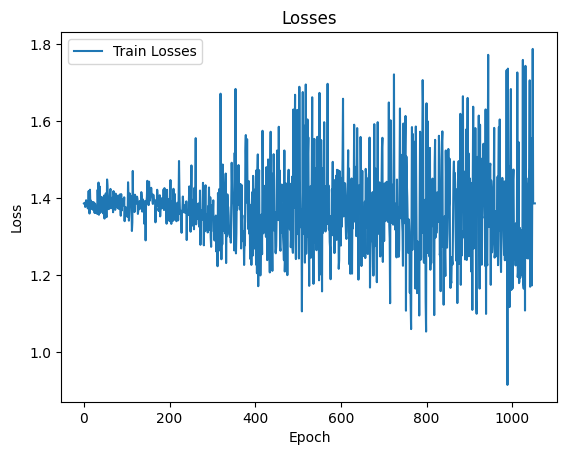



              precision    recall  f1-score   support

           0       0.25      1.00      0.40       611
           1       1.00      0.00      0.00       651
           2       1.00      0.00      0.00       568
           3       1.00      0.00      0.00       609

    accuracy                           0.25      2439
   macro avg       0.81      0.25      0.10      2439
weighted avg       0.81      0.25      0.10      2439



Training with lr=0.005, gm=sto, mom=0, init=xavier
Loss at iteration 0: 1.0490893197849693


C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in square
  import sys
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in matmul


Loss at iteration 5000: nan
Loss at iteration 10000: nan
Loss at iteration 15000: nan
Loss at iteration 20000: nan
Loss at iteration 25000: nan
Loss at iteration 30000: nan
Loss at iteration 35000: nan
Loss at iteration 40000: nan
Loss at iteration 45000: nan
Time taken: 13.299095869064331


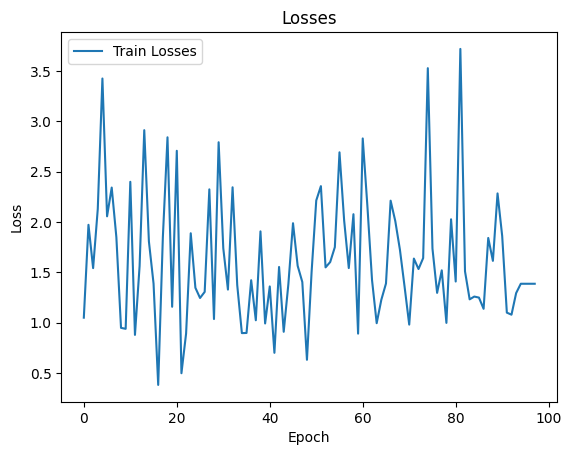



              precision    recall  f1-score   support

           0       0.25      1.00      0.40       611
           1       1.00      0.00      0.00       651
           2       1.00      0.00      0.00       568
           3       1.00      0.00      0.00       609

    accuracy                           0.25      2439
   macro avg       0.81      0.25      0.10      2439
weighted avg       0.81      0.25      0.10      2439



Training with lr=0.005, gm=mini, mom=0, init=zeros
Loss at iteration 0: 1.3862943607198903


C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in square
  import sys
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in matmul
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:116: RuntimeWarning: invalid value encountered in subtract


Loss at iteration 5000: nan
Loss at iteration 10000: nan
Loss at iteration 15000: nan
Loss at iteration 20000: nan
Loss at iteration 25000: nan
Loss at iteration 30000: nan
Loss at iteration 35000: nan
Loss at iteration 40000: nan
Loss at iteration 45000: nan
Time taken: 8.089020252227783


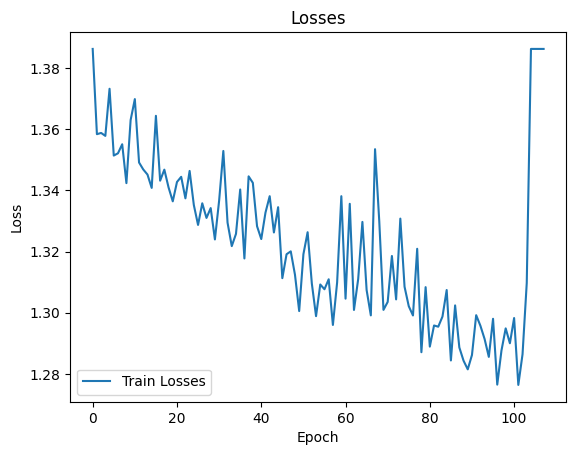



              precision    recall  f1-score   support

           0       0.25      1.00      0.40       611
           1       1.00      0.00      0.00       651
           2       1.00      0.00      0.00       568
           3       1.00      0.00      0.00       609

    accuracy                           0.25      2439
   macro avg       0.81      0.25      0.10      2439
weighted avg       0.81      0.25      0.10      2439



Training with lr=0.005, gm=mini, mom=0, init=xavier
Loss at iteration 0: 1.521905453597579


C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in square
  import sys
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in matmul
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:116: RuntimeWarning: invalid value encountered in subtract


Loss at iteration 5000: nan
Loss at iteration 10000: nan
Loss at iteration 15000: nan
Loss at iteration 20000: nan
Loss at iteration 25000: nan
Loss at iteration 30000: nan
Loss at iteration 35000: nan
Loss at iteration 40000: nan
Loss at iteration 45000: nan
Time taken: 8.110368728637695


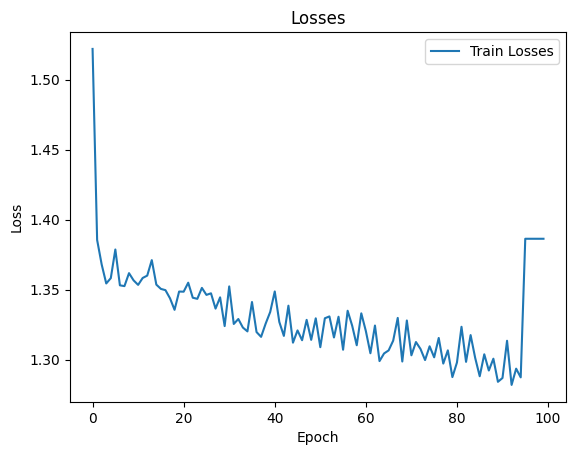



              precision    recall  f1-score   support

           0       0.25      1.00      0.40       611
           1       1.00      0.00      0.00       651
           2       1.00      0.00      0.00       568
           3       1.00      0.00      0.00       609

    accuracy                           0.25      2439
   macro avg       0.81      0.25      0.10      2439
weighted avg       0.81      0.25      0.10      2439



Training with lr=0.005, gm=batch, mom=0, init=zeros
Loss at iteration 0: 1.3862943607198903
Values too close to zero encountered in softmax output.
Values too close to zero encountered in softmax output.
Values too close to zero encountered in softmax output.
Values too close to zero encountered in softmax output.
Values too close to zero encountered in softmax output.
Values too close to zero encountered in softmax output.
Values too close to zero encountered in softmax output.
Values too close to zero encountered in softmax output.
Values too close to z

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in square
  import sys
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in matmul
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:116: RuntimeWarning: invalid value encountered in subtract


Loss at iteration 10000: nan
Loss at iteration 20000: nan
Loss at iteration 30000: nan
Loss at iteration 40000: nan
Time taken: 55.946749210357666


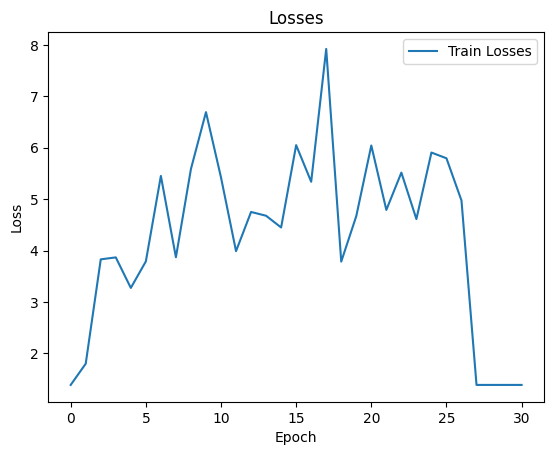



              precision    recall  f1-score   support

           0       0.25      1.00      0.40       611
           1       1.00      0.00      0.00       651
           2       1.00      0.00      0.00       568
           3       1.00      0.00      0.00       609

    accuracy                           0.25      2439
   macro avg       0.81      0.25      0.10      2439
weighted avg       0.81      0.25      0.10      2439



Training with lr=0.005, gm=batch, mom=0, init=xavier
Loss at iteration 0: 1.5636992184605207
Values too close to zero encountered in softmax output.
Values too close to zero encountered in softmax output.
Values too close to zero encountered in softmax output.
Values too close to zero encountered in softmax output.
Values too close to zero encountered in softmax output.
Values too close to zero encountered in softmax output.
Values too close to zero encountered in softmax output.
Values too close to zero encountered in softmax output.
Values too close to 

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in square
  import sys
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in matmul
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:116: RuntimeWarning: invalid value encountered in subtract


Loss at iteration 10000: nan
Loss at iteration 20000: nan
Loss at iteration 30000: nan
Loss at iteration 40000: nan
Time taken: 55.271737575531006


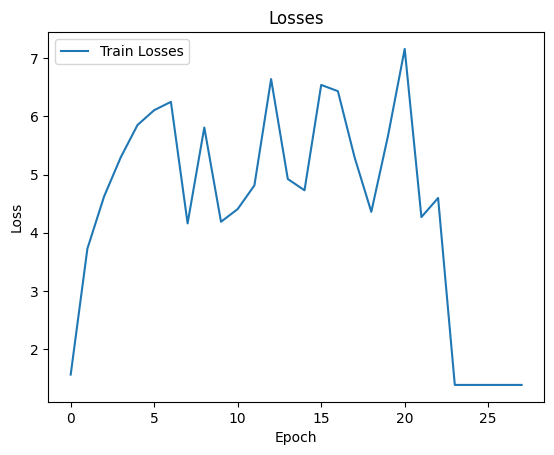



              precision    recall  f1-score   support

           0       0.25      1.00      0.40       611
           1       1.00      0.00      0.00       651
           2       1.00      0.00      0.00       568
           3       1.00      0.00      0.00       609

    accuracy                           0.25      2439
   macro avg       0.81      0.25      0.10      2439
weighted avg       0.81      0.25      0.10      2439



Training with lr=0.0005, gm=sto, mom=0, init=zeros
Loss at iteration 0: 1.3862943607198905
Loss at iteration 5000: 1.4704710635825955
Loss at iteration 10000: 1.5047014674809167


C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in square
  import sys
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:116: RuntimeWarning: invalid value encountered in subtract


Loss at iteration 15000: nan
Loss at iteration 20000: nan
Loss at iteration 25000: nan
Loss at iteration 30000: nan
Loss at iteration 35000: nan
Loss at iteration 40000: nan
Loss at iteration 45000: nan
Time taken: 13.68668270111084


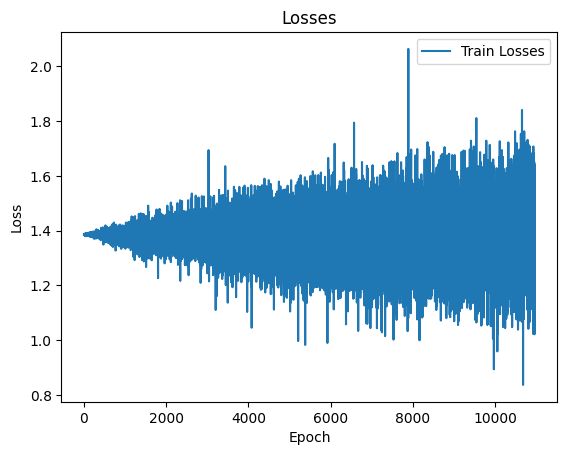



              precision    recall  f1-score   support

           0       0.25      1.00      0.40       611
           1       1.00      0.00      0.00       651
           2       1.00      0.00      0.00       568
           3       1.00      0.00      0.00       609

    accuracy                           0.25      2439
   macro avg       0.81      0.25      0.10      2439
weighted avg       0.81      0.25      0.10      2439



Training with lr=0.0005, gm=sto, mom=0, init=xavier
Loss at iteration 0: 1.1176997023402973


C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in square
  import sys
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in matmul


Loss at iteration 5000: nan
Loss at iteration 10000: nan
Loss at iteration 15000: nan
Loss at iteration 20000: nan
Loss at iteration 25000: nan
Loss at iteration 30000: nan
Loss at iteration 35000: nan
Loss at iteration 40000: nan
Loss at iteration 45000: nan
Time taken: 14.438769578933716


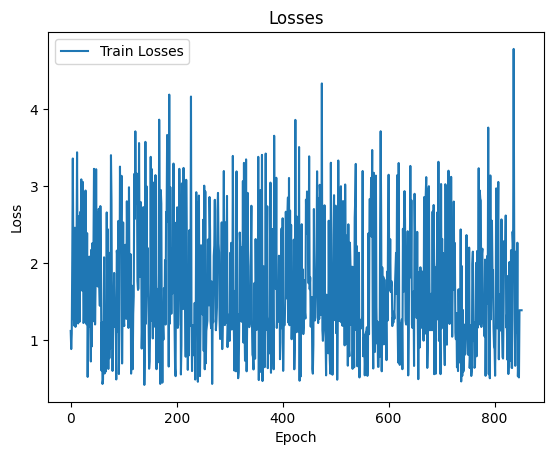



              precision    recall  f1-score   support

           0       0.25      1.00      0.40       611
           1       1.00      0.00      0.00       651
           2       1.00      0.00      0.00       568
           3       1.00      0.00      0.00       609

    accuracy                           0.25      2439
   macro avg       0.81      0.25      0.10      2439
weighted avg       0.81      0.25      0.10      2439



Training with lr=0.0005, gm=mini, mom=0, init=zeros
Loss at iteration 0: 1.3862943607198903


C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in square
  import sys
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in matmul
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:116: RuntimeWarning: invalid value encountered in subtract


Loss at iteration 5000: nan
Loss at iteration 10000: nan
Loss at iteration 15000: nan
Loss at iteration 20000: nan
Loss at iteration 25000: nan
Loss at iteration 30000: nan
Loss at iteration 35000: nan
Loss at iteration 40000: nan
Loss at iteration 45000: nan
Time taken: 7.929296970367432


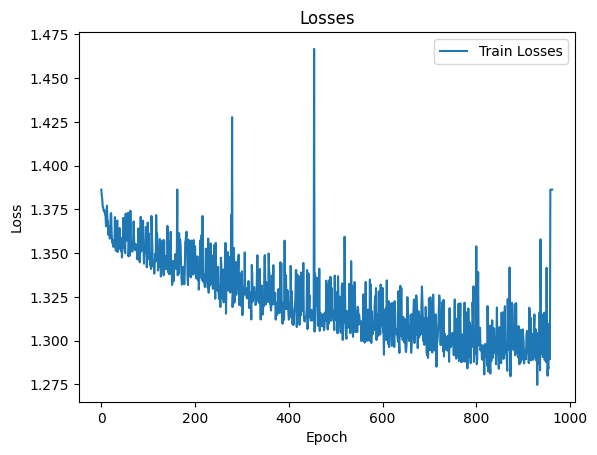



              precision    recall  f1-score   support

           0       0.25      1.00      0.40       611
           1       1.00      0.00      0.00       651
           2       1.00      0.00      0.00       568
           3       1.00      0.00      0.00       609

    accuracy                           0.25      2439
   macro avg       0.81      0.25      0.10      2439
weighted avg       0.81      0.25      0.10      2439



Training with lr=0.0005, gm=mini, mom=0, init=xavier
Loss at iteration 0: 1.7969325460124506


C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in square
  import sys
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in matmul
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:116: RuntimeWarning: invalid value encountered in subtract


Loss at iteration 5000: nan
Loss at iteration 10000: nan
Loss at iteration 15000: nan
Loss at iteration 20000: nan
Loss at iteration 25000: nan
Loss at iteration 30000: nan
Loss at iteration 35000: nan
Loss at iteration 40000: nan
Loss at iteration 45000: nan
Time taken: 7.909468650817871


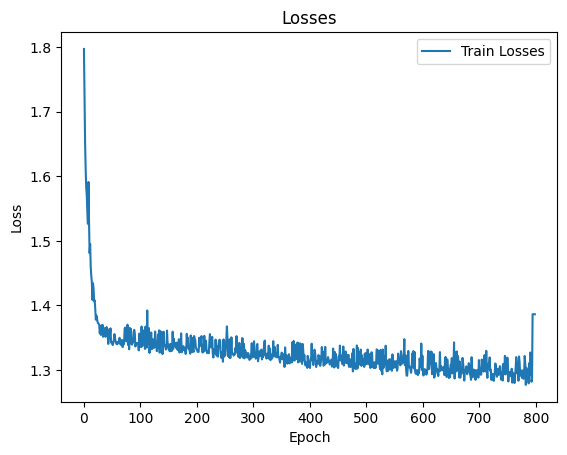



              precision    recall  f1-score   support

           0       0.25      1.00      0.40       611
           1       1.00      0.00      0.00       651
           2       1.00      0.00      0.00       568
           3       1.00      0.00      0.00       609

    accuracy                           0.25      2439
   macro avg       0.81      0.25      0.10      2439
weighted avg       0.81      0.25      0.10      2439



Training with lr=0.0005, gm=batch, mom=0, init=zeros
Loss at iteration 0: 1.3862943607198903


C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in square
  import sys
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in matmul
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:116: RuntimeWarning: invalid value encountered in subtract


Loss at iteration 10000: nan
Loss at iteration 20000: nan
Loss at iteration 30000: nan
Loss at iteration 40000: nan
Time taken: 55.837494134902954


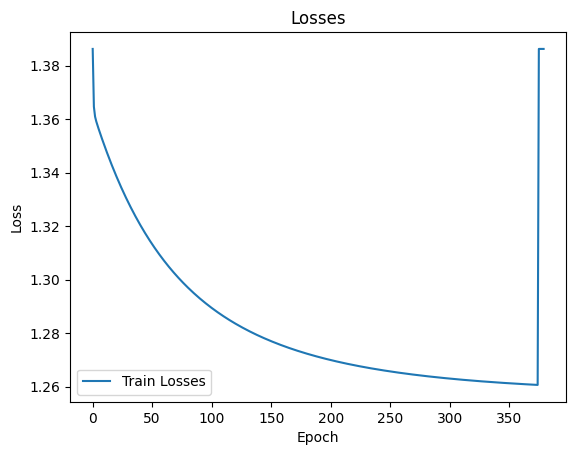



              precision    recall  f1-score   support

           0       0.25      1.00      0.40       611
           1       1.00      0.00      0.00       651
           2       1.00      0.00      0.00       568
           3       1.00      0.00      0.00       609

    accuracy                           0.25      2439
   macro avg       0.81      0.25      0.10      2439
weighted avg       0.81      0.25      0.10      2439



Training with lr=0.0005, gm=batch, mom=0, init=xavier
Loss at iteration 0: 1.6190460695875708


C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in square
  import sys
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in matmul
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:116: RuntimeWarning: invalid value encountered in subtract


Loss at iteration 10000: nan
Loss at iteration 20000: nan
Loss at iteration 30000: nan
Loss at iteration 40000: nan
Time taken: 55.629985332489014


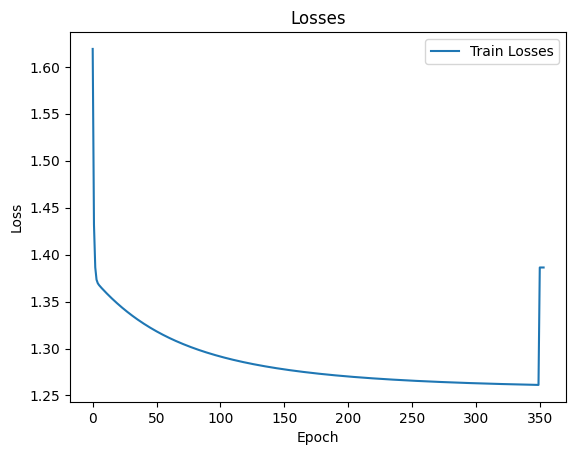



              precision    recall  f1-score   support

           0       0.25      1.00      0.40       611
           1       1.00      0.00      0.00       651
           2       1.00      0.00      0.00       568
           3       1.00      0.00      0.00       609

    accuracy                           0.25      2439
   macro avg       0.81      0.25      0.10      2439
weighted avg       0.81      0.25      0.10      2439





In [76]:
# Define your parameter sets
#learning_rates = [0.003, 0.0003]
learning_rates = [0.005, 0.0005]
gradient_methods = ['sto', 'mini', 'batch']
#gradient_methods = ['sto']
#momentums = [0, 0.9]
momentums = [0]
initializations = ['zeros', 'xavier']
#initializations = ['zeros']

# Iterate over all parameter combinations
for lr in learning_rates:
    for gm in gradient_methods:
        for mom in momentums:
            for init in initializations:

                # Start MLflow run
                with mlflow.start_run(run_name=f"RidgeRegression_lr={lr}_gm={gm}_mom={mom}_init={init}"):
                    
                    # Log parameters
                    mlflow.log_param("learning_rate", lr)
                    mlflow.log_param("gradient_method", gm)
                    mlflow.log_param("momentum", mom)
                    mlflow.log_param("initialization", init)
                    
                    print(f"Training with lr={lr}, gm={gm}, mom={mom}, init={init}")
                    
                    # I'm assuming the constructor arguments based on your snippet. Adjust as needed.
                    model_ridge = Ridge(4, X_train.shape[1], gm,lr,50000, True, 0.5, mom, init)
                    model_ridge.fit(X_train, y_train_encoded)
                    yhat_ridge = model_ridge.predict(X_test)
                    model_ridge.plot()

                    # Log classification report
                    report_dict = classification_report(y_test_label, yhat_ridge,output_dict=True, zero_division=1)
                    report = classification_report(y_test_label, yhat_ridge,zero_division=1)
                    print(f"\n\n{report}\n\n")
                    print("============================================================================================")

                    for label, metrics in report_dict.items():
                        if isinstance(metrics, dict):  # Ensure 'metrics' is a dictionary
                            for metric_name, metric_value in metrics.items():
                                # Construct a metric name based on the label and the metric
                                mlflow.log_metric(f"{label}_{metric_name}", metric_value)

                    # Log the model to MLflow
                    mlflow.sklearn.log_model(model_ridge, artifact_path=f"model_lr={lr}_gm={gm}_mom={mom}_init={init}")

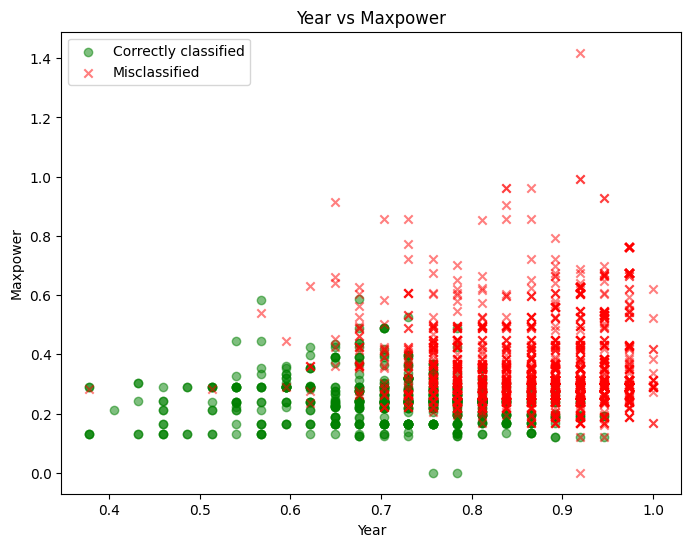

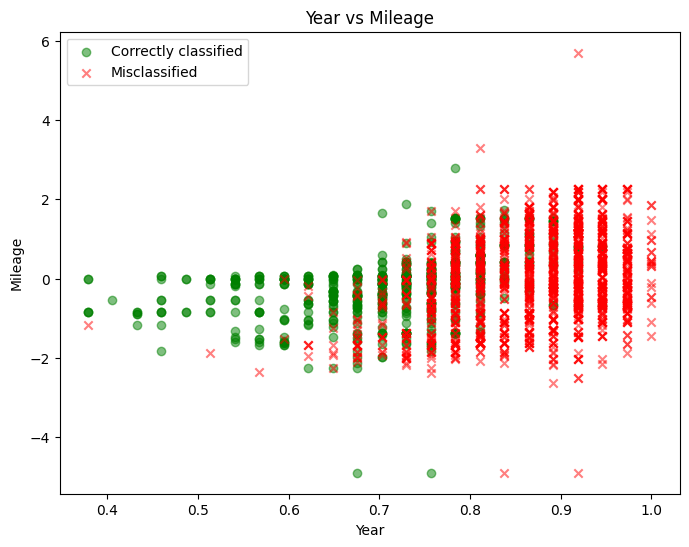

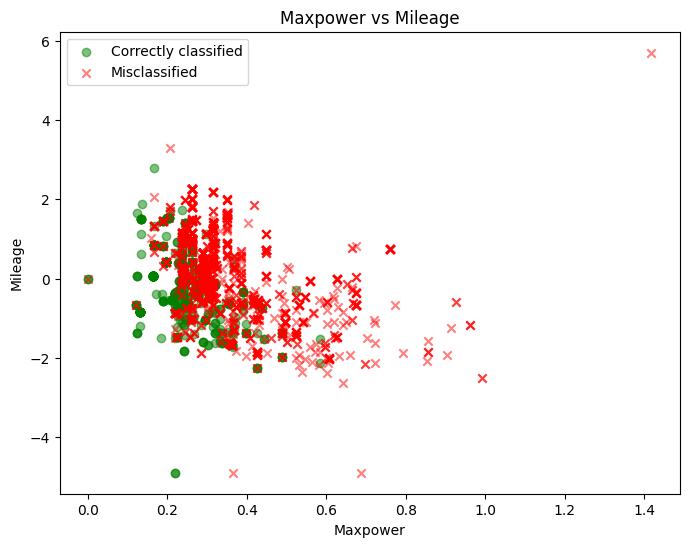

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Transrming X_test into a DataFrame and assign it to data variable
data = pd.DataFrame(X_test.copy())

# Add true labels and predicted labels to the data
data['y_true'] = y_test_label
data['y_pred'] = yhat_ridge

# Create a new column to indicate whether the prediction was correct or not
data['correct'] = data['y_true'] == data['y_pred']

# Number of features
n_features = X_test.shape[1]
features = pd.DataFrame(X_test).columns

# Dictionary for custom feature names
dict_feature = {0:"Year", 1:"Maxpower", 2:"Mileage"}

# Plot
for i in range(n_features):
    for j in range(i+1, n_features):
        plt.figure(figsize=(8, 6))
        
        # Plot correctly classified points in green
        correct_subset = data[data['correct']]
        plt.scatter(correct_subset[i], correct_subset[j], 
                    c='green',
                    marker='o', 
                    label='Correctly classified',
                    alpha=0.5)
            
        # Plot misclassified points in red
        wrong_subset = data[~data['correct']]
        plt.scatter(wrong_subset[i], wrong_subset[j], 
                    c='red',
                    marker='x', 
                    label='Misclassified',
                    alpha=0.5)

        plt.title(f'{dict_feature[i]} vs {dict_feature[j]}')
        plt.xlabel(dict_feature[i])
        plt.ylabel(dict_feature[j])
        plt.legend()
        plt.show()

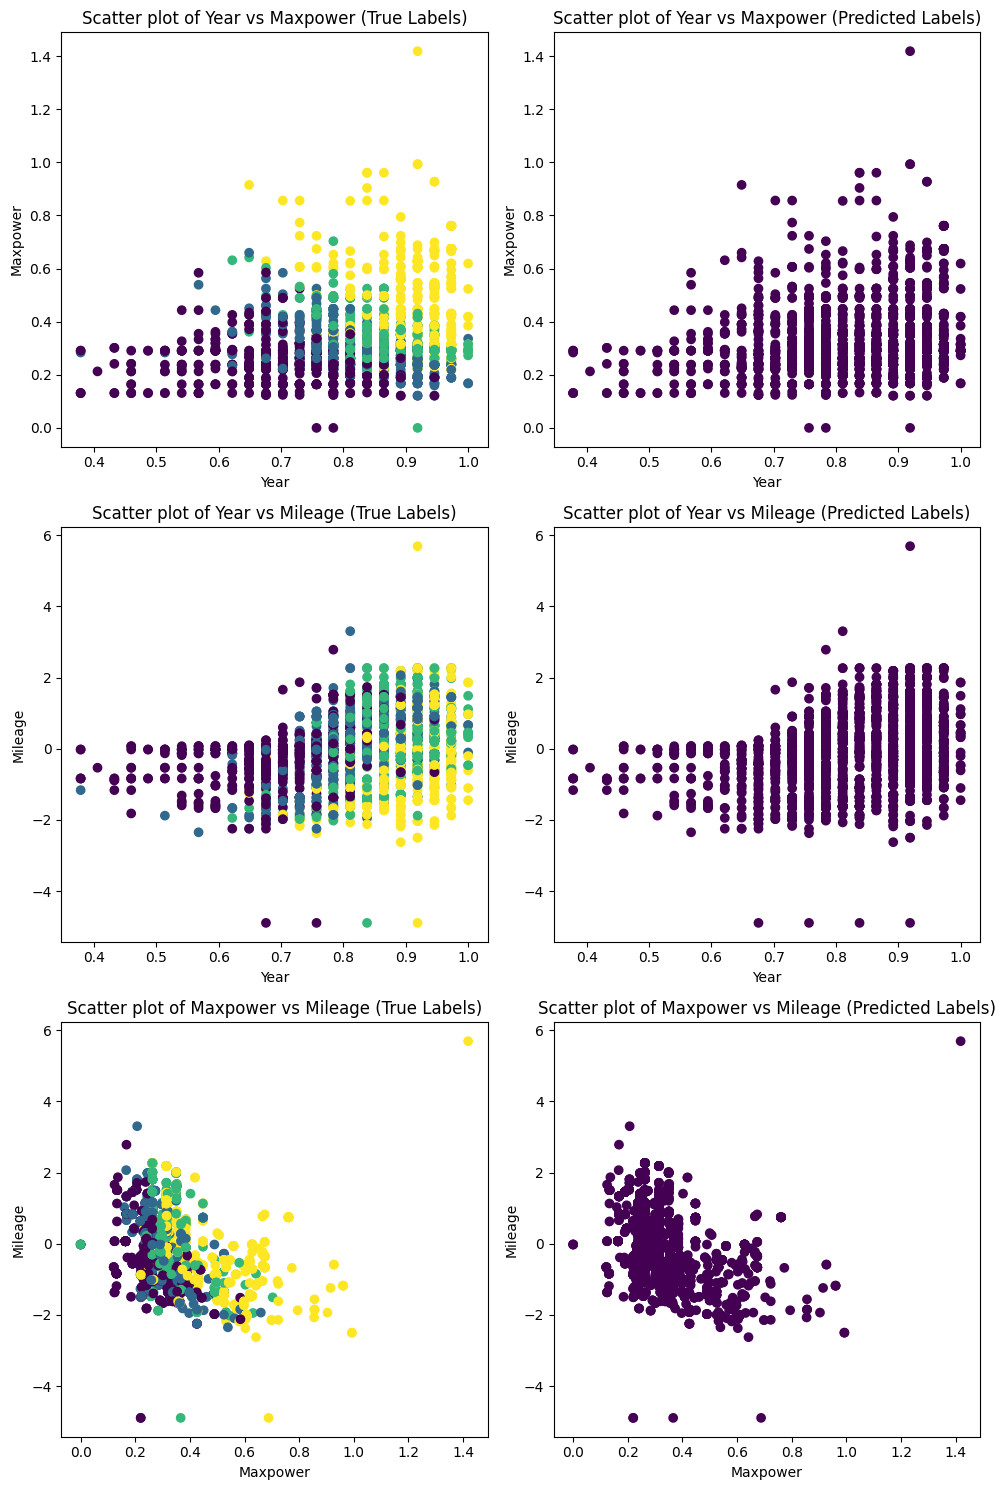

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_test is already a DataFrame
data = pd.DataFrame(X_test.copy())

# Add true labels and predicted labels to the data
data['y_true'] = y_test_label
data['y_pred'] = yhat_ridge

# Create a new column to indicate whether the prediction was correct or not
data['correct'] = data['y_true'] == data['y_pred']

Features = data[[0, 1, 2]].columns
dict_feature = {0:"Year", 1:"Maxpower", 2:"Mileage"}

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 15))  # 3x2 grid

combinations = [(0, 1), (0, 2), (1, 2)]

for i, (x, y) in enumerate(combinations):
    # Plot for true labels
    axes[i, 0].scatter(data[Features[x]], data[Features[y]], c=data['y_true'], cmap='viridis')
    axes[i, 0].set_xlabel(dict_feature[x])
    axes[i, 0].set_ylabel(dict_feature[y])
    axes[i, 0].set_title(f'Scatter plot of {dict_feature[x]} vs {dict_feature[y]} (True Labels)')
    
    # Plot for predicted labels
    axes[i, 1].scatter(data[Features[x]], data[Features[y]], c=data['y_pred'], cmap='viridis')
    axes[i, 1].set_xlabel(dict_feature[x])
    axes[i, 1].set_ylabel(dict_feature[y])
    axes[i, 1].set_title(f'Scatter plot of {dict_feature[x]} vs {dict_feature[y]} (Predicted Labels)')

plt.tight_layout()
plt.show()

**Using Gaussian Naive Bayes**

In this section, we will run an experiment using Gaussian Naive Bayes for classifying in order to gain more encouragement that our data is not linearly separable.

 Accuracy: 0.60
              precision    recall  f1-score   support

           0       0.81      0.66      0.73       611
           1       0.54      0.53      0.54       651
           2       0.45      0.71      0.55       568
           3       0.79      0.51      0.62       609

    accuracy                           0.60      2439
   macro avg       0.65      0.60      0.61      2439
weighted avg       0.65      0.60      0.61      2439



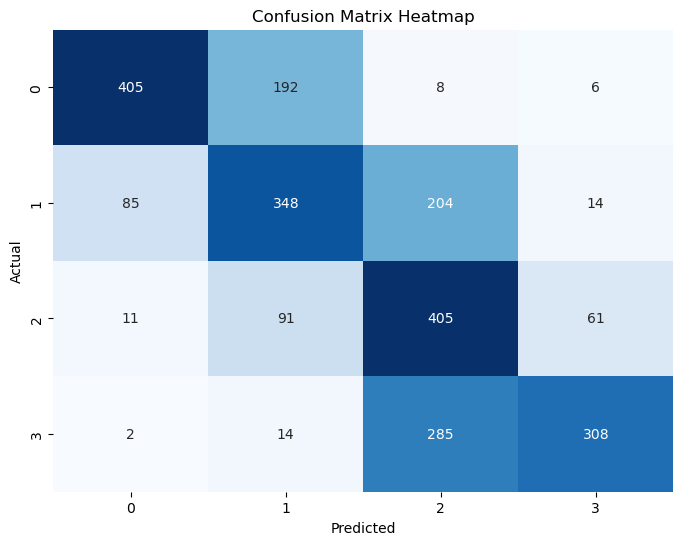

In [81]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

gnb = GaussianNB()
gnb.fit(X_train, y_train_label)
yhat_gnb = gnb.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test_label, yhat_gnb)
print("==================================================")
print(f" Accuracy: {accuracy:.2f}")
print("==================================================")

# Print classification report
print(classification_report(y_test_label, yhat_gnb),)
print("==================================================")

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test_label, yhat_gnb)


# Plotting heatmap of confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

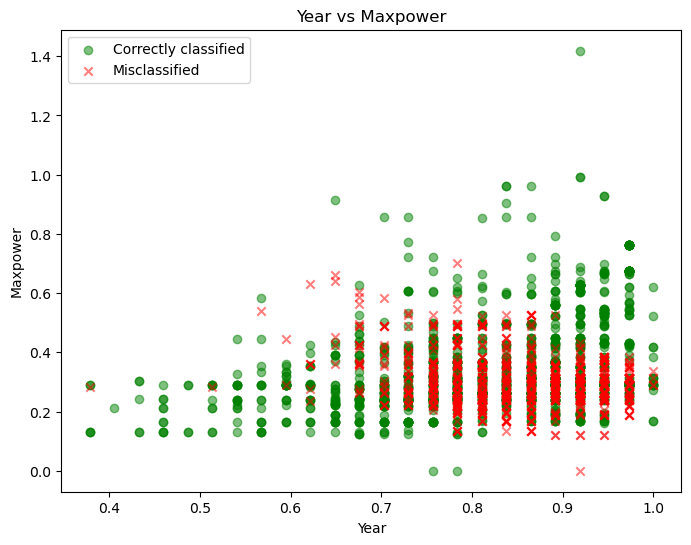

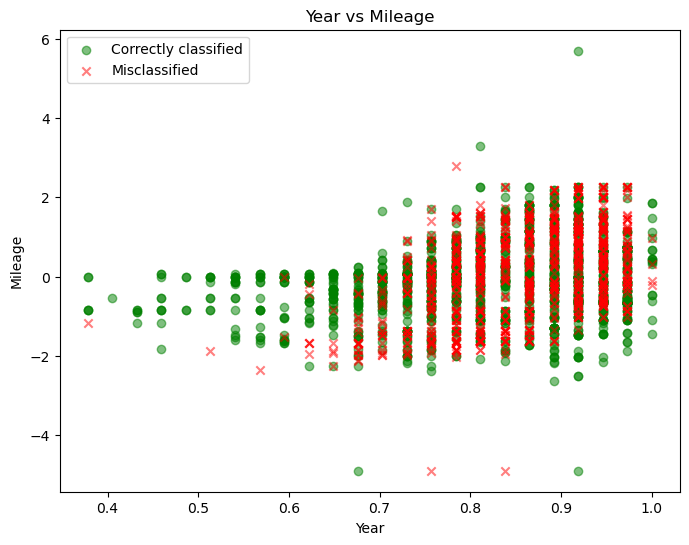

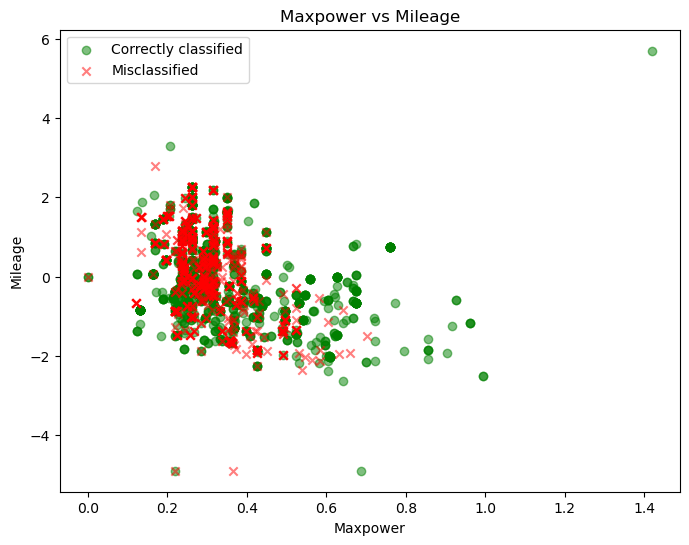

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_test is already a DataFrame
data = pd.DataFrame(X_test.copy())

# Add true labels and predicted labels to the data
data['y_true'] = y_test_label
data['y_pred'] = yhat_gnb

# Create a new column to indicate whether the prediction was correct or not
data['correct'] = data['y_true'] == data['y_pred']

# Number of features
n_features = X_test.shape[1]
features = pd.DataFrame(X_test).columns

# Dictionary for custom feature names
dict_feature = {0:"Year", 1:"Maxpower", 2:"Mileage"}

# Plot
for i in range(n_features):
    for j in range(i+1, n_features):
        plt.figure(figsize=(8, 6))
        
        # Plot correctly classified points in green
        correct_subset = data[data['correct']]
        plt.scatter(correct_subset[i], correct_subset[j], 
                    c='green',
                    marker='o', 
                    label='Correctly classified',
                    alpha=0.5)
            
        # Plot misclassified points in red
        wrong_subset = data[~data['correct']]
        plt.scatter(wrong_subset[i], wrong_subset[j], 
                    c='red',
                    marker='x', 
                    label='Misclassified',
                    alpha=0.5)

        plt.title(f'{dict_feature[i]} vs {dict_feature[j]}')
        plt.xlabel(dict_feature[i])
        plt.ylabel(dict_feature[j])
        plt.legend()
        plt.show()

Based on the scatter plots that indicate correct and misclassified data points for different features:

1. Year vs Maxpower:

The majority of data points in the range Year 0.4 to 0.8 are correctly classified, especially for vehicles with Maxpower values less than 0.6.
Misclassifications are prevalent for data points with higher Maxpower, especially between the range Year 0.6 to 0.9.
As we move to the newer years (closer to 1.0 on the Year axis), the model seems to struggle more, with a higher proportion of misclassified data points.

2. Year vs Mileage:

Most of the data points with Mileage between -2 and 2 and Year between 0.4 and 0.8 are correctly classified.
However, there's a dense band of misclassifications for vehicles with Year values between 0.7 and 0.9, indicating a region where the classifier finds difficulty distinguishing between classes.

3. Maxpower vs Mileage:

The plot shows a dense region of correct classifications for data points with Maxpower between 0.2 and 0.6 and Mileage between -2 and 2.
However, as we move to higher Maxpower values, there's a significant increase in the number of misclassifications. This is especially evident for vehicles with Maxpower values between 0.6 and 0.9.
There's also a scattered distribution of misclassifications in the lower Mileage and Maxpower range, indicating sporadic errors in the classifier's performance.

**Overall Conclusion:**

The classifier performs relatively well for specific ranges of features but struggles significantly in other areas, as highlighted by the regions of misclassifications in the scatter plots.
The most challenging areas for the classifier appear to be for newer vehicles (higher Year values) and vehicles with higher Maxpower.
To improve the classifier's performance, one might consider feature engineering or using a more complex model that can capture the nuances of the data better. Additionally, understanding the nature of the misclassifications, such as which specific classes are being confused, can provide insights for targeted improvements.

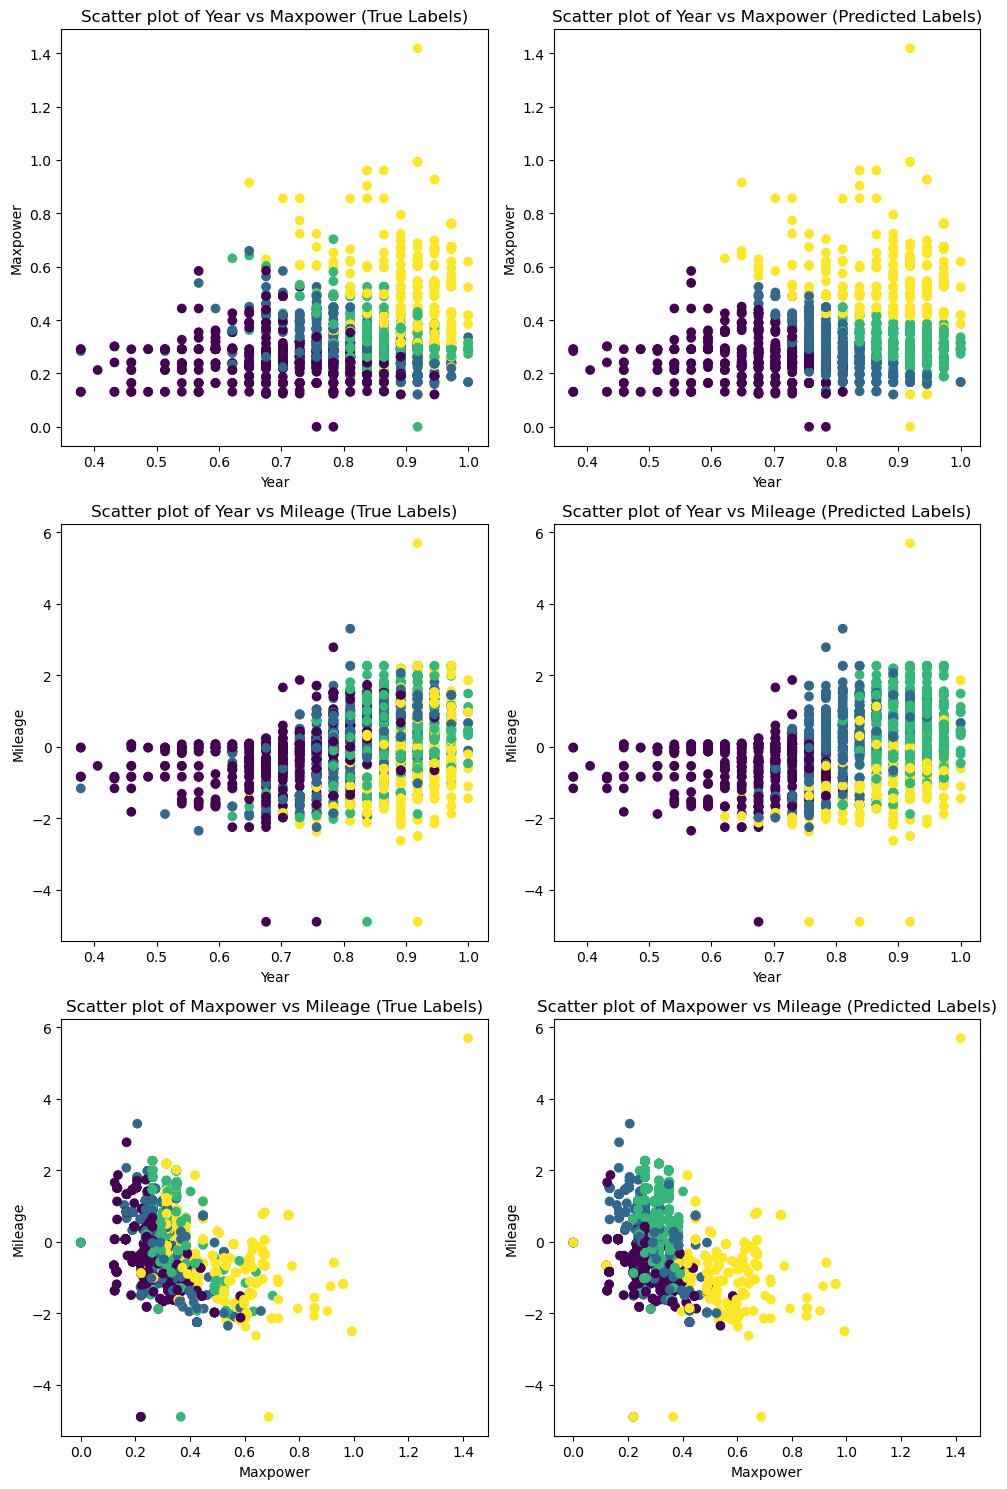

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_test is already a DataFrame
data = pd.DataFrame(X_test.copy())

# Add true labels and predicted labels to the data
data['y_true'] = y_test_label
data['y_pred'] = yhat_gnb

# Create a new column to indicate whether the prediction was correct or not
data['correct'] = data['y_true'] == data['y_pred']

Features = data[[0, 1, 2]].columns
dict_feature = {0:"Year", 1:"Maxpower", 2:"Mileage"}

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 15))  # 3x2 grid

combinations = [(0, 1), (0, 2), (1, 2)]

for i, (x, y) in enumerate(combinations):
    # Plot for true labels
    axes[i, 0].scatter(data[Features[x]], data[Features[y]], c=data['y_true'], cmap='viridis')
    axes[i, 0].set_xlabel(dict_feature[x])
    axes[i, 0].set_ylabel(dict_feature[y])
    axes[i, 0].set_title(f'Scatter plot of {dict_feature[x]} vs {dict_feature[y]} (True Labels)')
    
    # Plot for predicted labels
    axes[i, 1].scatter(data[Features[x]], data[Features[y]], c=data['y_pred'], cmap='viridis')
    axes[i, 1].set_xlabel(dict_feature[x])
    axes[i, 1].set_ylabel(dict_feature[y])
    axes[i, 1].set_title(f'Scatter plot of {dict_feature[x]} vs {dict_feature[y]} (Predicted Labels)')

plt.tight_layout()
plt.show()

Let's analyze these scatter plots comparing true labels vs. predicted labels:

1. Year vs Maxpower:

The true labels display a diversified range of colors (representing different classes) across the Year and Maxpower axes, suggesting a varied distribution of classes in the original dataset.
The predicted labels show significant overlap in the same range, especially around the mid-range of Year values and the lower range of Maxpower. This indicates the classifier's struggle in distinguishing between certain classes in this region.

2. Year vs Mileage:

In the true labels, we observe a clear stratification of classes especially as Mileage increases. This suggests some sort of correlation between the year of a vehicle and its mileage, which is a logical expectation.
However, the predicted labels show more amalgamation, especially in the middle ranges of both axes, suggesting some difficulty in class distinction by the classifier in these areas.

3. Maxpower vs Mileage:

The true labels show a fairly distinct clustering, especially in the lower range of Maxpower and the mid-range of Mileage.
In contrast, the predicted labels exhibit more overlap, especially in the middle regions of both Maxpower and Mileage. This highlights regions where the classifier has had trouble making accurate predictions.

**Overall Conclusion:**

The classifier has areas of strength where it can make accurate predictions, but also regions where it struggles, particularly in middle ranges of the given features.
The discrepancies between true and predicted labels indicate potential misclassifications and might benefit from more granular features, feature engineering, or perhaps using a more sophisticated model.
Another approach to improve performance could be gathering more data, particularly in the problematic regions, to provide a clearer distinction between classes for the classifier.

**Using Random Forest Classifier**

Accuracy: 0.80
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       611
           1       0.73      0.72      0.73       651
           2       0.70      0.74      0.72       568
           3       0.88      0.87      0.87       609

    accuracy                           0.80      2439
   macro avg       0.80      0.80      0.80      2439
weighted avg       0.80      0.80      0.80      2439



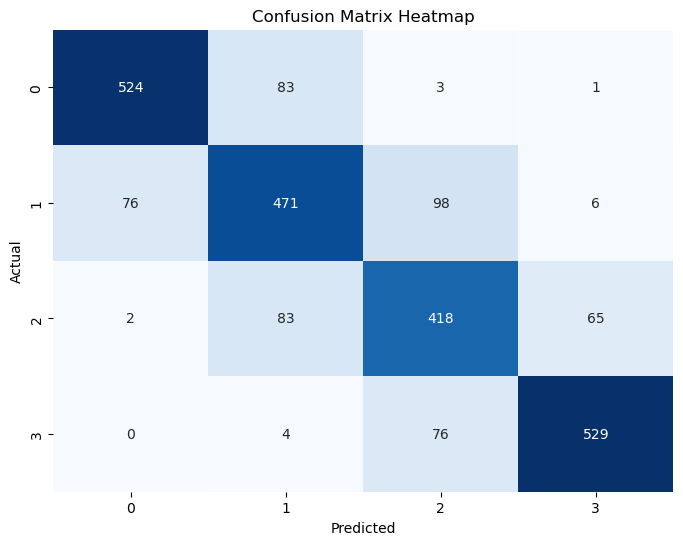

In [85]:
from sklearn.ensemble import RandomForestClassifier

# Create and train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=150, random_state=0)
rf_classifier.fit(X_train, y_train_label)

# Make predictions on the test data
yhat_rfc = rf_classifier.predict(X_test)


# Calculate accuracy
accuracy = accuracy_score(y_test_label, yhat_rfc)
print("==================================================")
print(f"Accuracy: {accuracy:.2f}")
print("==================================================")
# Print classification report
print(classification_report(y_test_label, yhat_rfc))
print("==================================================")

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test_label, yhat_rfc)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

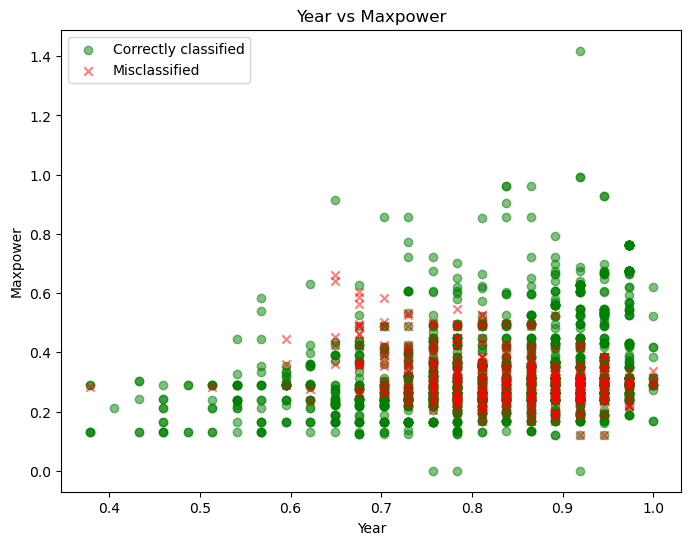

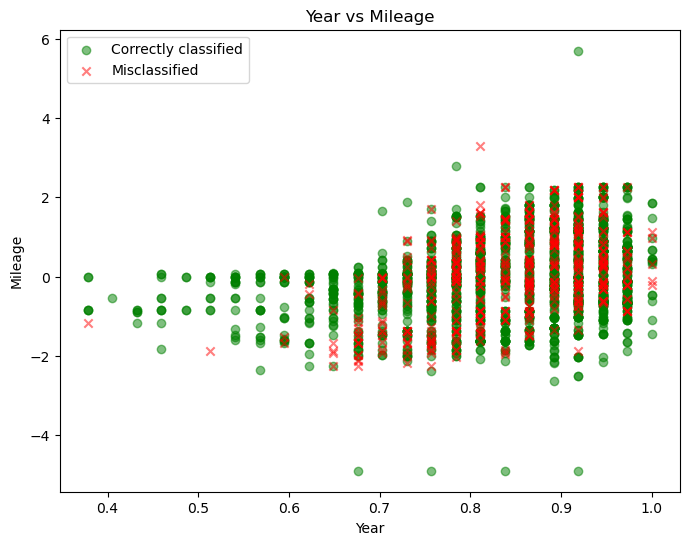

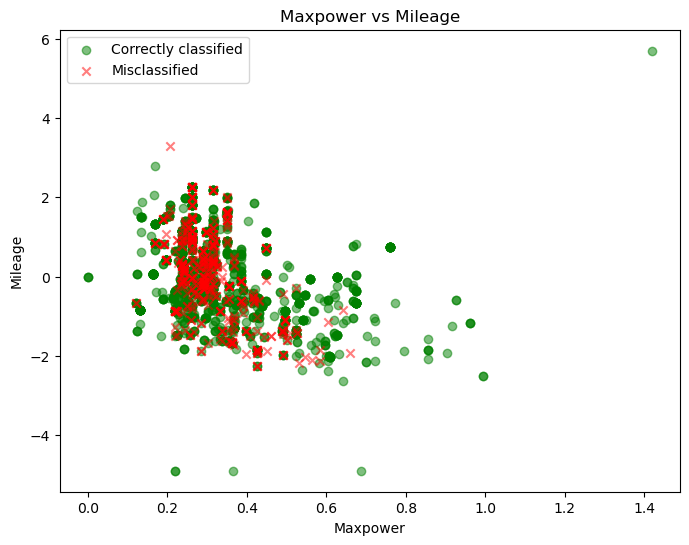

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_test is already a DataFrame
data = pd.DataFrame(X_test.copy())

# Add true labels and predicted labels to the data
data['y_true'] = y_test_label
data['y_pred'] = yhat_rfc

# Create a new column to indicate whether the prediction was correct or not
data['correct'] = data['y_true'] == data['y_pred']

# Number of features
n_features = X_test.shape[1]
features = pd.DataFrame(X_test).columns

# Dictionary for custom feature names
dict_feature = {0:"Year", 1:"Maxpower", 2:"Mileage"}

# Plot
for i in range(n_features):
    for j in range(i+1, n_features):
        plt.figure(figsize=(8, 6))
        
        # Plot correctly classified points in green
        correct_subset = data[data['correct']]
        plt.scatter(correct_subset[i], correct_subset[j], 
                    c='green',
                    marker='o', 
                    label='Correctly classified',
                    alpha=0.5)
            
        # Plot misclassified points in red
        wrong_subset = data[~data['correct']]
        plt.scatter(wrong_subset[i], wrong_subset[j], 
                    c='red',
                    marker='x', 
                    label='Misclassified',
                    alpha=0.5)

        plt.title(f'{dict_feature[i]} vs {dict_feature[j]}')
        plt.xlabel(dict_feature[i])
        plt.ylabel(dict_feature[j])
        plt.legend()
        plt.show()

Upon analyzing the given scatter plots, here are the observations:

1. Year vs Maxpower:

The distribution indicates a significant number of misclassifications around the mid-range of the Year and Maxpower axes.
The density of the correctly classified points seems to be more consistent at the higher end of the Year axis and lower end of the Maxpower axis.

2. Year vs Mileage:

Misclassifications are widely spread across the year range, but there is a particular concentration in the middle to higher range of Mileage.
The correctly classified points appear more frequently at the lower Mileage values.

3. Maxpower vs Mileage:

A dense cluster of misclassifications is observed in the mid-range of both Maxpower and Mileage.
The peripheries of the plot, particularly the higher end of Maxpower and the lower end of Mileage, show fewer misclassifications.

**Overall Conclusion:**

The classifier seems to struggle with points that lie in the mid-ranges of the given features, indicating potential areas where the model's differentiation between classes is weak.
On the other hand, data points that are at the extremes (either low or high) of these features seem to be classified with more accuracy.
This suggests that while the classifier has a decent understanding of distinguishing features for some classes, it might be getting confused in areas where feature values are more average or common across multiple classes.
Improvements could include refining the model, adding more features, or gathering more training data to give the classifier a clearer distinction between classes.

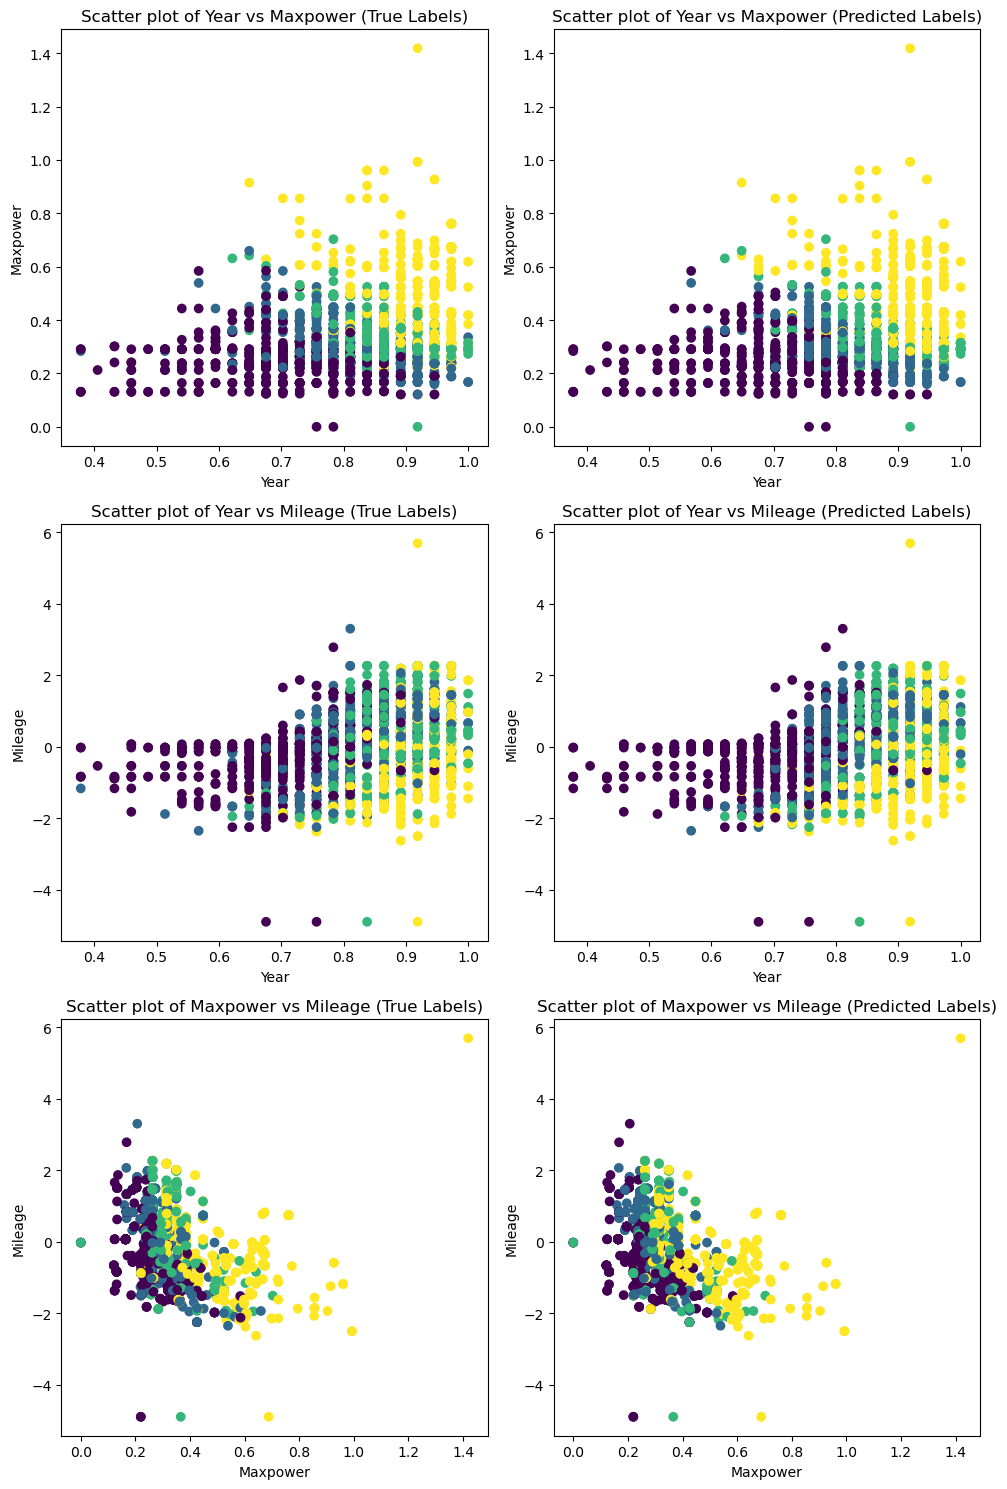

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_test is already a DataFrame
data = pd.DataFrame(X_test.copy())

# Add true labels and predicted labels to the data
data['y_true'] = y_test_label
data['y_pred'] = yhat_rfc

# Create a new column to indicate whether the prediction was correct or not
data['correct'] = data['y_true'] == data['y_pred']

Features = data[[0, 1, 2]].columns
dict_feature = {0:"Year", 1:"Maxpower", 2:"Mileage"}

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 15))  # 3x2 grid

combinations = [(0, 1), (0, 2), (1, 2)]

for i, (x, y) in enumerate(combinations):
    # Plot for true labels
    axes[i, 0].scatter(data[Features[x]], data[Features[y]], c=data['y_true'], cmap='viridis')
    axes[i, 0].set_xlabel(dict_feature[x])
    axes[i, 0].set_ylabel(dict_feature[y])
    axes[i, 0].set_title(f'Scatter plot of {dict_feature[x]} vs {dict_feature[y]} (True Labels)')
    
    # Plot for predicted labels
    axes[i, 1].scatter(data[Features[x]], data[Features[y]], c=data['y_pred'], cmap='viridis')
    axes[i, 1].set_xlabel(dict_feature[x])
    axes[i, 1].set_ylabel(dict_feature[y])
    axes[i, 1].set_title(f'Scatter plot of {dict_feature[x]} vs {dict_feature[y]} (Predicted Labels)')

plt.tight_layout()
plt.show()

# Conclusion

In conclusion, it's quite obvious that the dataset is more complex than a simple linear logistic regression can learn its pattern as we can see from the Gaussian Naive Bayes and Random Forest Classifier results. Both of them performs much better than Ridge and Multinomial Logistic Regression. 

# Inference

**Save and Load Model**

In [76]:
from utils import *

In [64]:
DIR_Model = "./model/"

In [68]:
import joblib

In [198]:
import pickle

model_path = DIR_Model + 'MultinomialRegression.model'
pickle.dump(model, model_path)

['./model/MultinomialRegression.model']

In [199]:
# Load the model

model_path =  DIR_Model + 'MultinomialRegression.model'
loaded_model = joblib.load(model_path)

In [70]:
sample_data = np.array([0.1, 0.3, 0.6]).reshape(-1,3)

In [209]:
# Predict

predictions = loaded_model.predict(sample_data)
print(f"Predicted Class is :{predictions[0]}")

Predicted Class is :2


In [93]:
import pickle

**Ridge Logistic Regression**

In [74]:
model_path = DIR_Model + 'ridge.pkl'
with open(model_path, 'wb') as file:
    pickle.dump(model_ridge, file)

In [75]:
# Load the model

model_path =  DIR_Model + 'ridge.pkl'
with open(model_path, 'rb') as handle:
            b = pickle.load(handle)

In [76]:
# Predict

predictions = b.predict(sample_data)
print(f"Predicted Class is :{predictions[0]}")

Predicted Class is :0


**Gaussian Naive Bayes**

In [98]:
model_path = DIR_Model + 'GNB.pkl'
with open(model_path, 'wb') as file:
    pickle.dump(gnb, file)

In [ ]:
import joblib

**Random Forest Classifier**

In [104]:
model_path = DIR_Model + 'RFC.model'
joblib.dump(rf_classifier, model_path)

['./model/RFC.model']